In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pmdarima as pmd

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from statsmodels.tsa.seasonal import seasonal_decompose

import read
import model

%matplotlib inline

style_url = 'https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle'

In [2]:
years_range = list(range(2015, 2022))

df = read.query_data_range(years=years_range, pollutants='SO2', expositions=24)

## Reading data

In [3]:
df_g = dict()
for freq in ['daily', 'weekly', 'monthly']:
    df_g[freq] = model.group_and_reindex(df, freq)

In [4]:
df_s = dict()
for freq in ['daily', 'weekly', 'monthly']:
    train, test = model.train_test_split_on_year(df_g[freq])
    df_s[freq] = {
        'train': train,
        'test': test
    }

In [5]:
df_g['daily']

date  measurement  day  month  year
0    2015-01-01        1.600    1      1  2015
1    2015-01-02        1.100    2      1  2015
2    2015-01-03        1.075    3      1  2015
3    2015-01-04        1.650    4      1  2015
4    2015-01-05        2.150    5      1  2015
...         ...          ...  ...    ...   ...
2552 2021-12-27        3.900   27     12  2021
2553 2021-12-28        3.500   28     12  2021
2554 2021-12-29        2.700   29     12  2021
2555 2021-12-30        2.700   30     12  2021
2556 2021-12-31        1.700   31     12  2021

[2557 rows x 5 columns]

In [6]:
df_g['weekly']

year  week  measurement
0    2015     1     1.356250
1    2015     2     1.889286
2    2015     3     2.457143
3    2015     4     1.867857
4    2015     5     2.135714
..    ...   ...          ...
363  2021    49     2.185714
364  2021    50     1.414286
365  2021    51     2.100000
366  2021    52     2.900000
367  2021    53     1.766667

[368 rows x 3 columns]

In [7]:
df_g['monthly']

year  month  measurement
0   2015      1     1.988710
1   2015      2     2.338095
2   2015      3     1.797581
3   2015      4     1.476111
4   2015      5     1.516935
..   ...    ...          ...
79  2021      8     1.806452
80  2021      9     1.990000
81  2021     10     2.496774
82  2021     11     2.076667
83  2021     12     2.138710

[84 rows x 3 columns]

In [8]:
df_s['weekly']['train']

year  week  measurement
0    2015     1     1.356250
1    2015     2     1.889286
2    2015     3     2.457143
3    2015     4     1.867857
4    2015     5     2.135714
..    ...   ...          ...
257  2019    48     1.838095
258  2019    49     2.285714
259  2019    50     2.342857
260  2019    51     2.400000
261  2019    52     1.800000

[262 rows x 3 columns]

## General plot of pollution

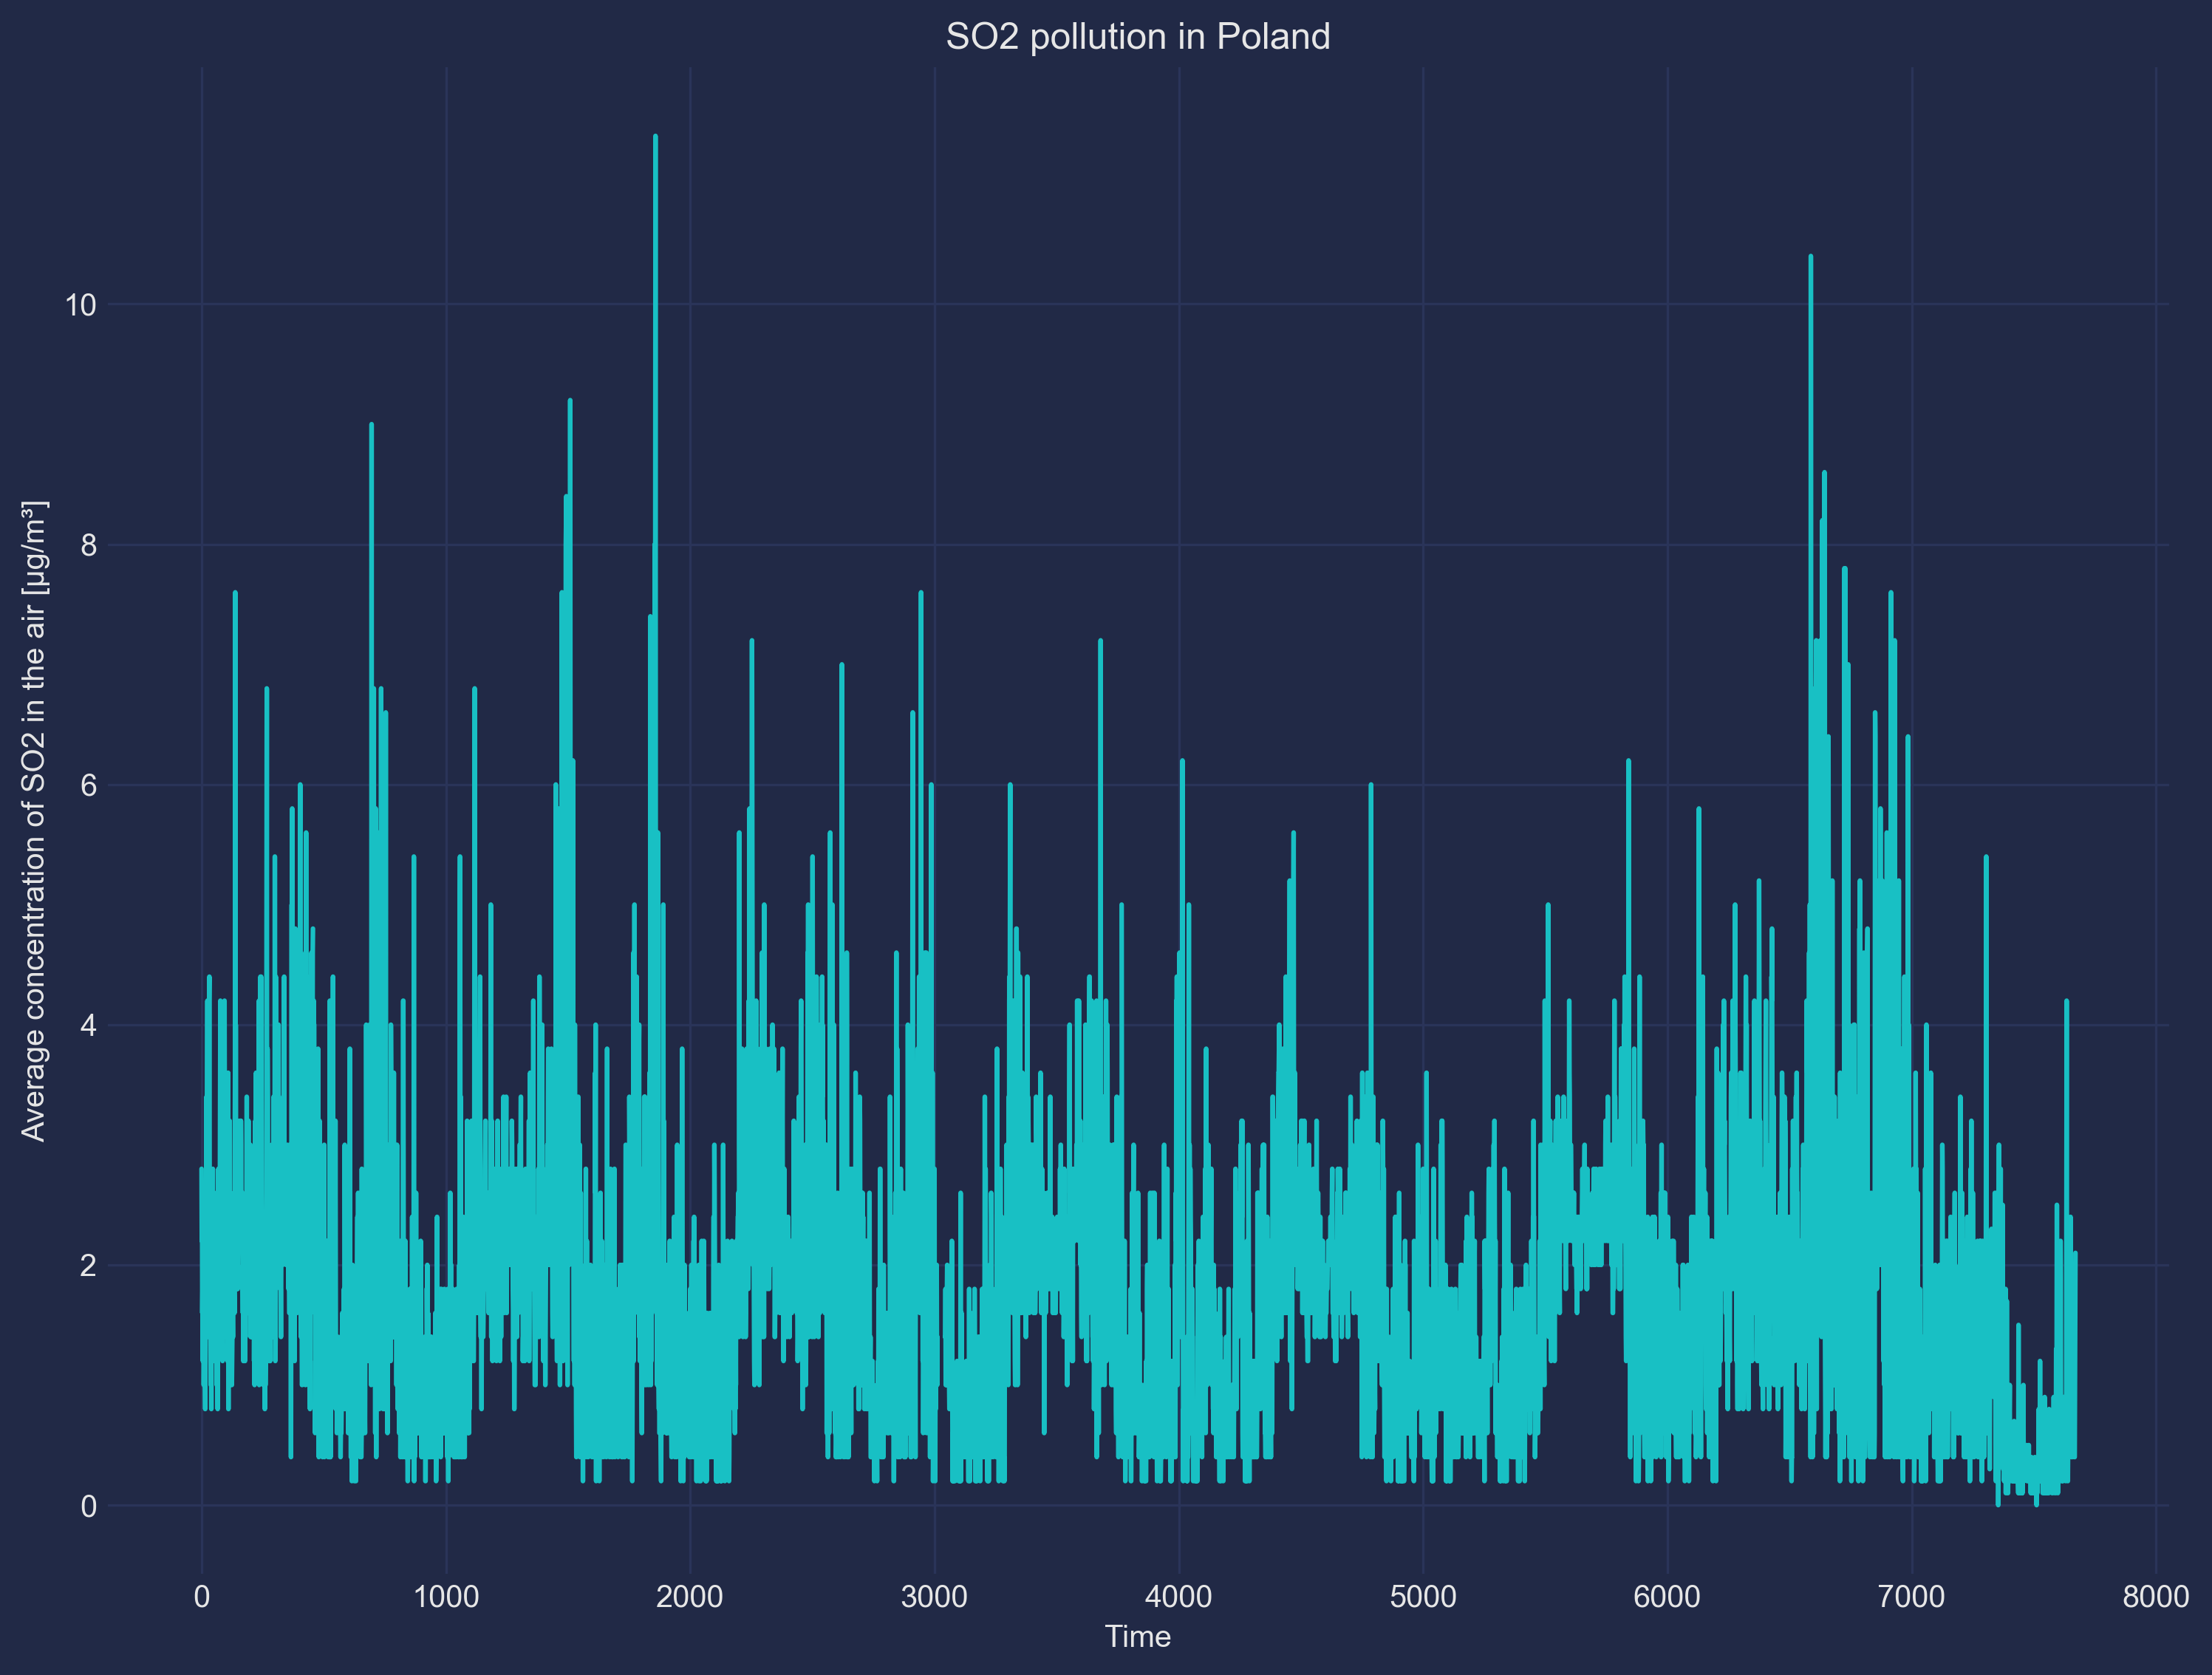

In [9]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)

    ax.plot(df.index, df.measurement)

    ax.set_title('SO2 pollution in Poland')
    ax.set_xlabel('Time')
    ax.set_ylabel('Average concentration of SO2 in the air [μg/m³]')
    
    plt.show()

## Monthly averages plot

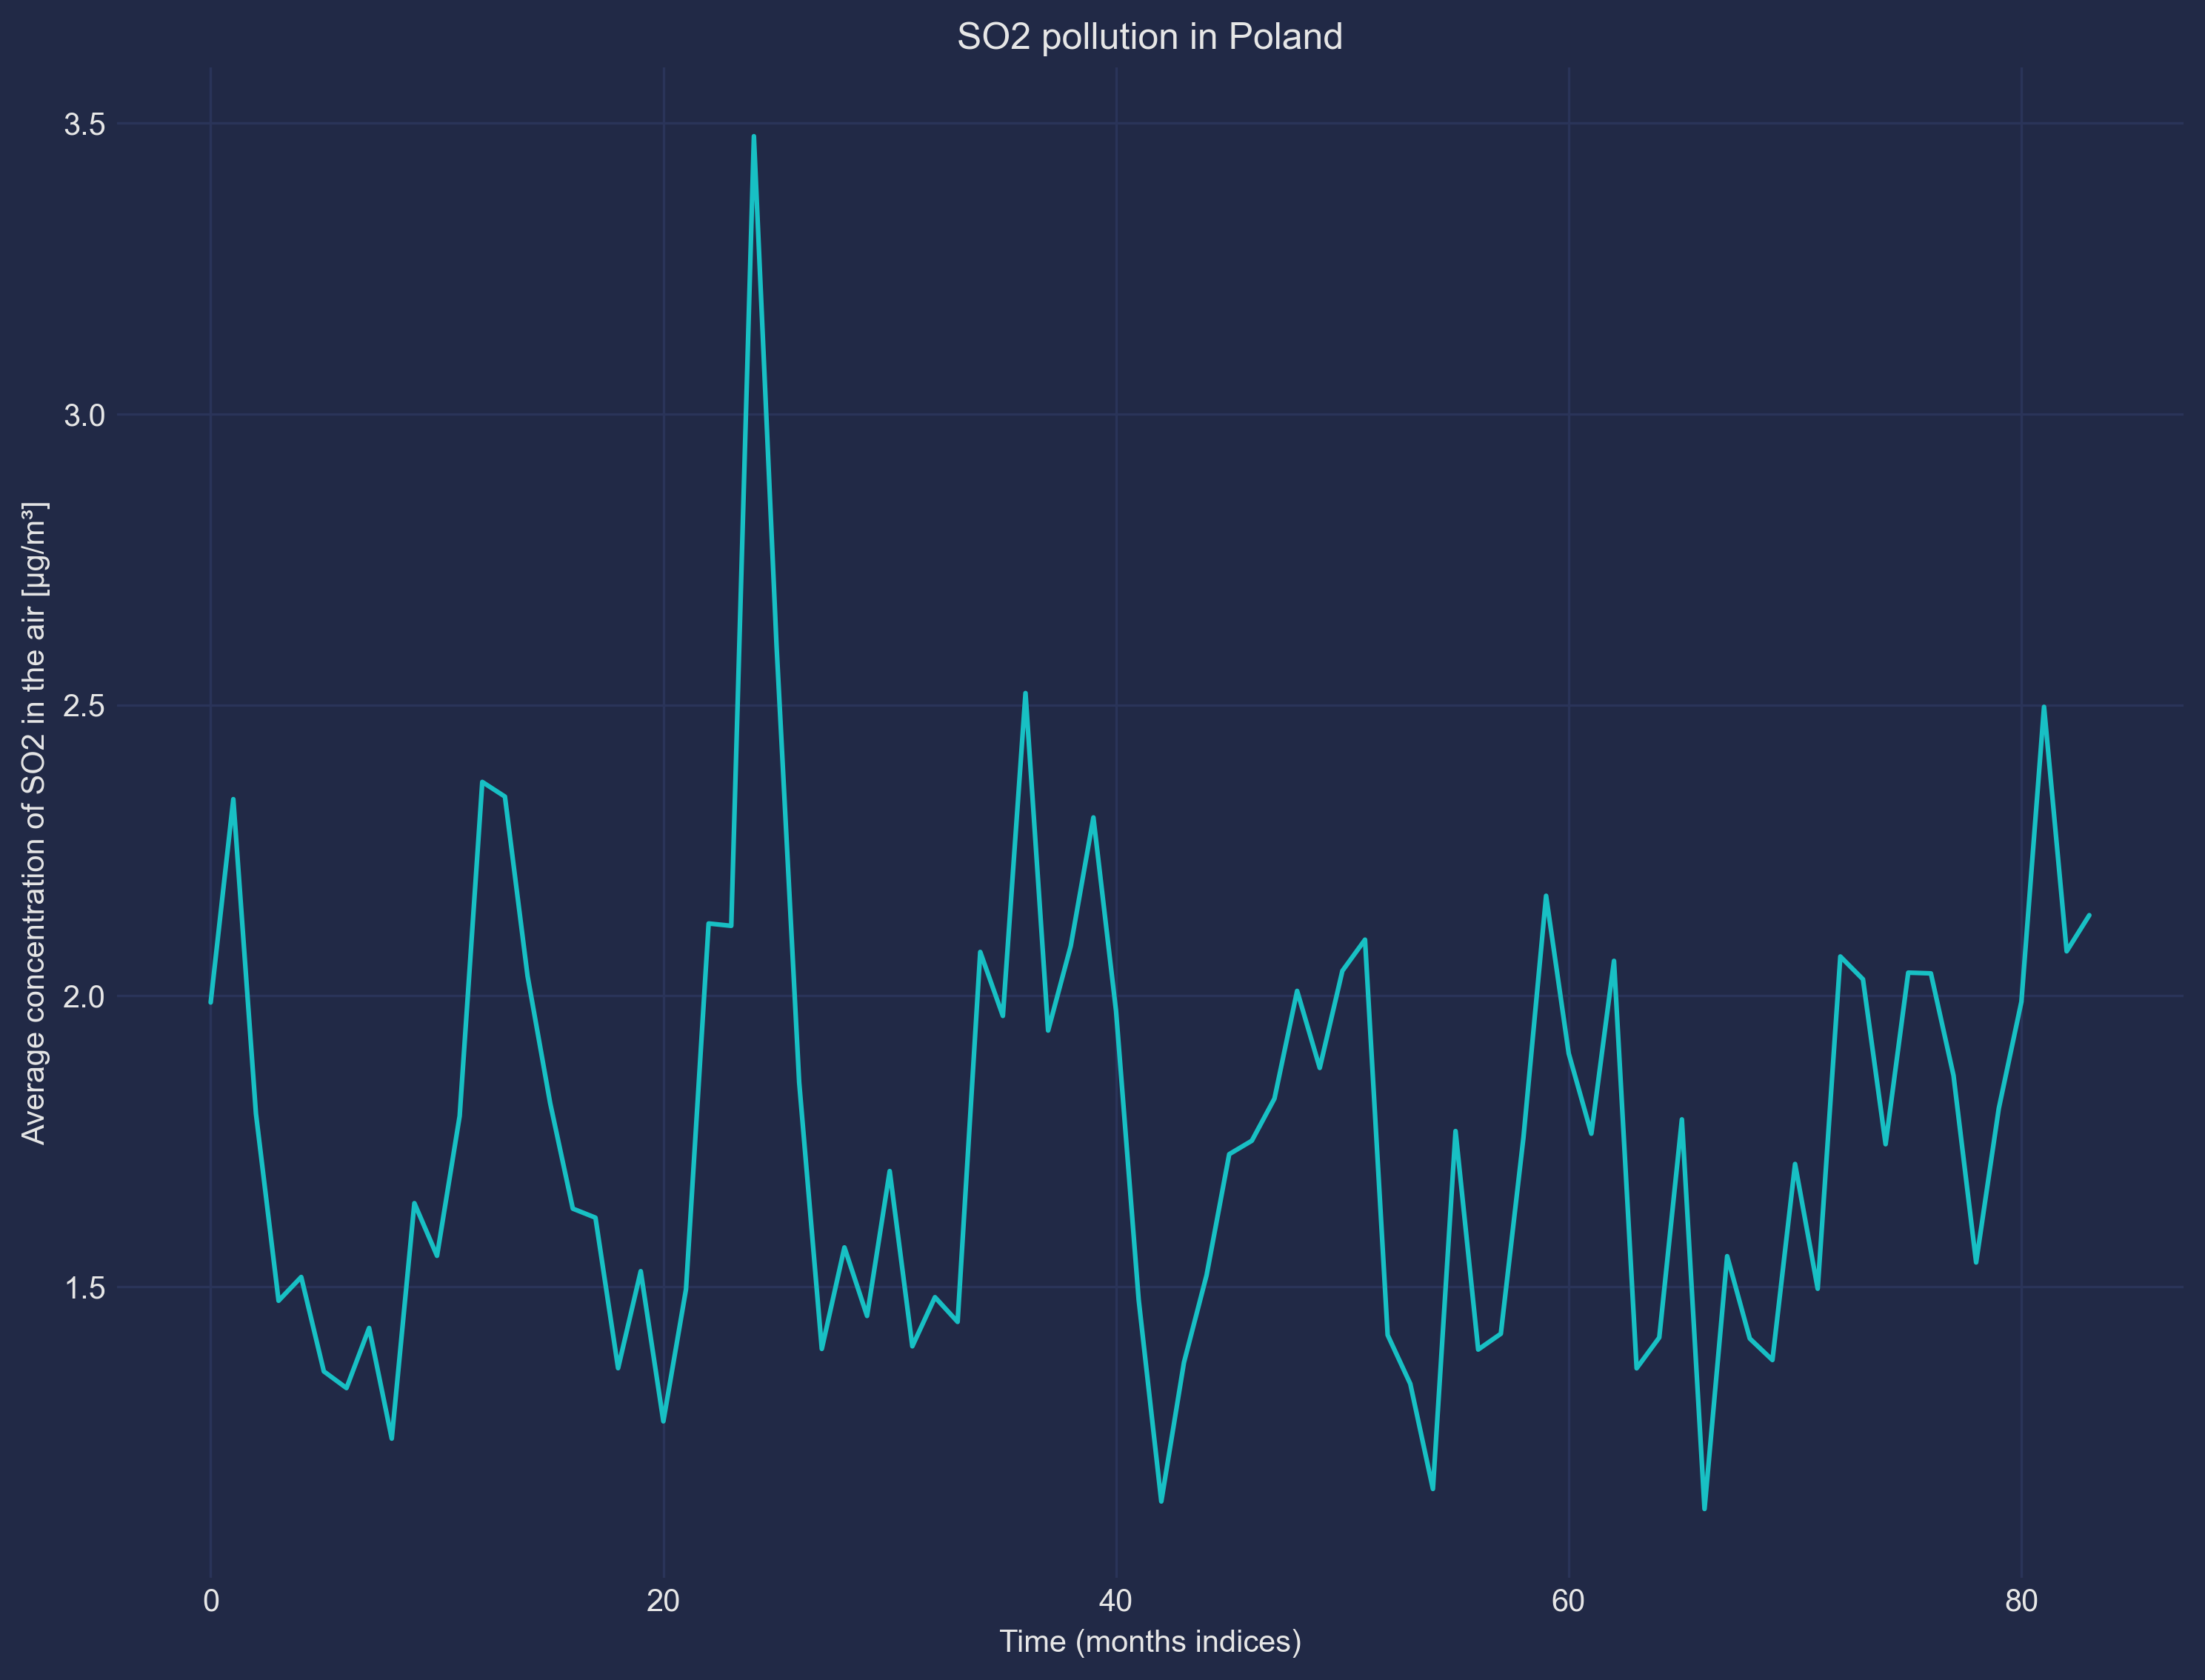

In [10]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)

    ax.plot(df_g['monthly'].measurement)

    ax.set_title('SO2 pollution in Poland')
    ax.set_xlabel('Time (months indices)')
    ax.set_ylabel('Average concentration of SO2 in the air [μg/m³]')
    
    plt.show()

## Weekly averages plot

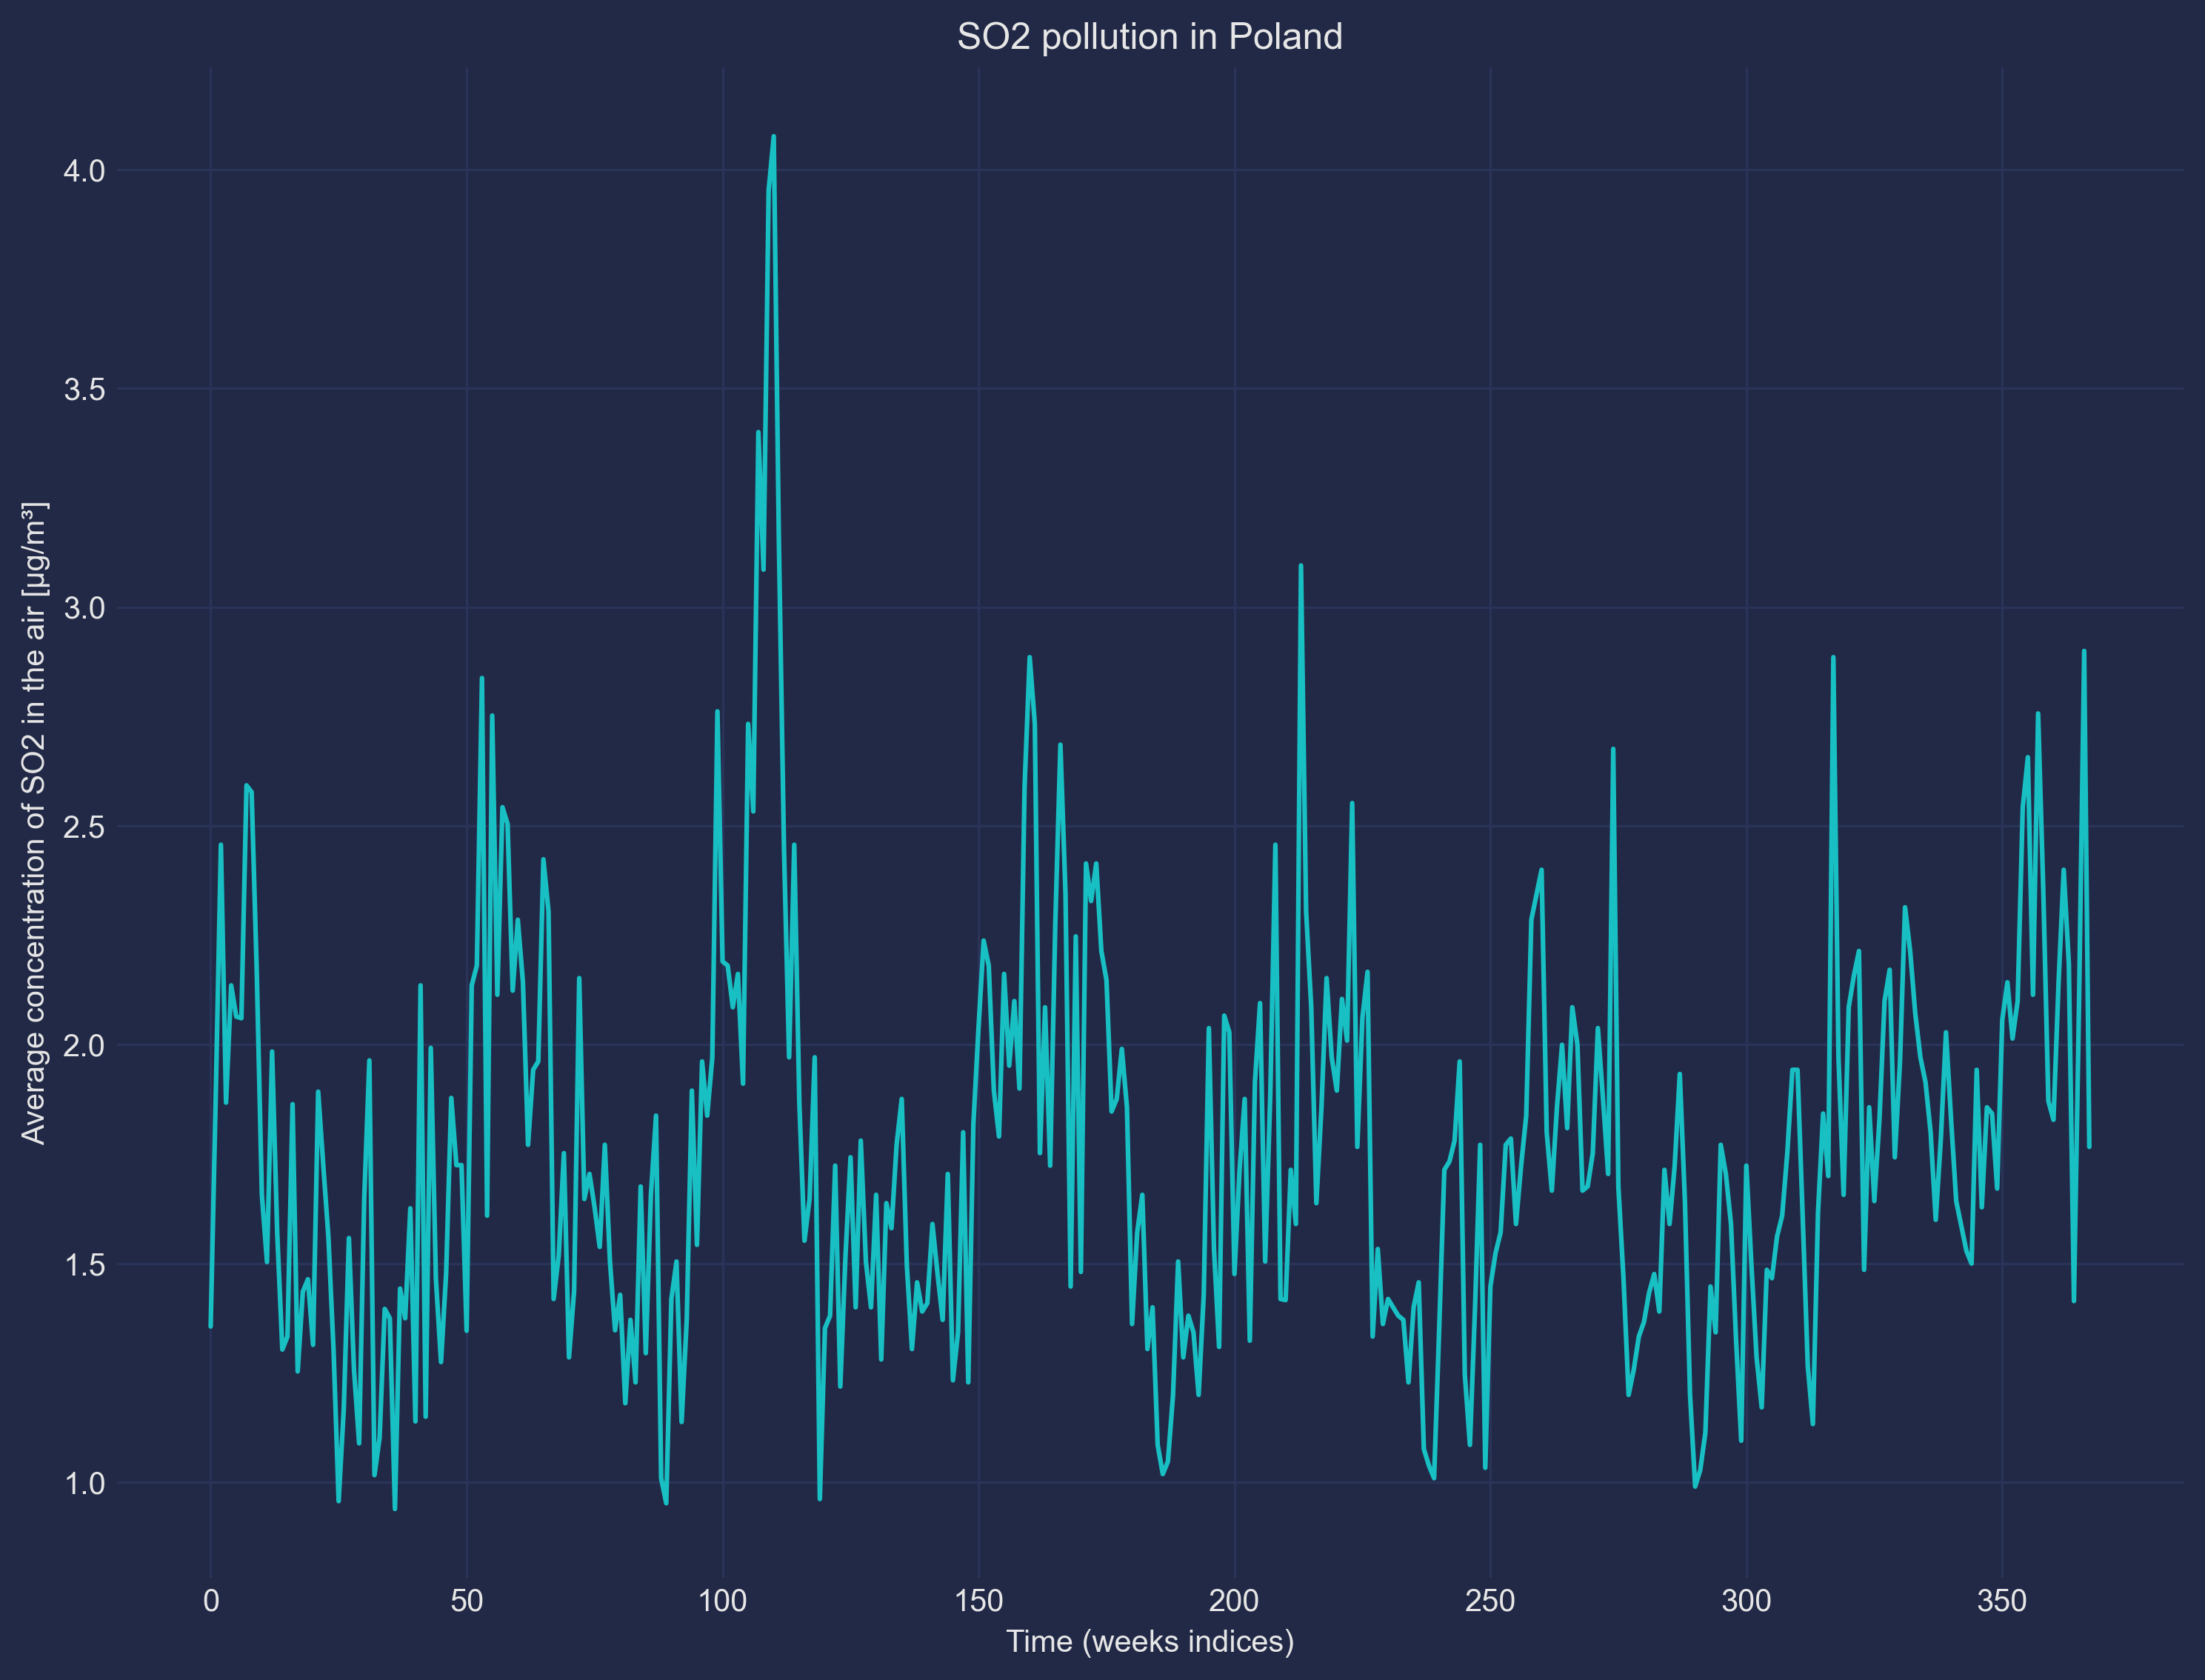

In [11]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)

    ax.plot(df_g['weekly'].measurement)

    ax.set_title('SO2 pollution in Poland')
    ax.set_xlabel('Time (weeks indices)')
    ax.set_ylabel('Average concentration of SO2 in the air [μg/m³]')
    
    plt.show()

## Decomposition of data into trend and seasonal changes

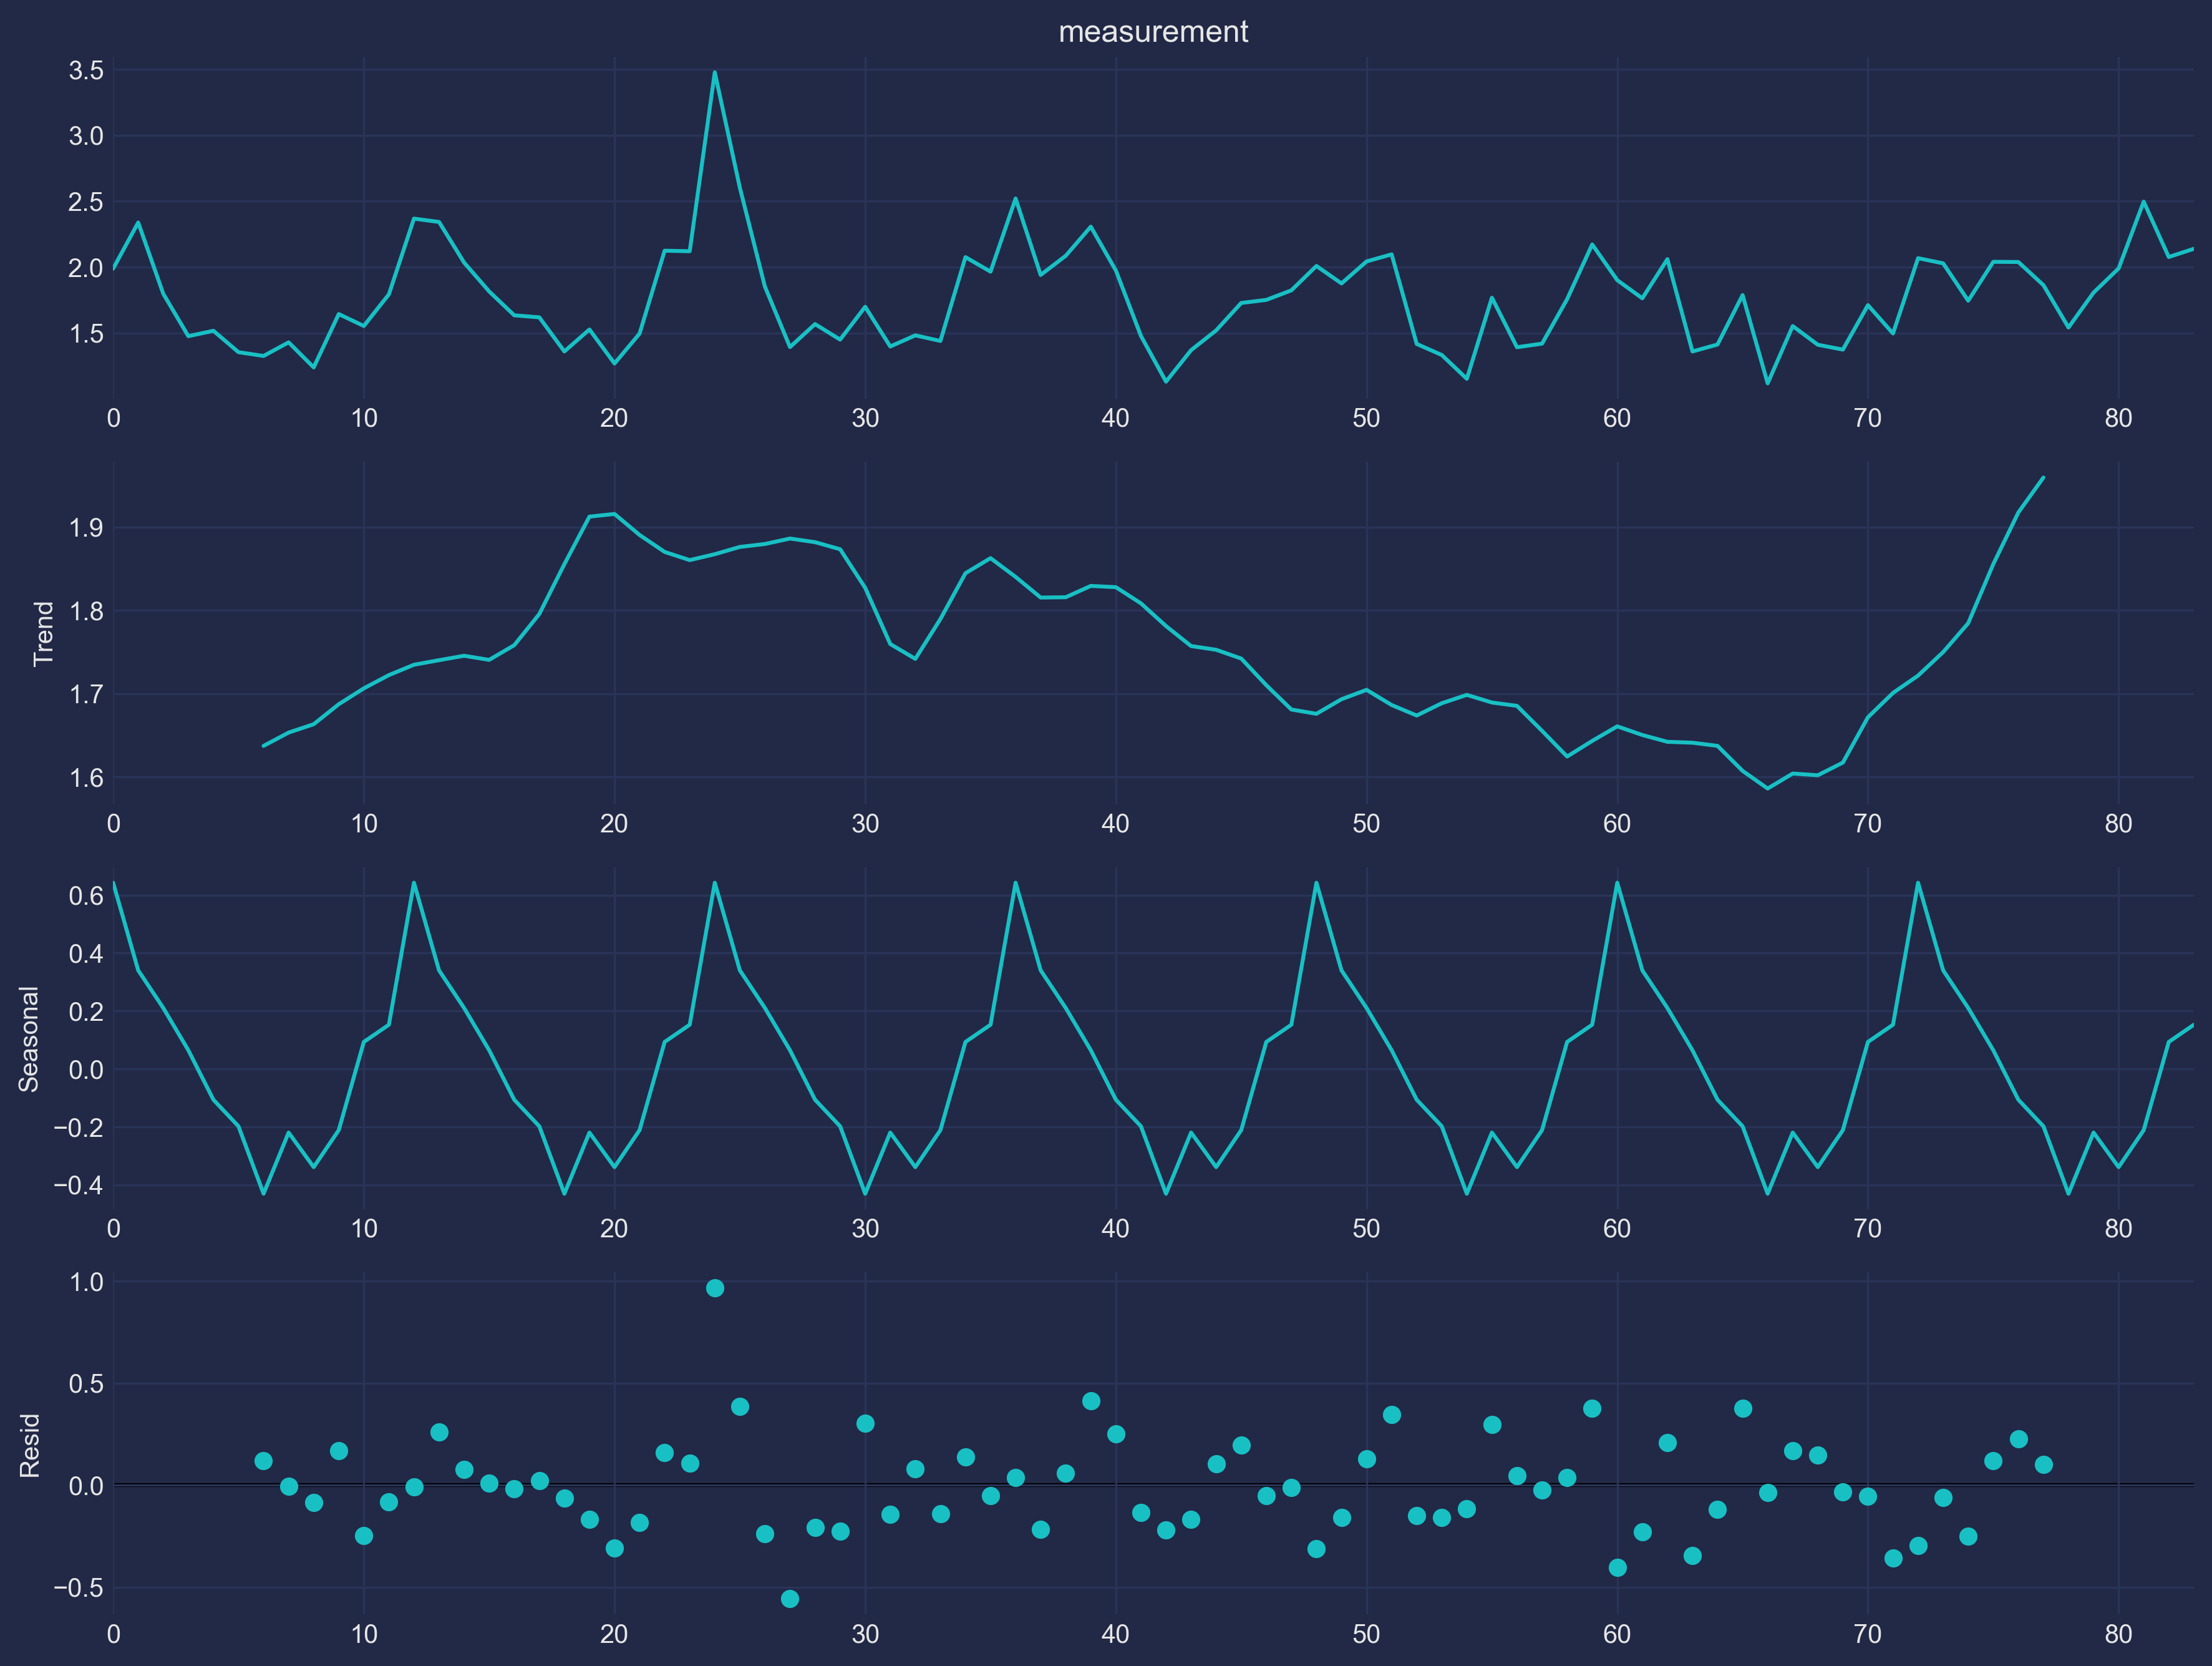

In [12]:
decomposition = seasonal_decompose(df_g['monthly'].measurement, model='add', period=12)

with plt.style.context(style_url), plt.rc_context({'figure.dpi': 300, 'figure.figsize': (12, 9)}):
    decomposition.plot()
    plt.show()

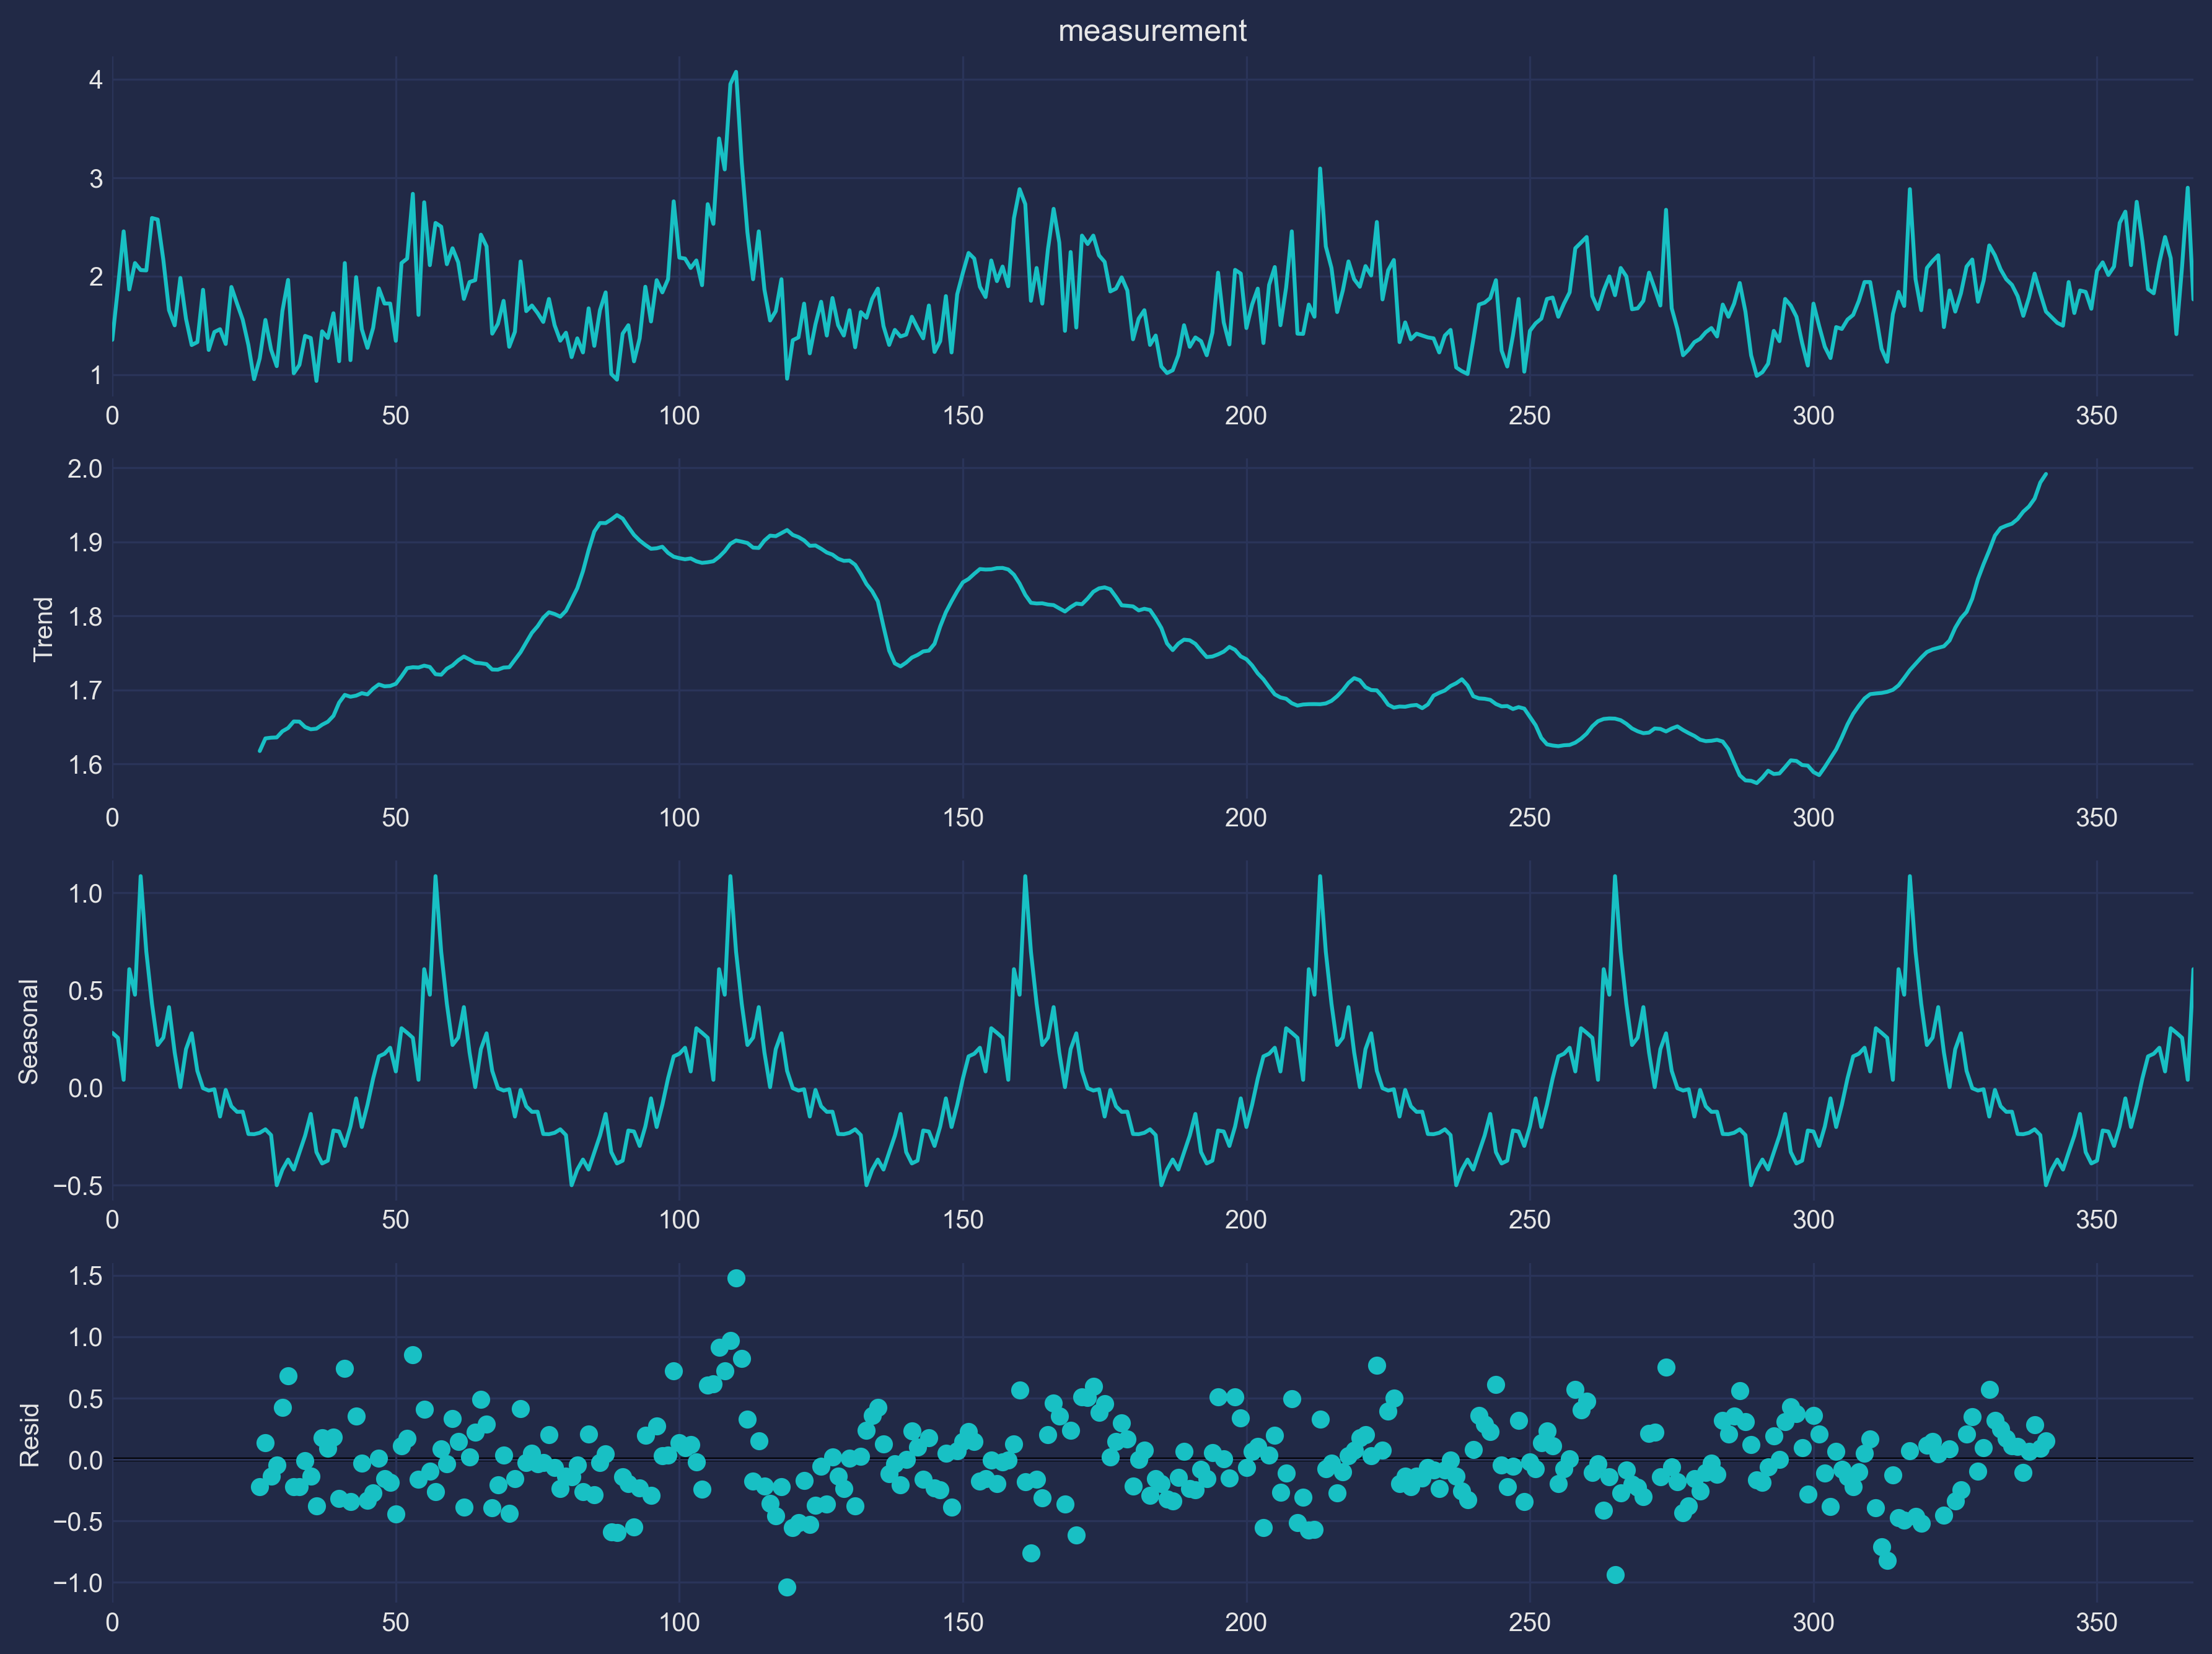

In [13]:
decomposition = seasonal_decompose(df_g['weekly'].measurement, model='add', period=52)

with plt.style.context(style_url), plt.rc_context({'figure.dpi': 300, 'figure.figsize': (12, 9)}):
    decomposition.plot()
    plt.show()

## Creating ARIMA model for predicting 2020 and 2021

In [14]:
mdl = pmd.auto_arima(df_s['monthly']['train'].measurement, m=12, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=32.199, Time=1.26 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=69.295, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=34.380, Time=0.59 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=39.837, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=243.424, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=33.651, Time=0.53 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=39.880, Time=0.87 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.84 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=33.979, Time=3.84 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=48.334, Time=0.27 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=33.638, Time=1.42 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=32.200, Time=1.94 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=33.538, Time=2.01 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=39.346, T

In [15]:
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                  -8.099
Date:                              Sun, 24 Apr 2022   AIC                             32.199
Time:                                      19:16:11   BIC                             48.953
Sample:                                           0   HQIC                            38.752
                                               - 60                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9480      0.756      1.253      0.210      -0.535       2.431
ar.L1          0.1118      0.405      0.276      0.783      -0.683       0.907
ar.L2         -0.4191      0.265     -1.581      0.114      -0.939       0.100
ma.L1          0.4458      0.257      1.733      0.083      -0.058       0.950
ma.L2          0.7383      0.270      2.734      0.006       0.209       1.268
ar.S.L12       0.5808      0.285      2.038      0.042       0.022       1.139
ma.S.L12      -0.0255      0.373     -0.068      0.945      -0.756       0.705
sigma2         0.0693      0.012      5.643      0.000       0.045       0.093
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                42.45
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             1.30
Prob(H) (two-sided):                  0.83   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
pred, conf_int = mdl.predict_in_sample(start=df_s['monthly']['test'].index[0], end=df_s['monthly']['test'].index[-1], return_conf_int=True)

lower, upper = model.transform_confidences(conf_int)

preds = pd.DataFrame({
    'prediction': pred,
    'lower_confidence': lower,
    'upper_confidence': upper
})

## ARIMA predictions for months

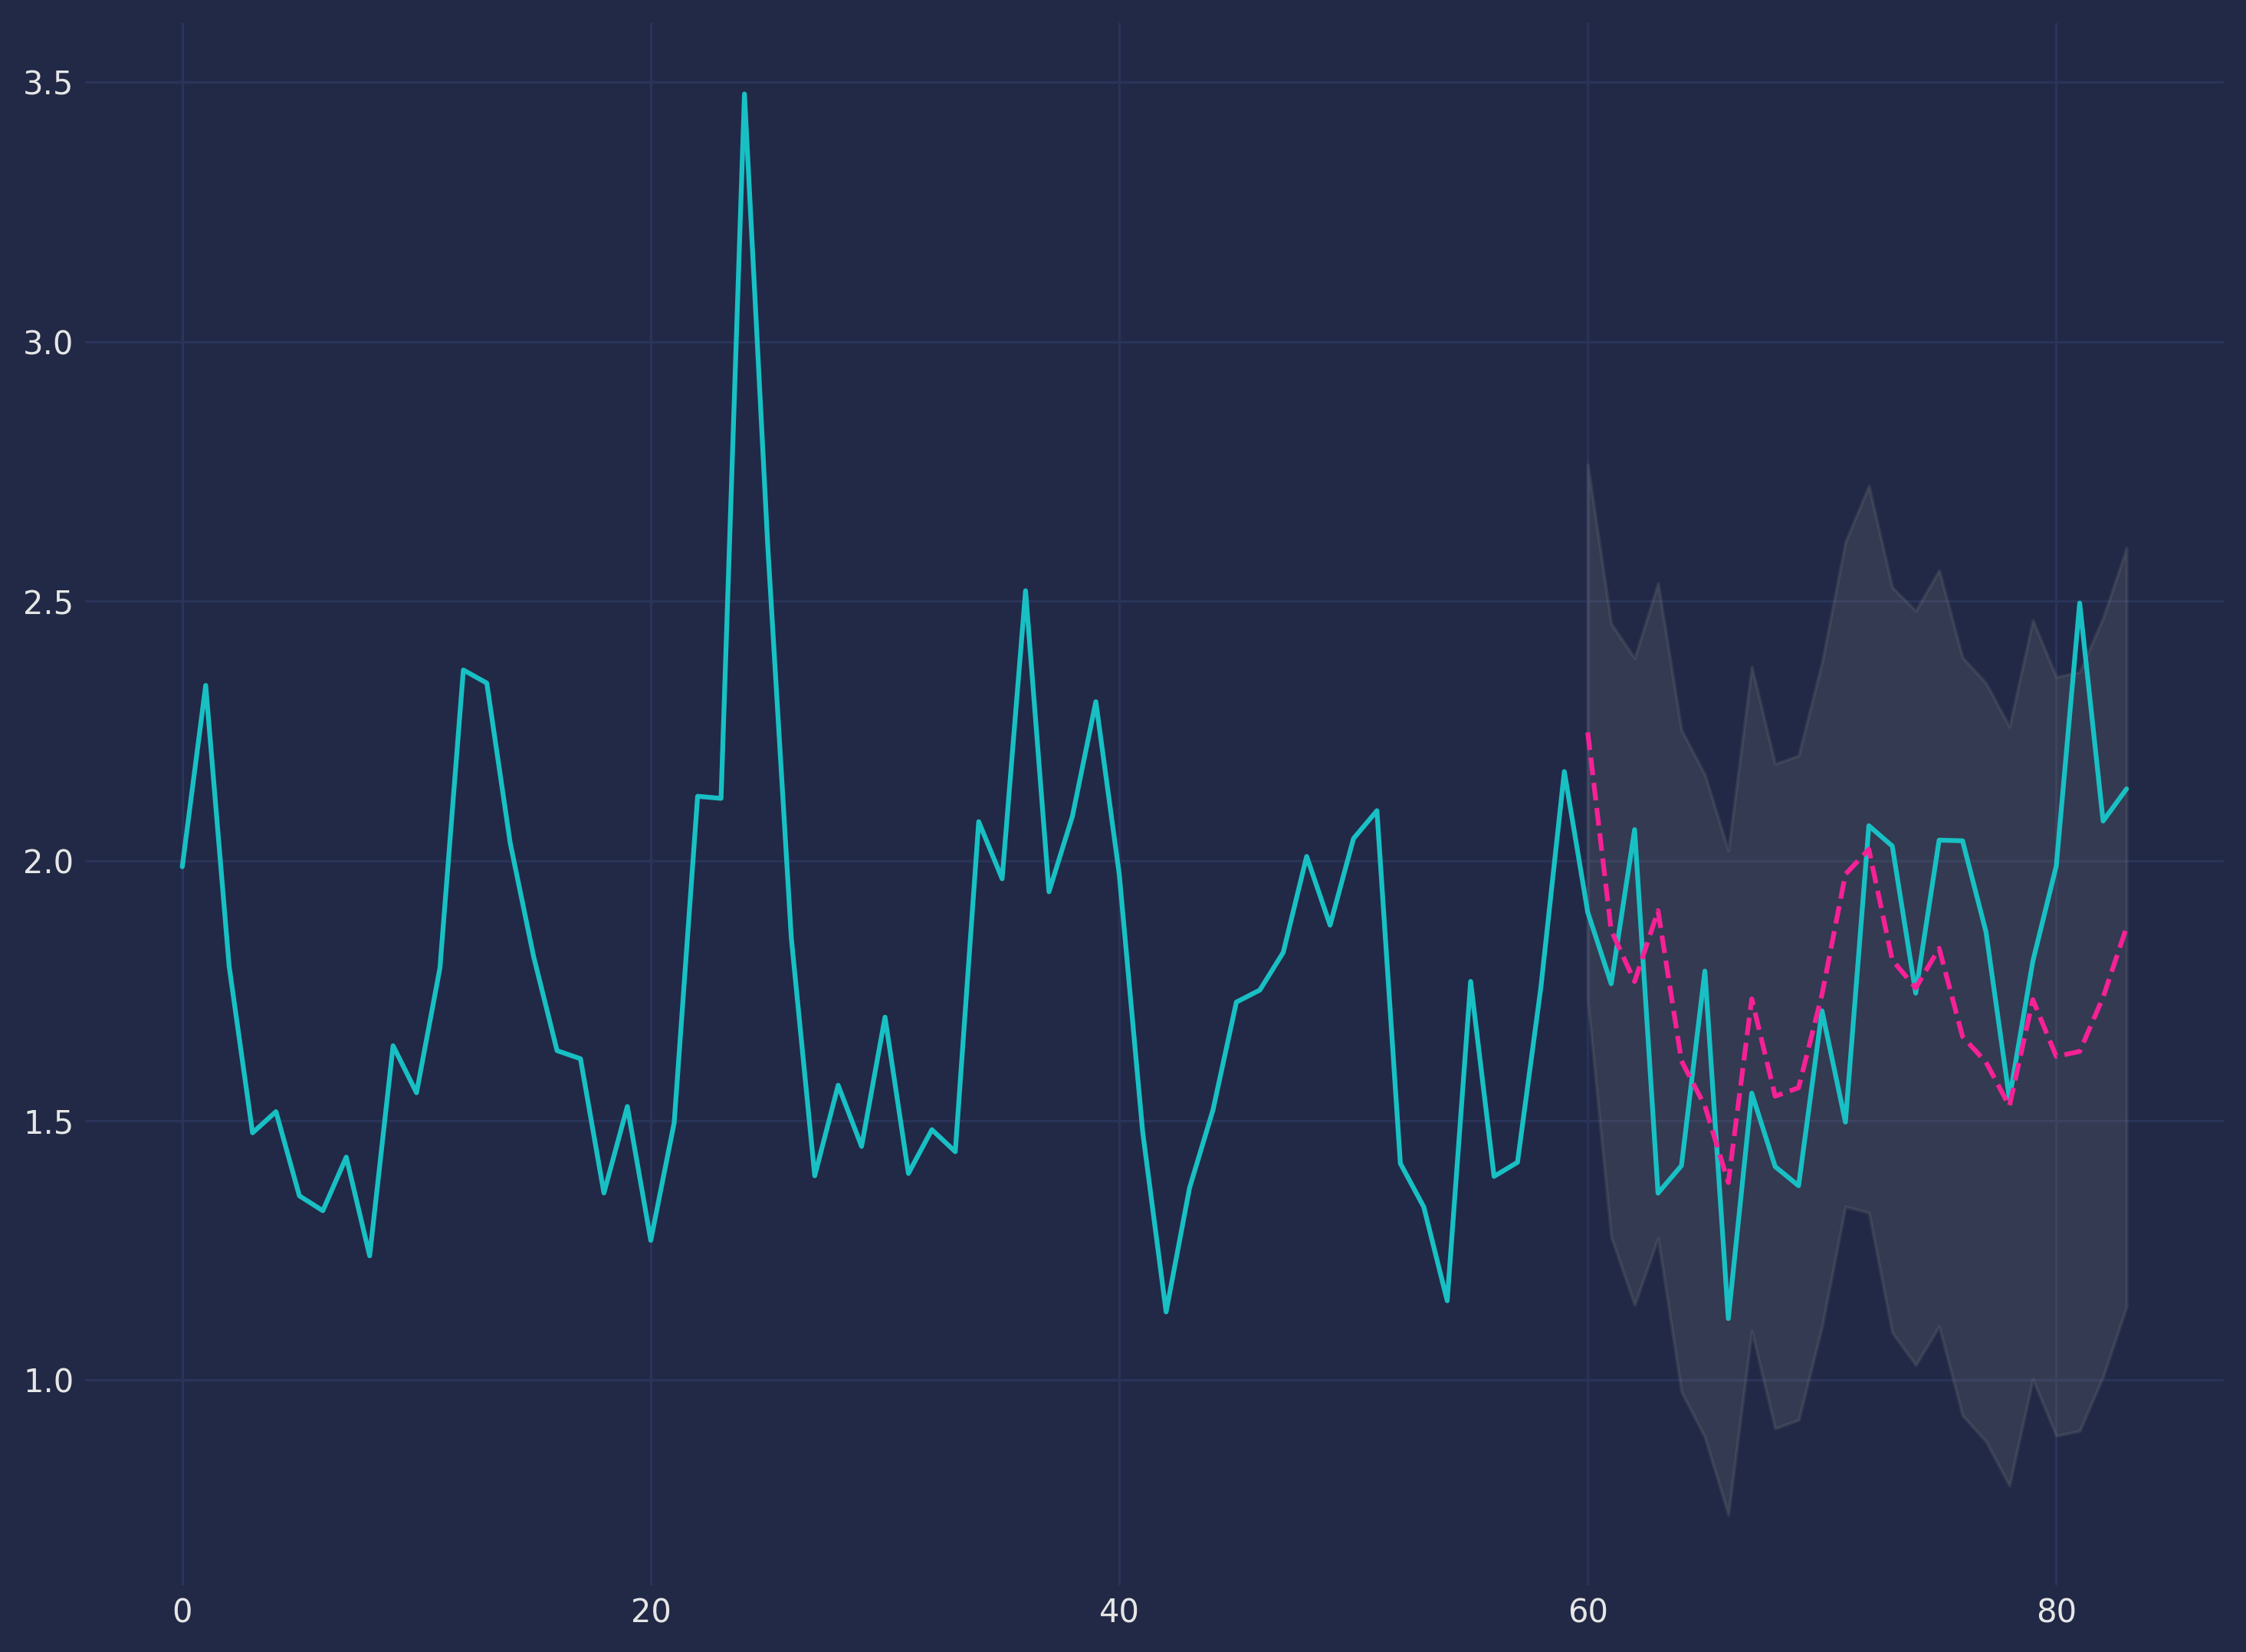

In [17]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)
    
    ax.plot(df_g['monthly'].measurement)
    ax.plot(df_s['monthly']['test'].index, preds.prediction, linestyle='dashed')
    ax.fill_between(df_s['monthly']['test'].index, preds.lower_confidence, preds.upper_confidence,
                   color='gray', alpha=0.2)

## Analysing heteroschedasticity (sic!) of the data

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


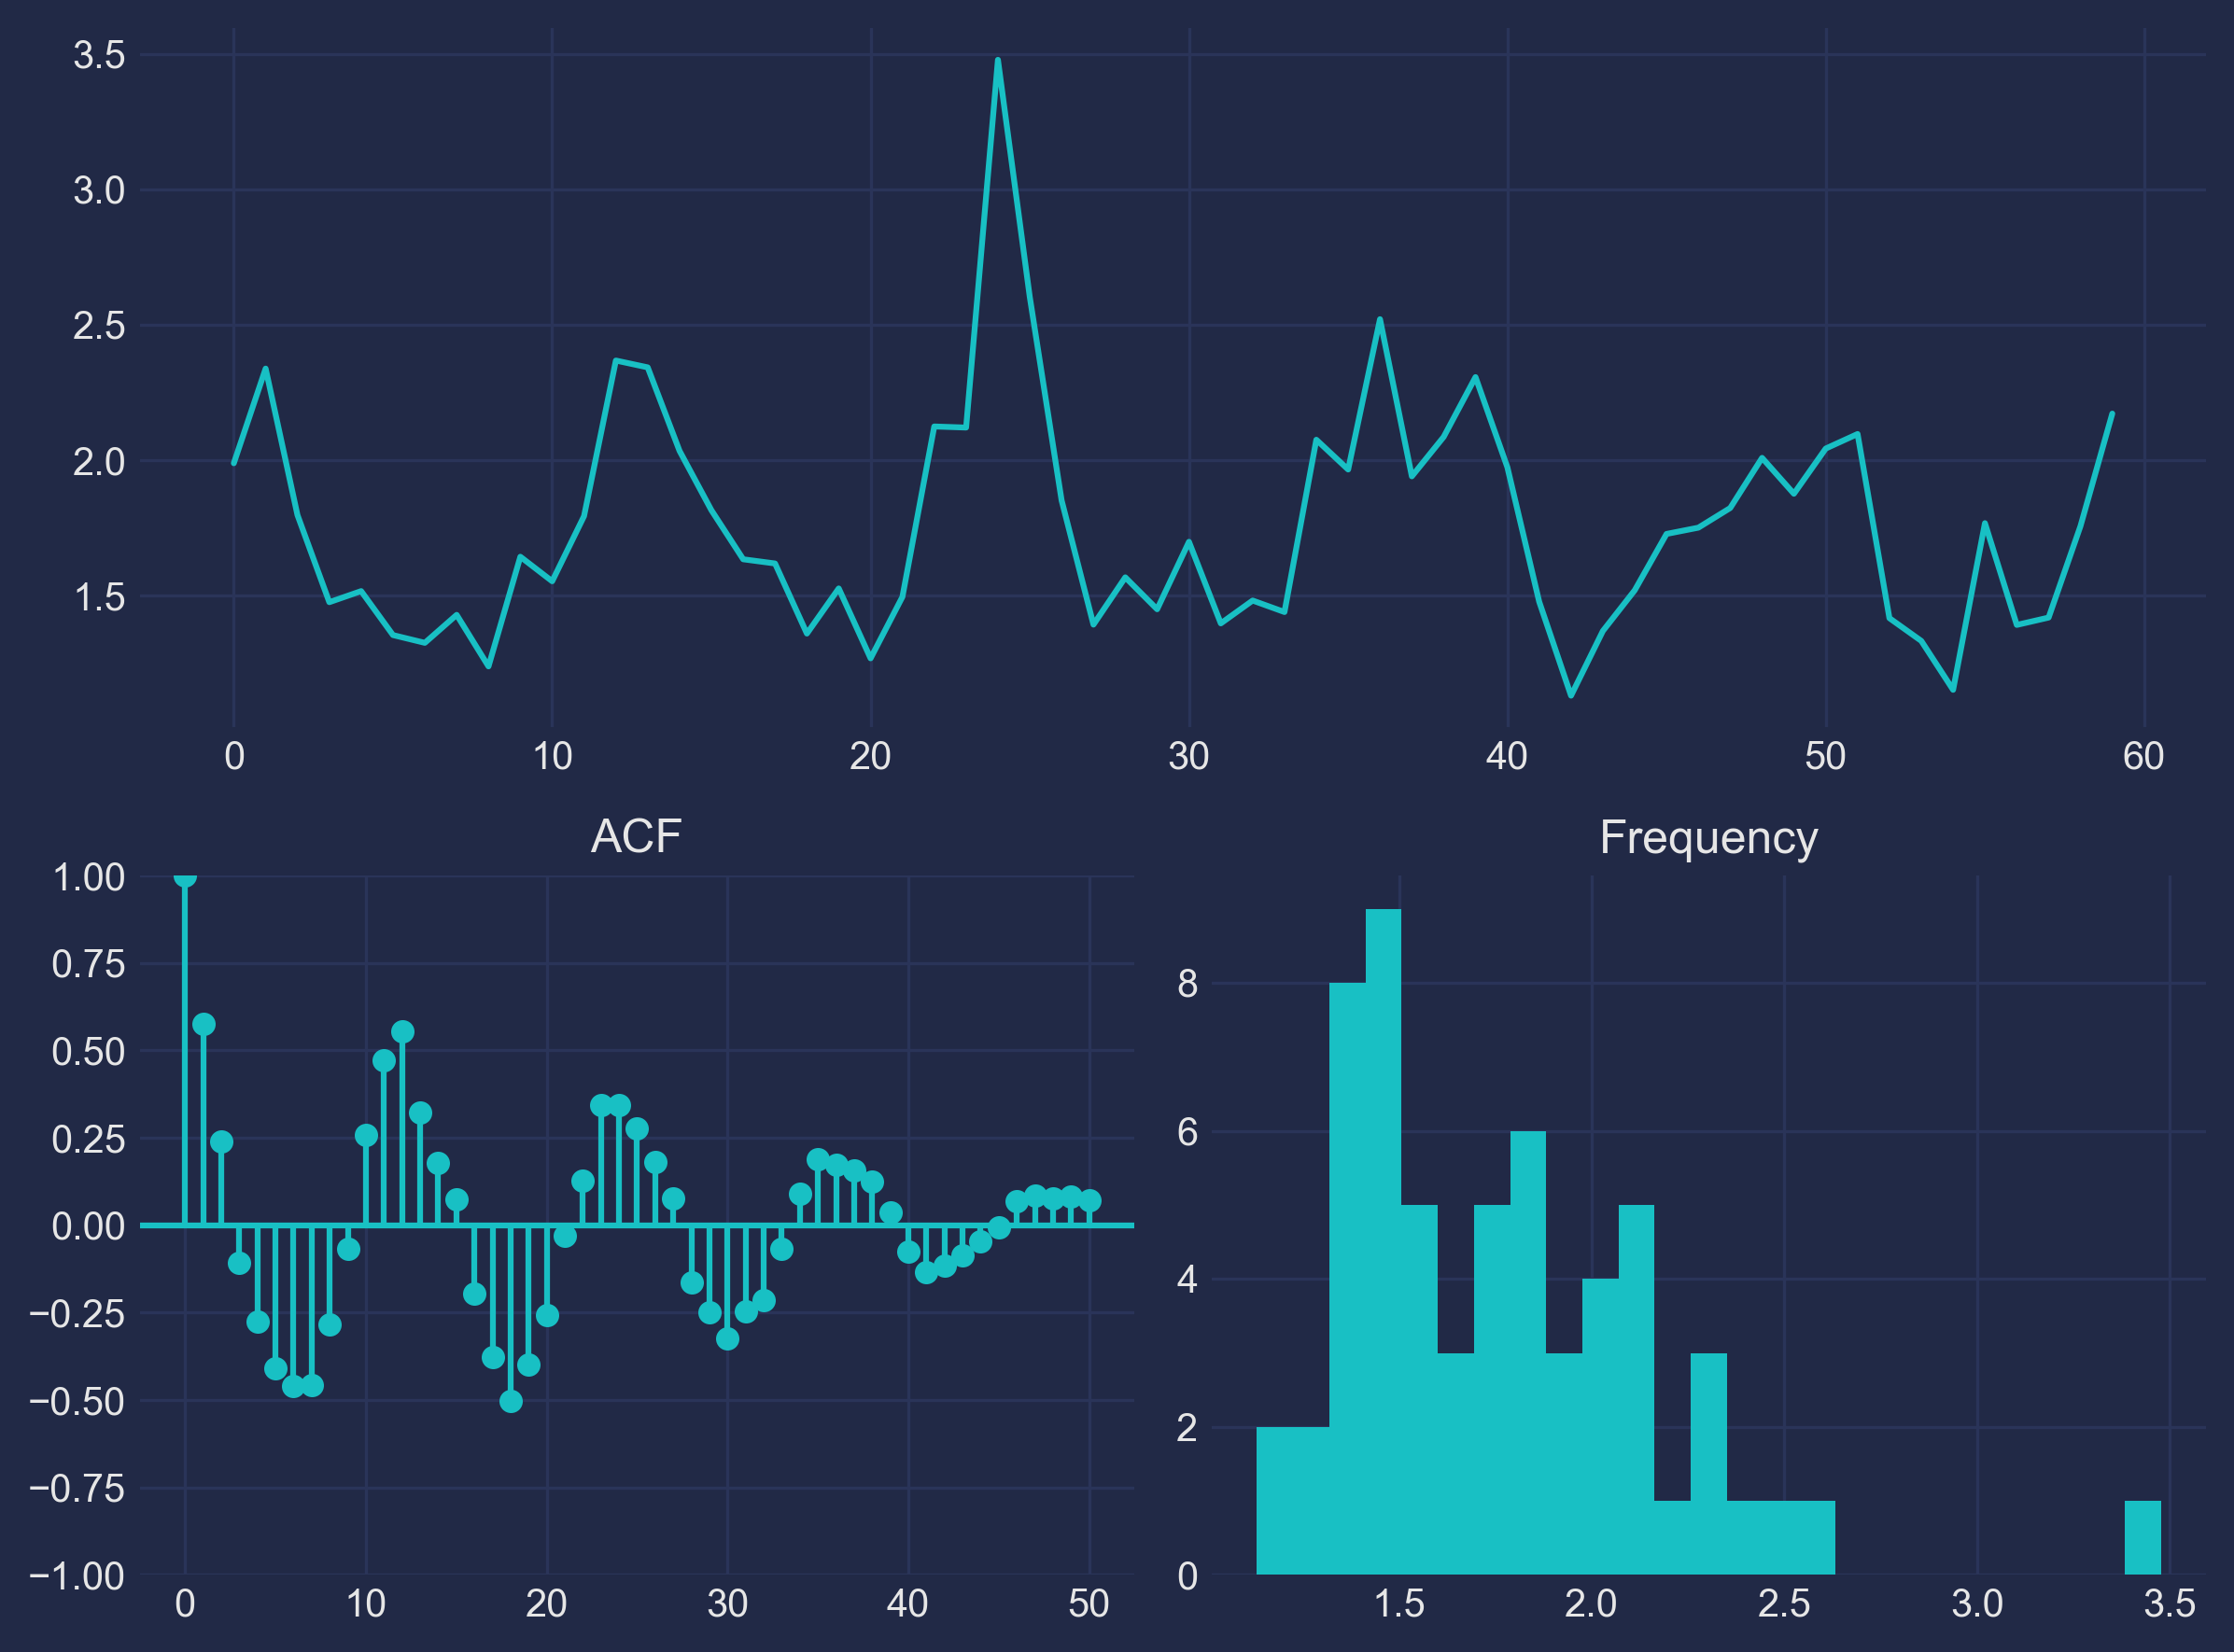

In [18]:
with plt.style.context(style_url), plt.rc_context({'figure.dpi': 300, 'figure.figsize': (12, 9)}):
    pmd.utils.tsdisplay(df_s['monthly']['train'].measurement)
    plt.show()

## Building model for weekly averages

In [19]:
decomposition, mdl, data_train, data_test = model.auto_model(df, 'weekly')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=33.05 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=382.817, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=242.965, Time=16.97 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=287.057, Time=8.74 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1062.189, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=248.985, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=243.282, Time=75.15 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=243.964, Time=24.26 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=244.289, Time=5.46 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=245.224, Time=120.34 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=331.341, Time=13.08 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=229.796, Time=27.80 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=233.711, Time=0.21 sec
 ARIMA(2,0,0)(2,0,0)[52] intercept   : AIC=230.687, Time=111.97 sec
 ARIMA(2,0,0)(1,0,1)[52] i

/home/rafaczd/Studia/sem10/SNaDV/project/model.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['prediction'] = pred
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['lower_confidence'] = lower
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

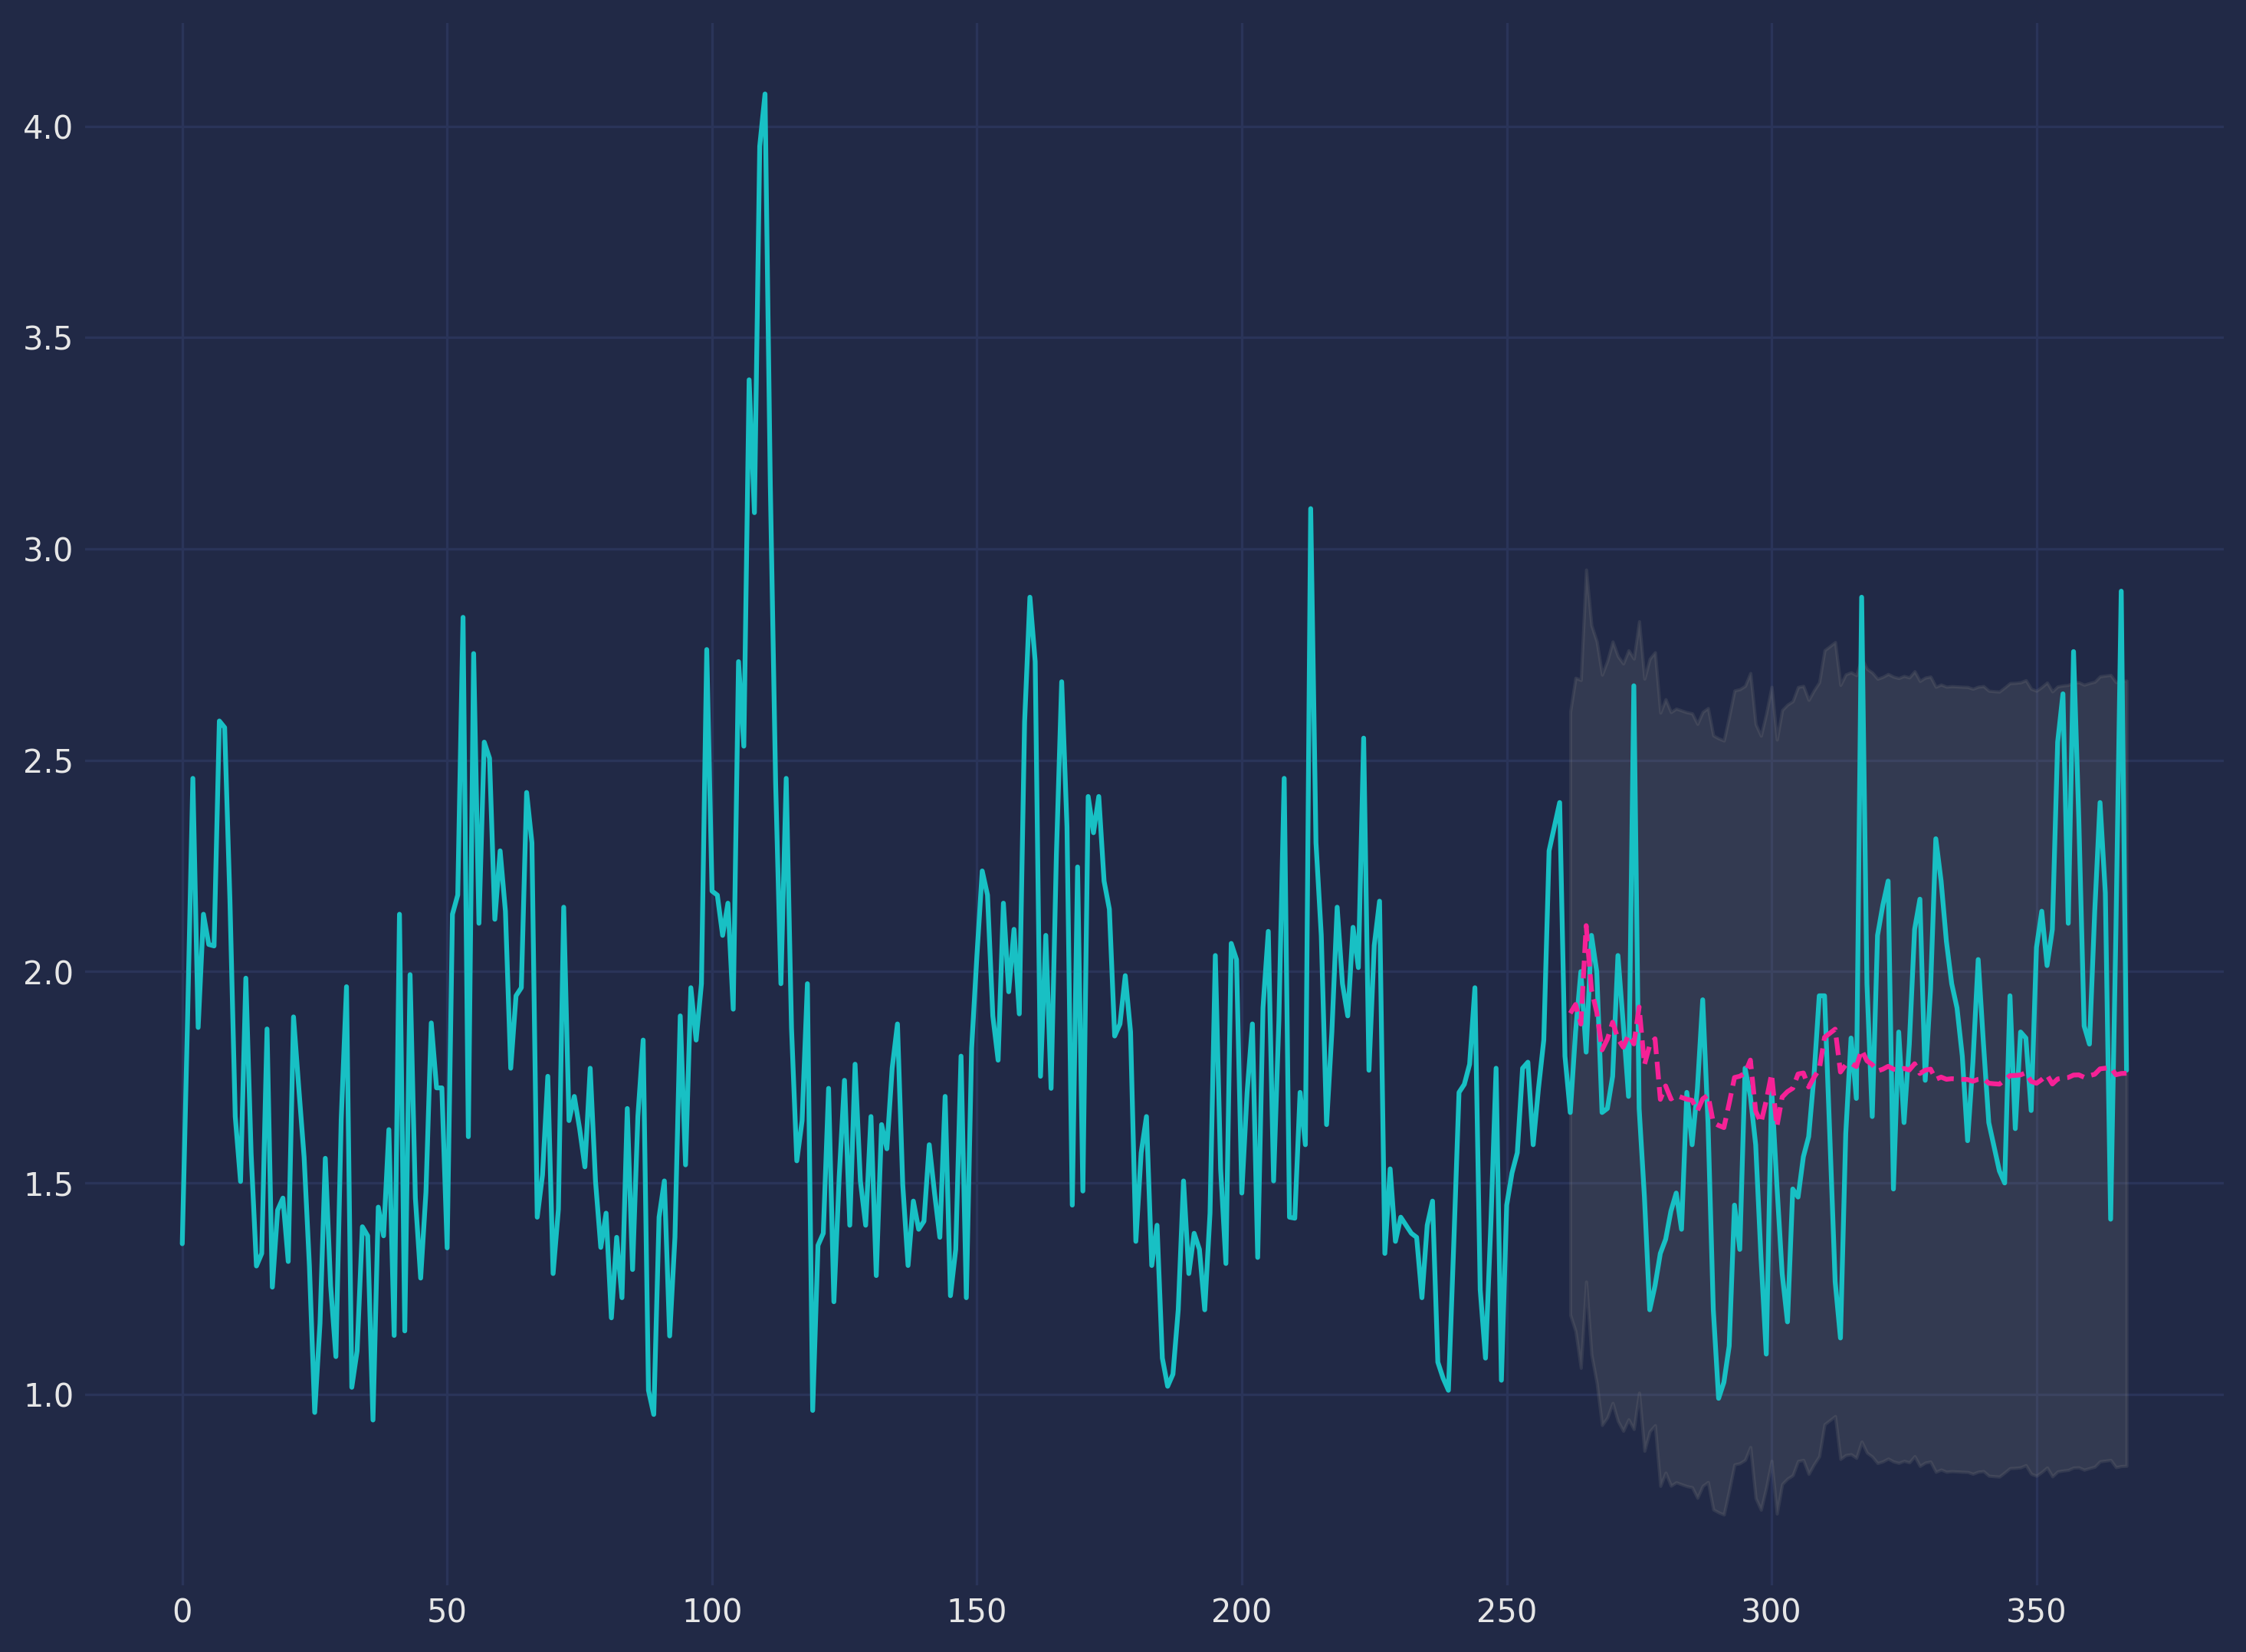

In [31]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)
    
    ax.plot(df_g['weekly'].measurement)
    ax.plot(data_test.prediction, linestyle='dashed')
    ax.fill_between(data_test.index, data_test.lower_confidence, data_test.upper_confidence,
                   color='gray', alpha=0.2)

## Analysing transformed weekly data

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


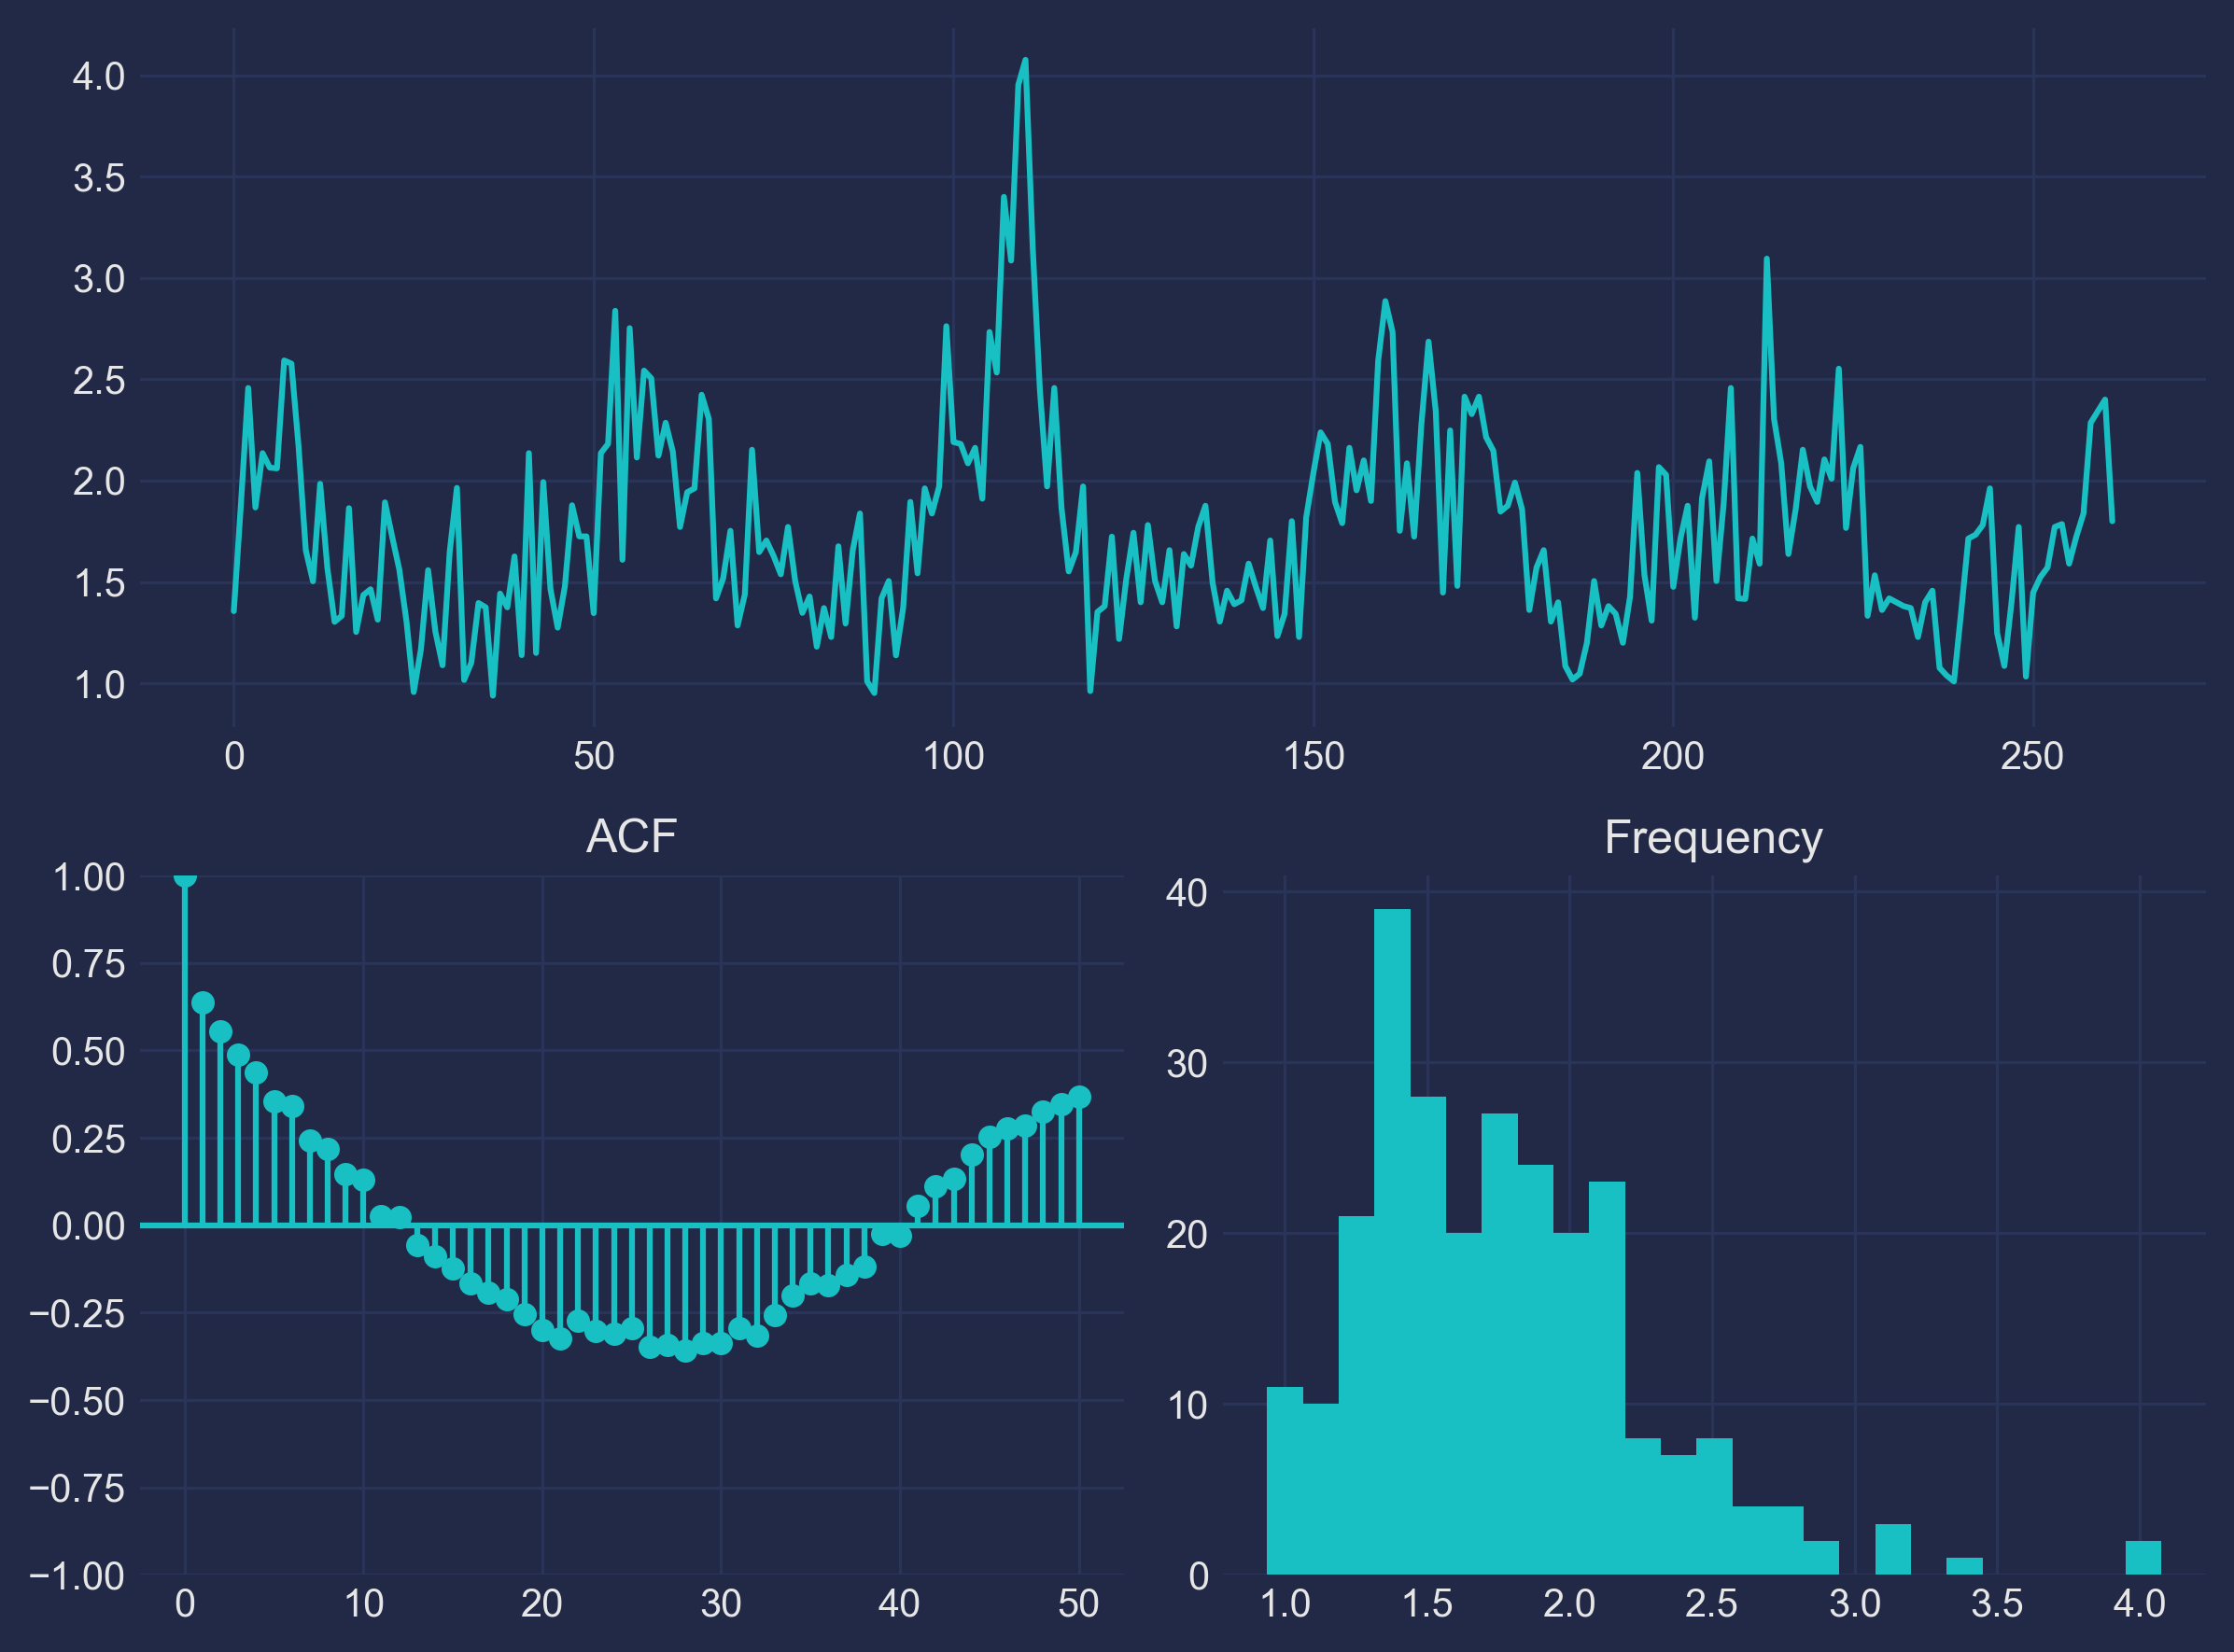

In [36]:
with plt.style.context(style_url), plt.rc_context({'figure.dpi': 300, 'figure.figsize': (12, 9)}):
    pmd.utils.tsdisplay(df_s['weekly']['train'].measurement)
    plt.show()

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


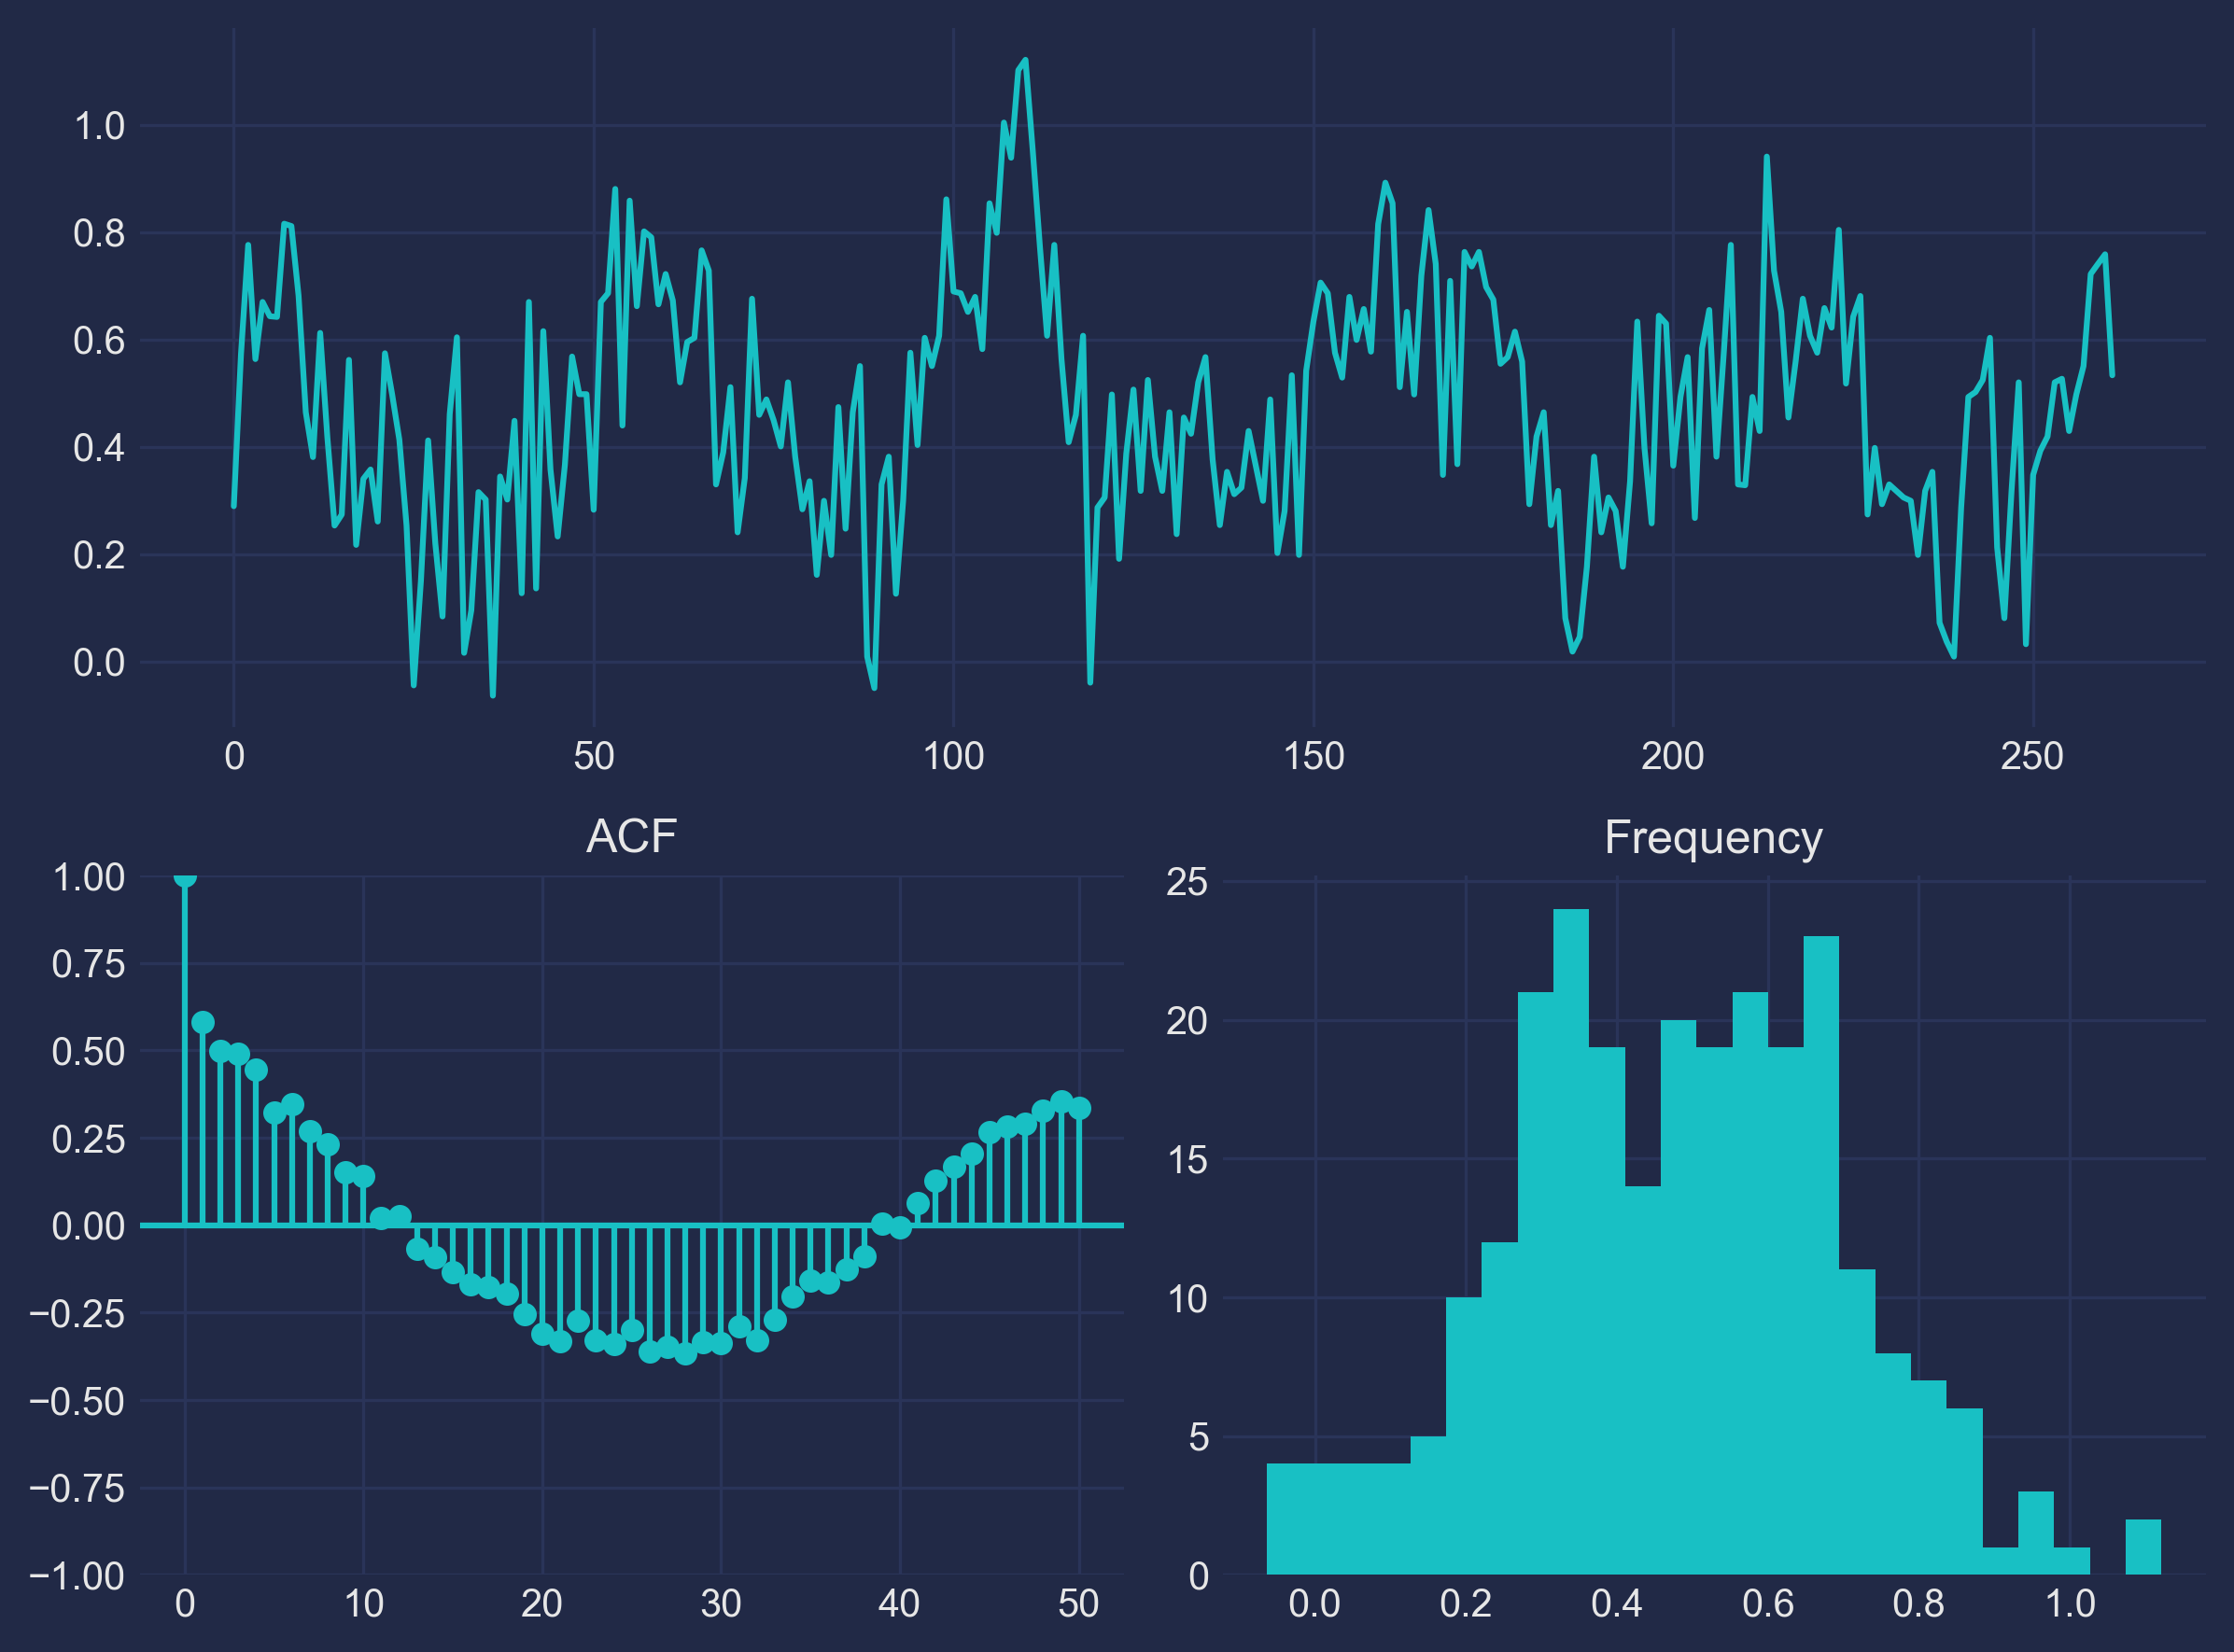

In [34]:
weekly_transformed, _ = pmd.preprocessing.BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(df_s['weekly']['train'].measurement)

with plt.style.context(style_url), plt.rc_context({'figure.dpi': 300, 'figure.figsize': (12, 9)}):
    pmd.utils.tsdisplay(weekly_transformed)
    plt.show()

In [39]:
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline

pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pmd.AutoARIMA(trace=True,
                            suppress_warnings=True,
                            m=52))
])

In [40]:
mdl_weekly_tf = pipeline.fit(df_s['weekly']['train'].measurement)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=17.30 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=-37.640, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=-148.960, Time=9.27 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=-117.614, Time=6.57 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=407.703, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=-143.587, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=-150.632, Time=48.12 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=-148.635, Time=105.03 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=-149.155, Time=14.00 sec
 ARIMA(0,0,0)(2,0,0)[52] intercept   : AIC=inf, Time=118.18 sec
 ARIMA(2,0,0)(2,0,0)[52] intercept   : AIC=-161.056, Time=110.04 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=-160.884, Time=13.54 sec
 ARIMA(2,0,0)(2,0,1)[52] intercept   : AIC=-159.105, Time=84.14 sec
 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=-158.839, Time=22.04 sec
 ARIMA(3,0,0)(2,0,0

In [47]:
pred_w, conf_int_w = mdl_weekly_tf.predict_in_sample(start=df_s['weekly']['test'].index[0], end=df_s['weekly']['test'].index[-1], return_conf_int=True)
lower_w, upper_w = model.transform_confidences(conf_int_w)

preds_w = pd.DataFrame({
    'prediction': pred_w,
    'lower_confidence': lower_w,
    'upper_confidence': upper_w
})

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/arima/arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "


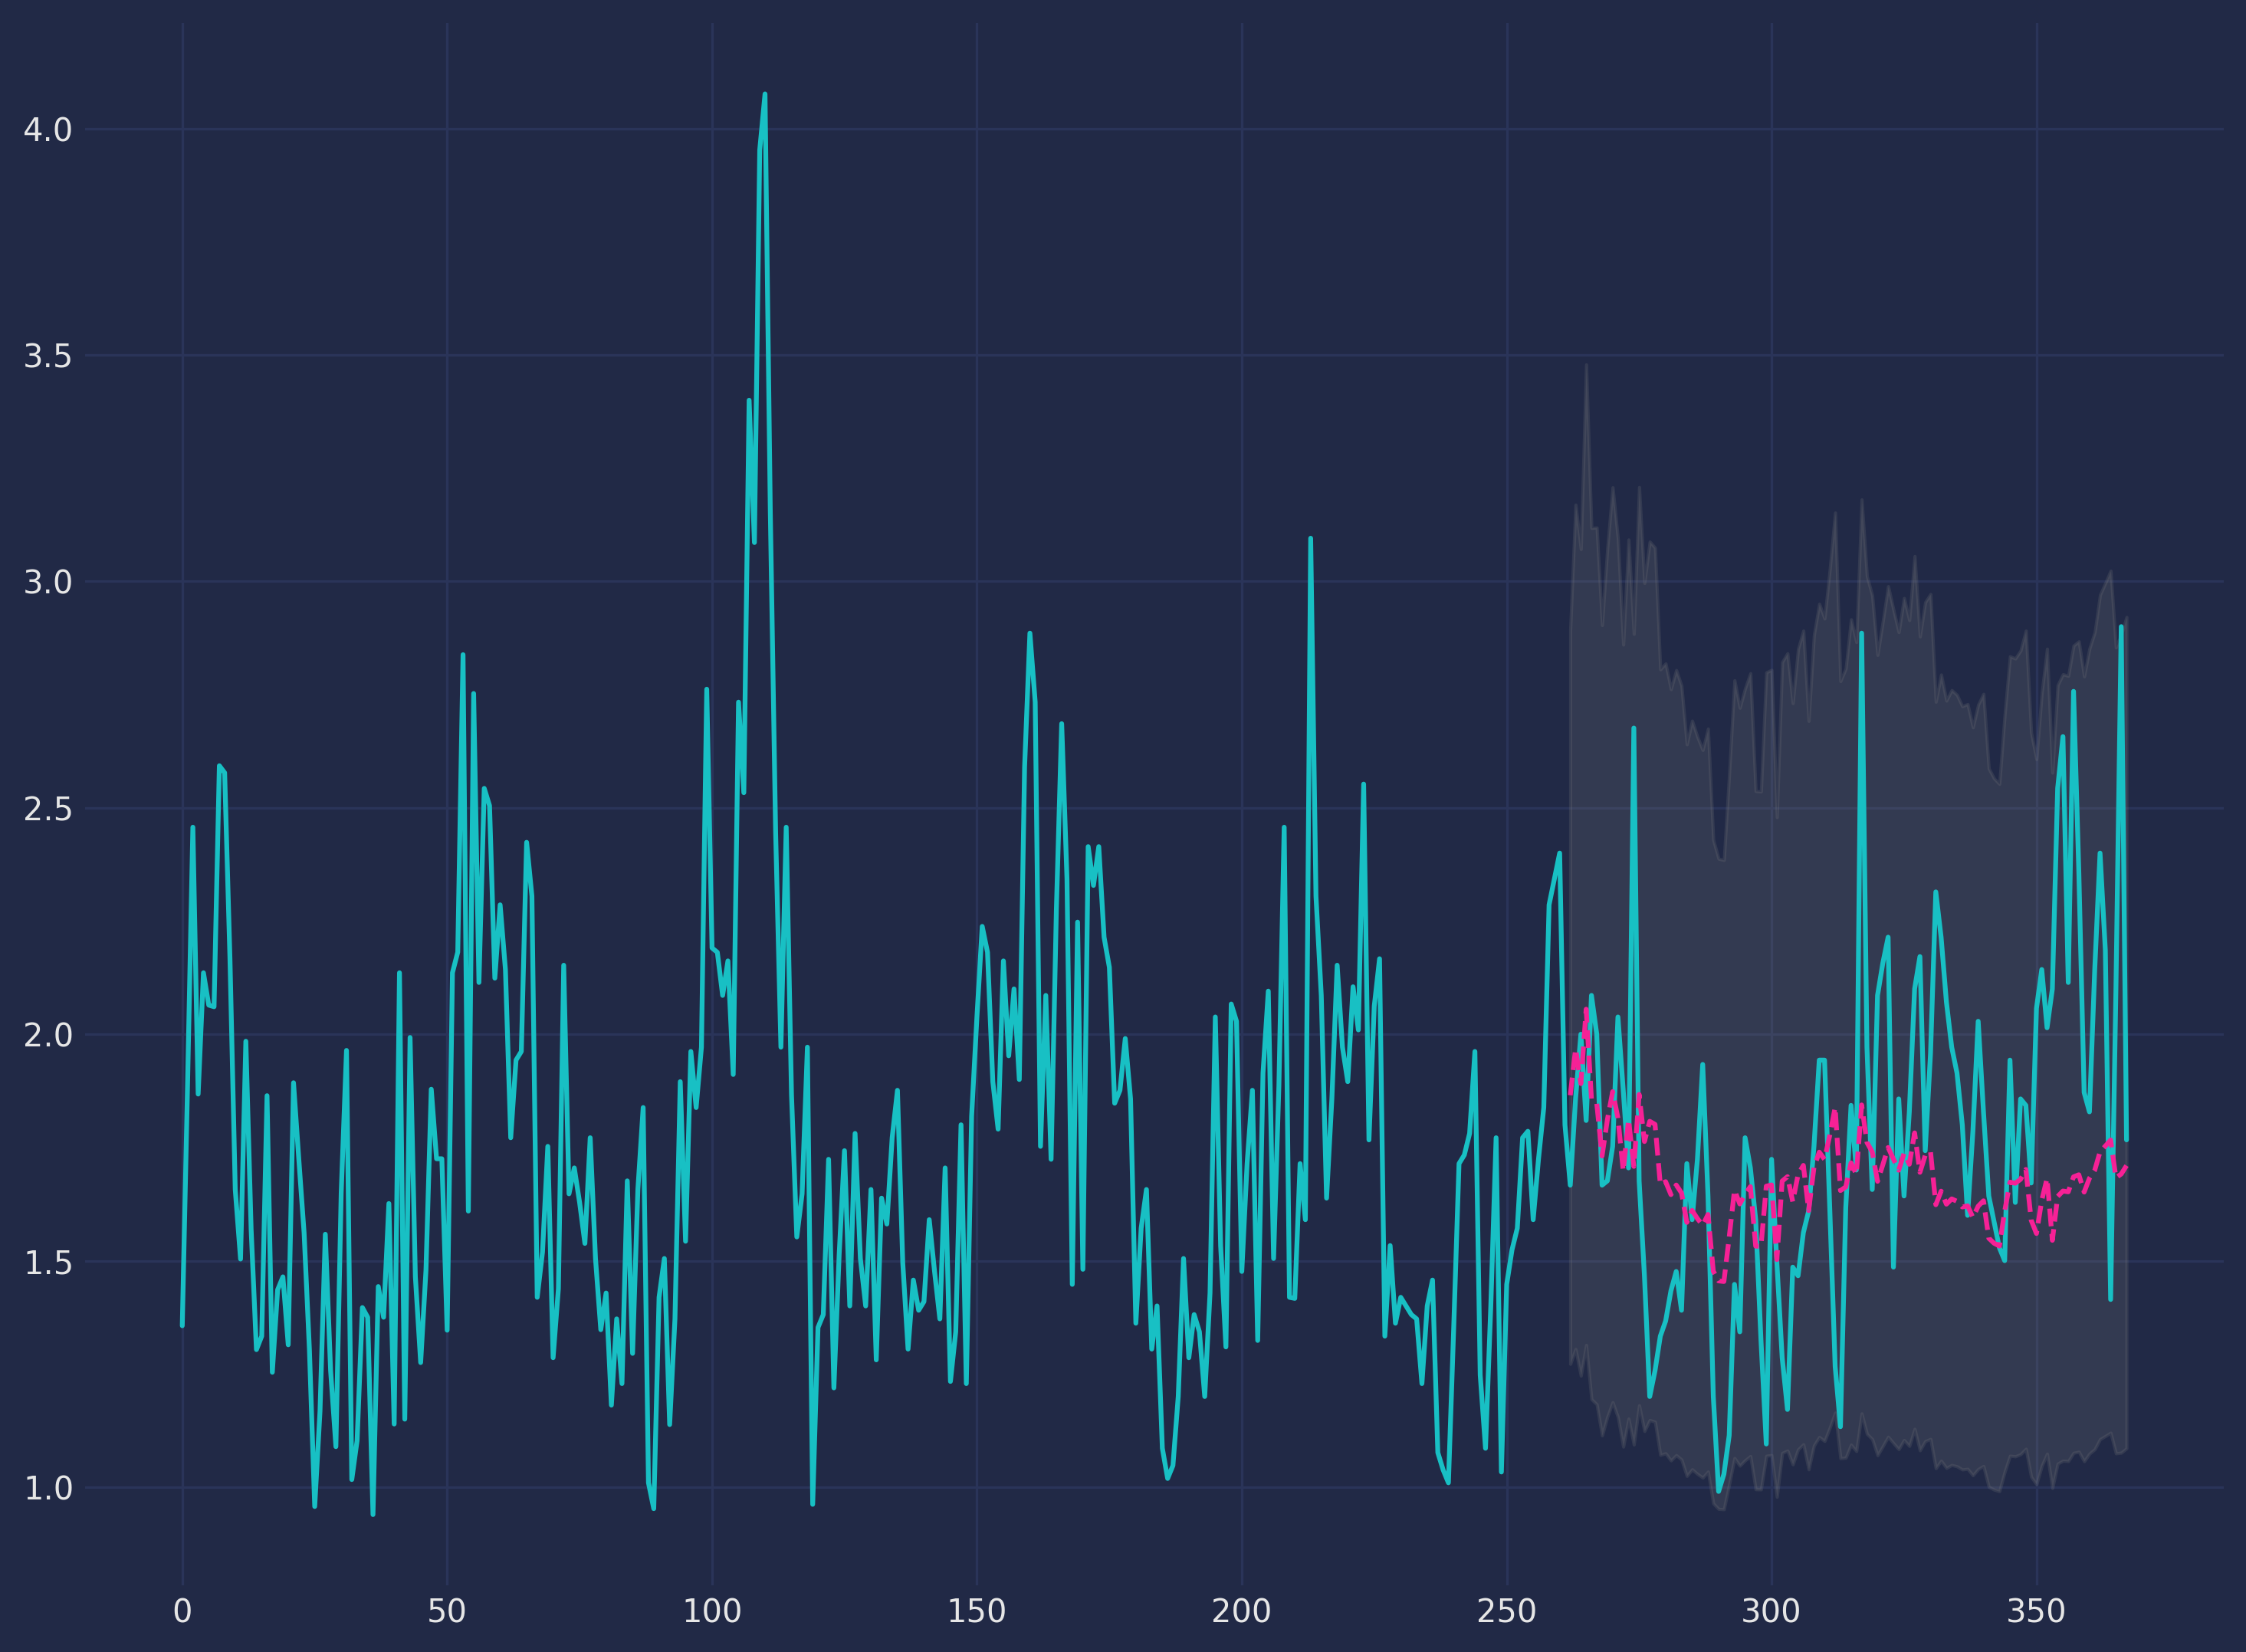

In [48]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)
    
    ax.plot(df_g['weekly'].measurement)
    ax.plot(df_s['weekly']['test'].index, preds_w.prediction, linestyle='dashed')
    ax.fill_between(df_s['weekly']['test'].index, preds_w.lower_confidence, preds_w.upper_confidence,
                   color='gray', alpha=0.2)

## Other pollution type

In [53]:
df_pm10 = read.query_data_range(years=list(range(2010, 2022)), pollutants='PM10', expositions=24)

df_pm10_m = model.group_and_reindex(df_pm10, 'monthly')

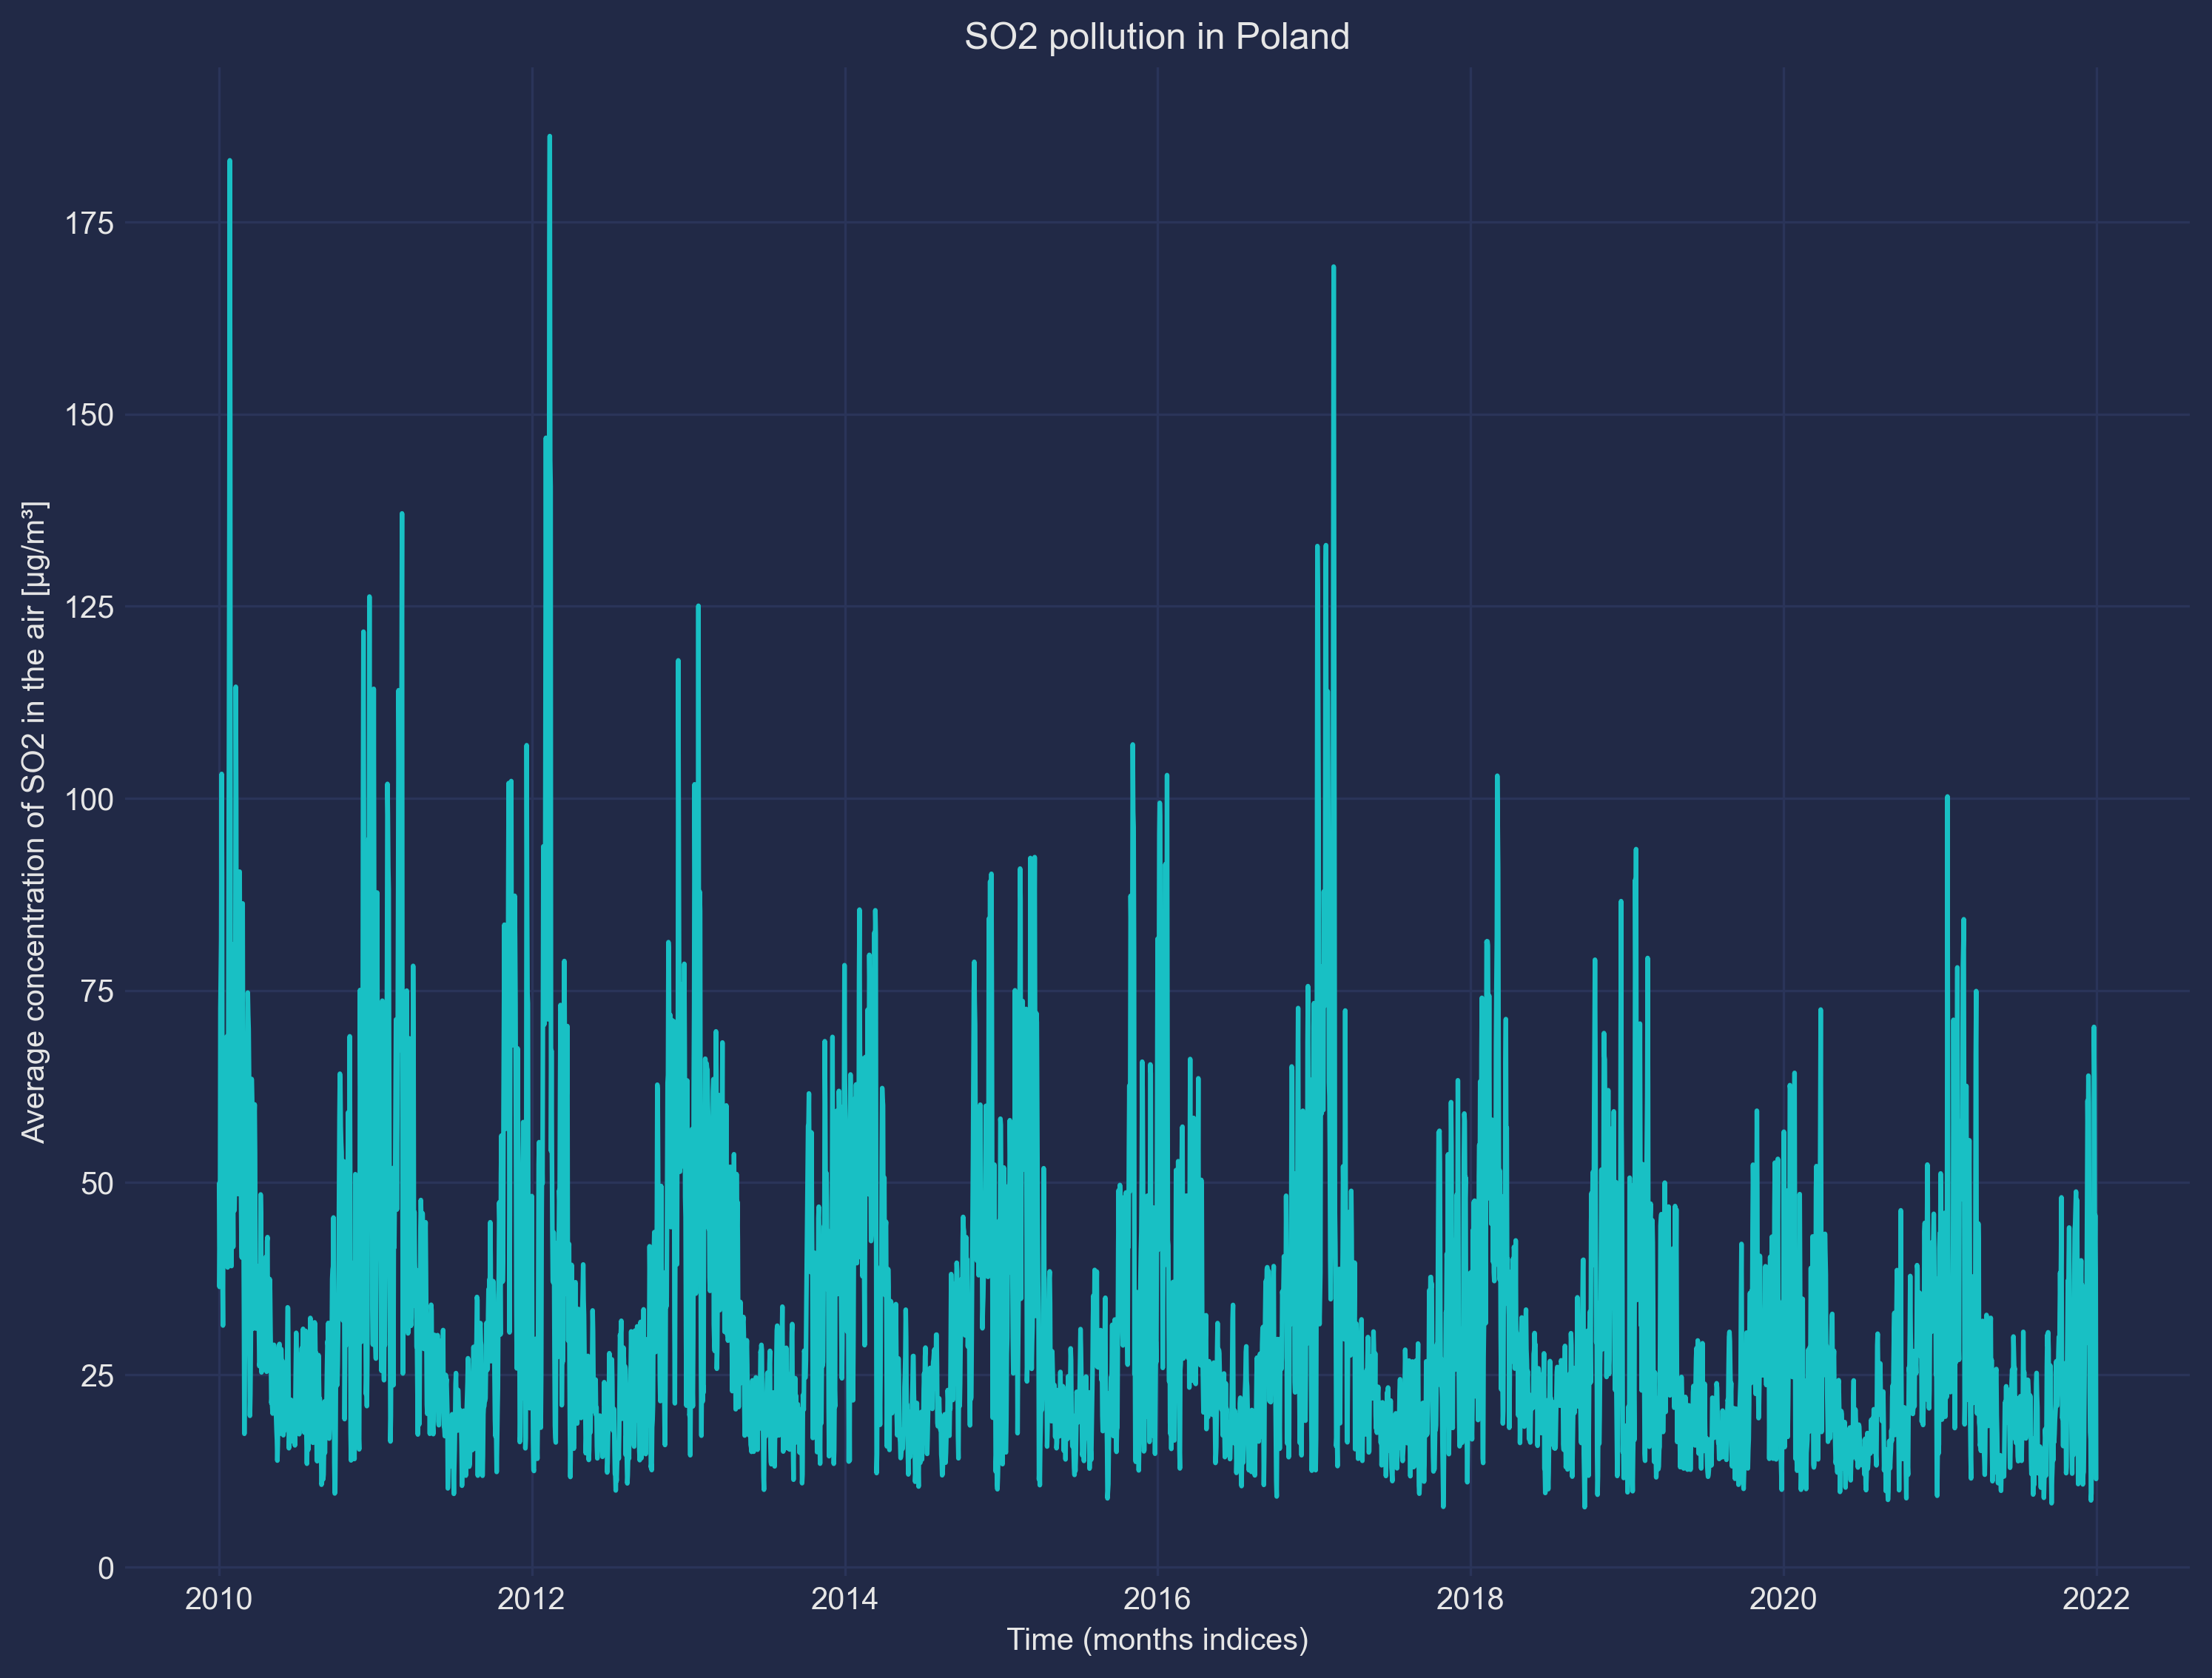

In [50]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)

    ax.plot(df_pm10.groupby('timestamp').mean().measurement)

    ax.set_title('SO2 pollution in Poland')
    ax.set_xlabel('Time (months indices)')
    ax.set_ylabel('Average concentration of SO2 in the air [μg/m³]')
    
    plt.show()

In [51]:
decomposition, mdl, data_train, data_test = model.auto_model(df_pm10, 'monthly')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=982.304, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=909.905, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=922.452, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1206.301, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=924.792, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=894.855, Time=0.71 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=881.491, Time=1.23 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=882.103, Time=0.49 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=885.735, Time=1.51 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=879.384, Time=1.23 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=915.779, Time=0.51 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=918.720, Time=0.15 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : A

/home/rafaczd/Studia/sem10/SNaDV/project/model.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:, 'prediction'] = pred
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:, 'lower_confidence'] = lower
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


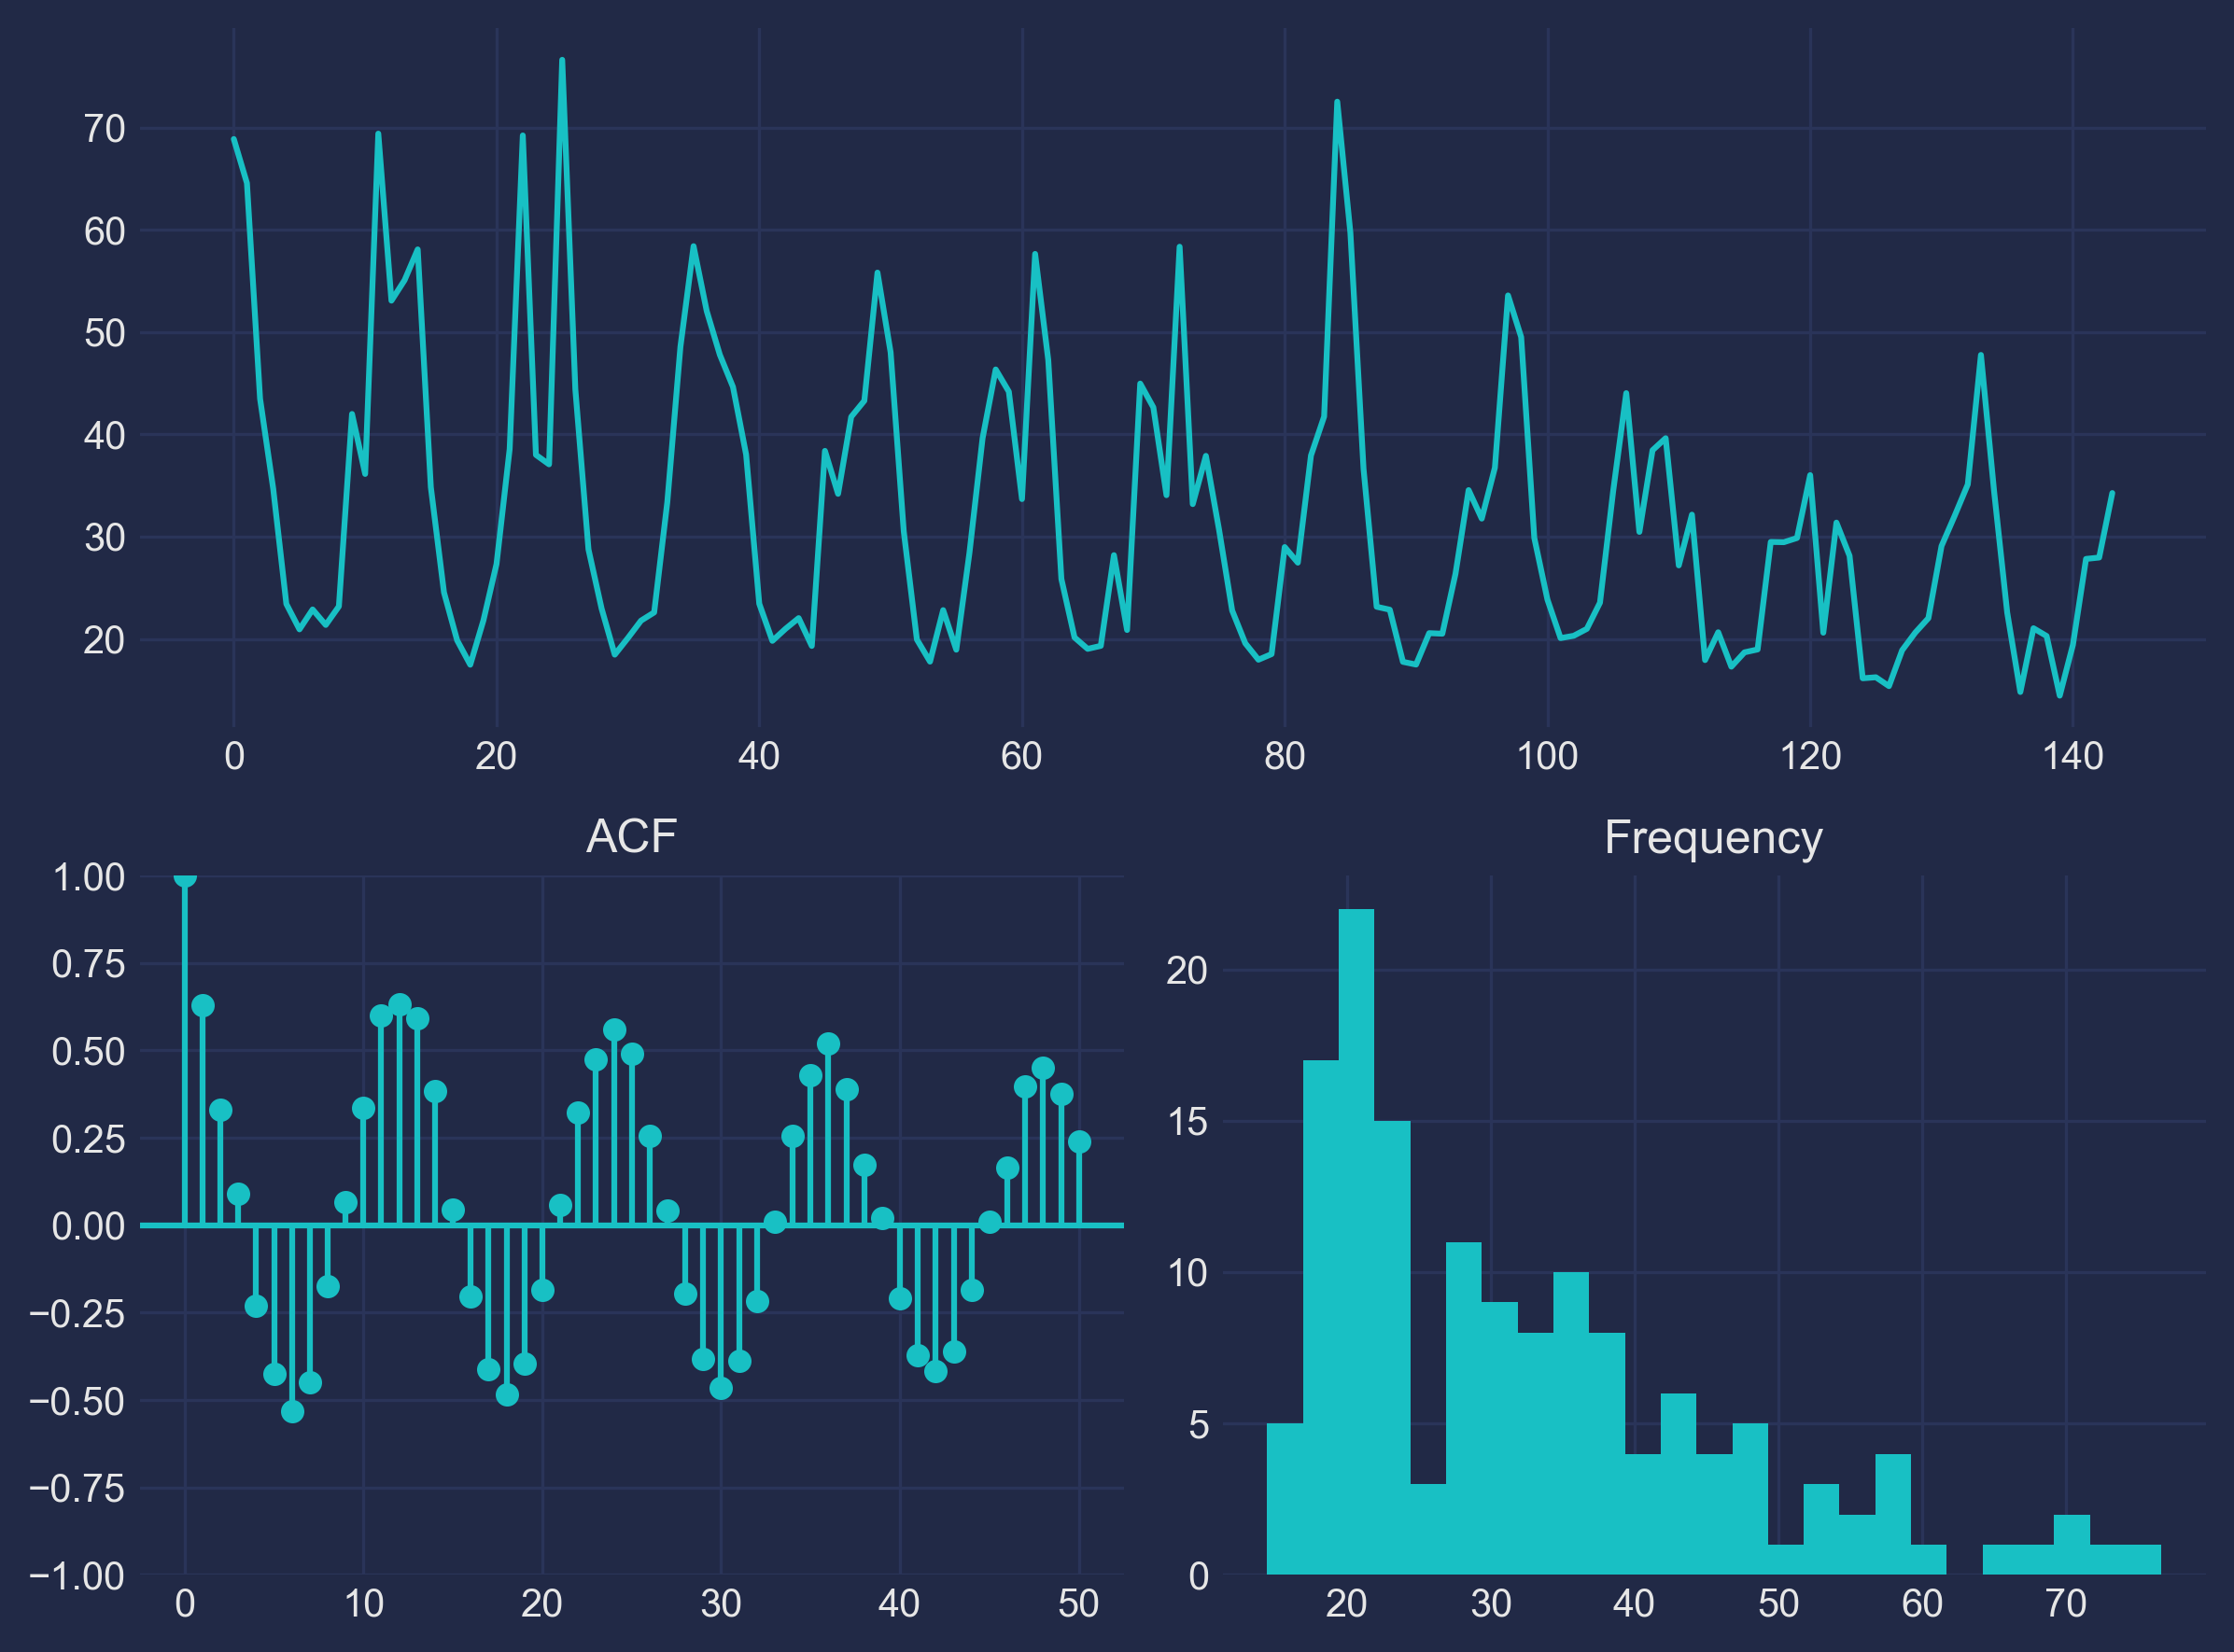

In [54]:
with plt.style.context(style_url), plt.rc_context({'figure.dpi': 300, 'figure.figsize': (12, 9)}):
    pmd.utils.tsdisplay(df_pm10_m.measurement)
    plt.show()

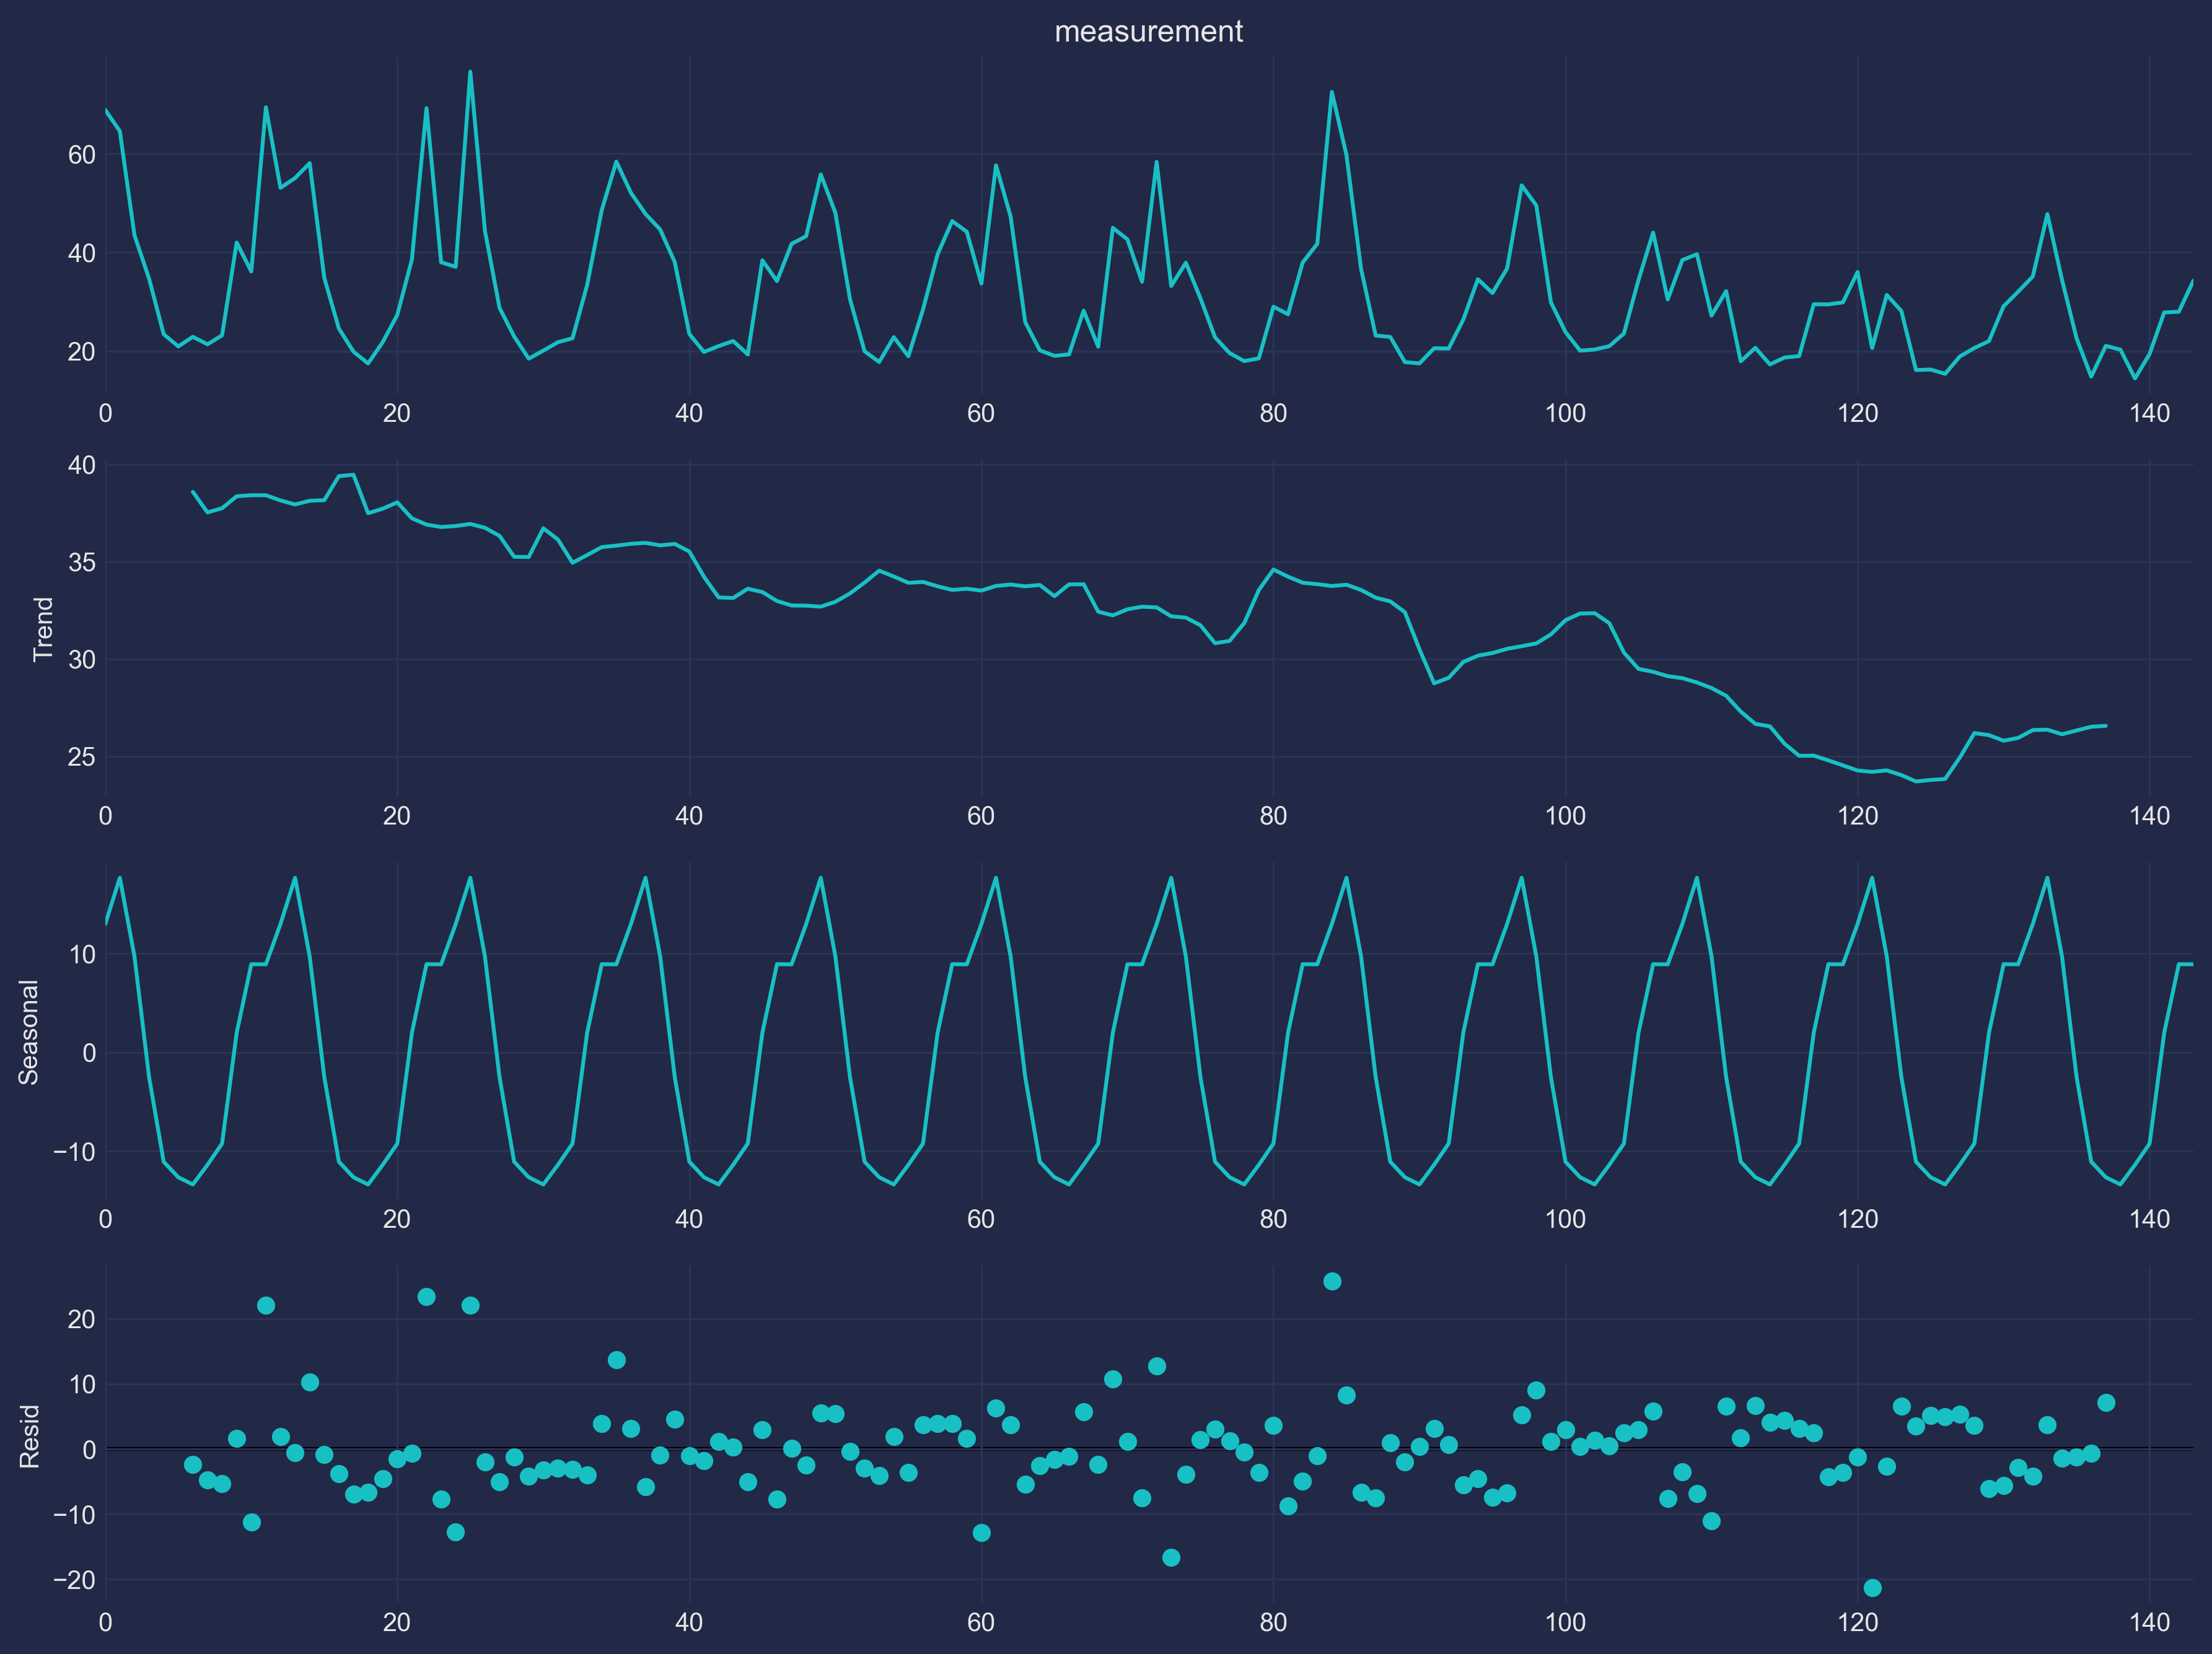

In [55]:
decomposition = seasonal_decompose(df_pm10_m.measurement, model='add', period=12)

with plt.style.context(style_url), plt.rc_context({'figure.dpi': 300, 'figure.figsize': (12, 9)}):
    decomposition.plot()
    plt.show()

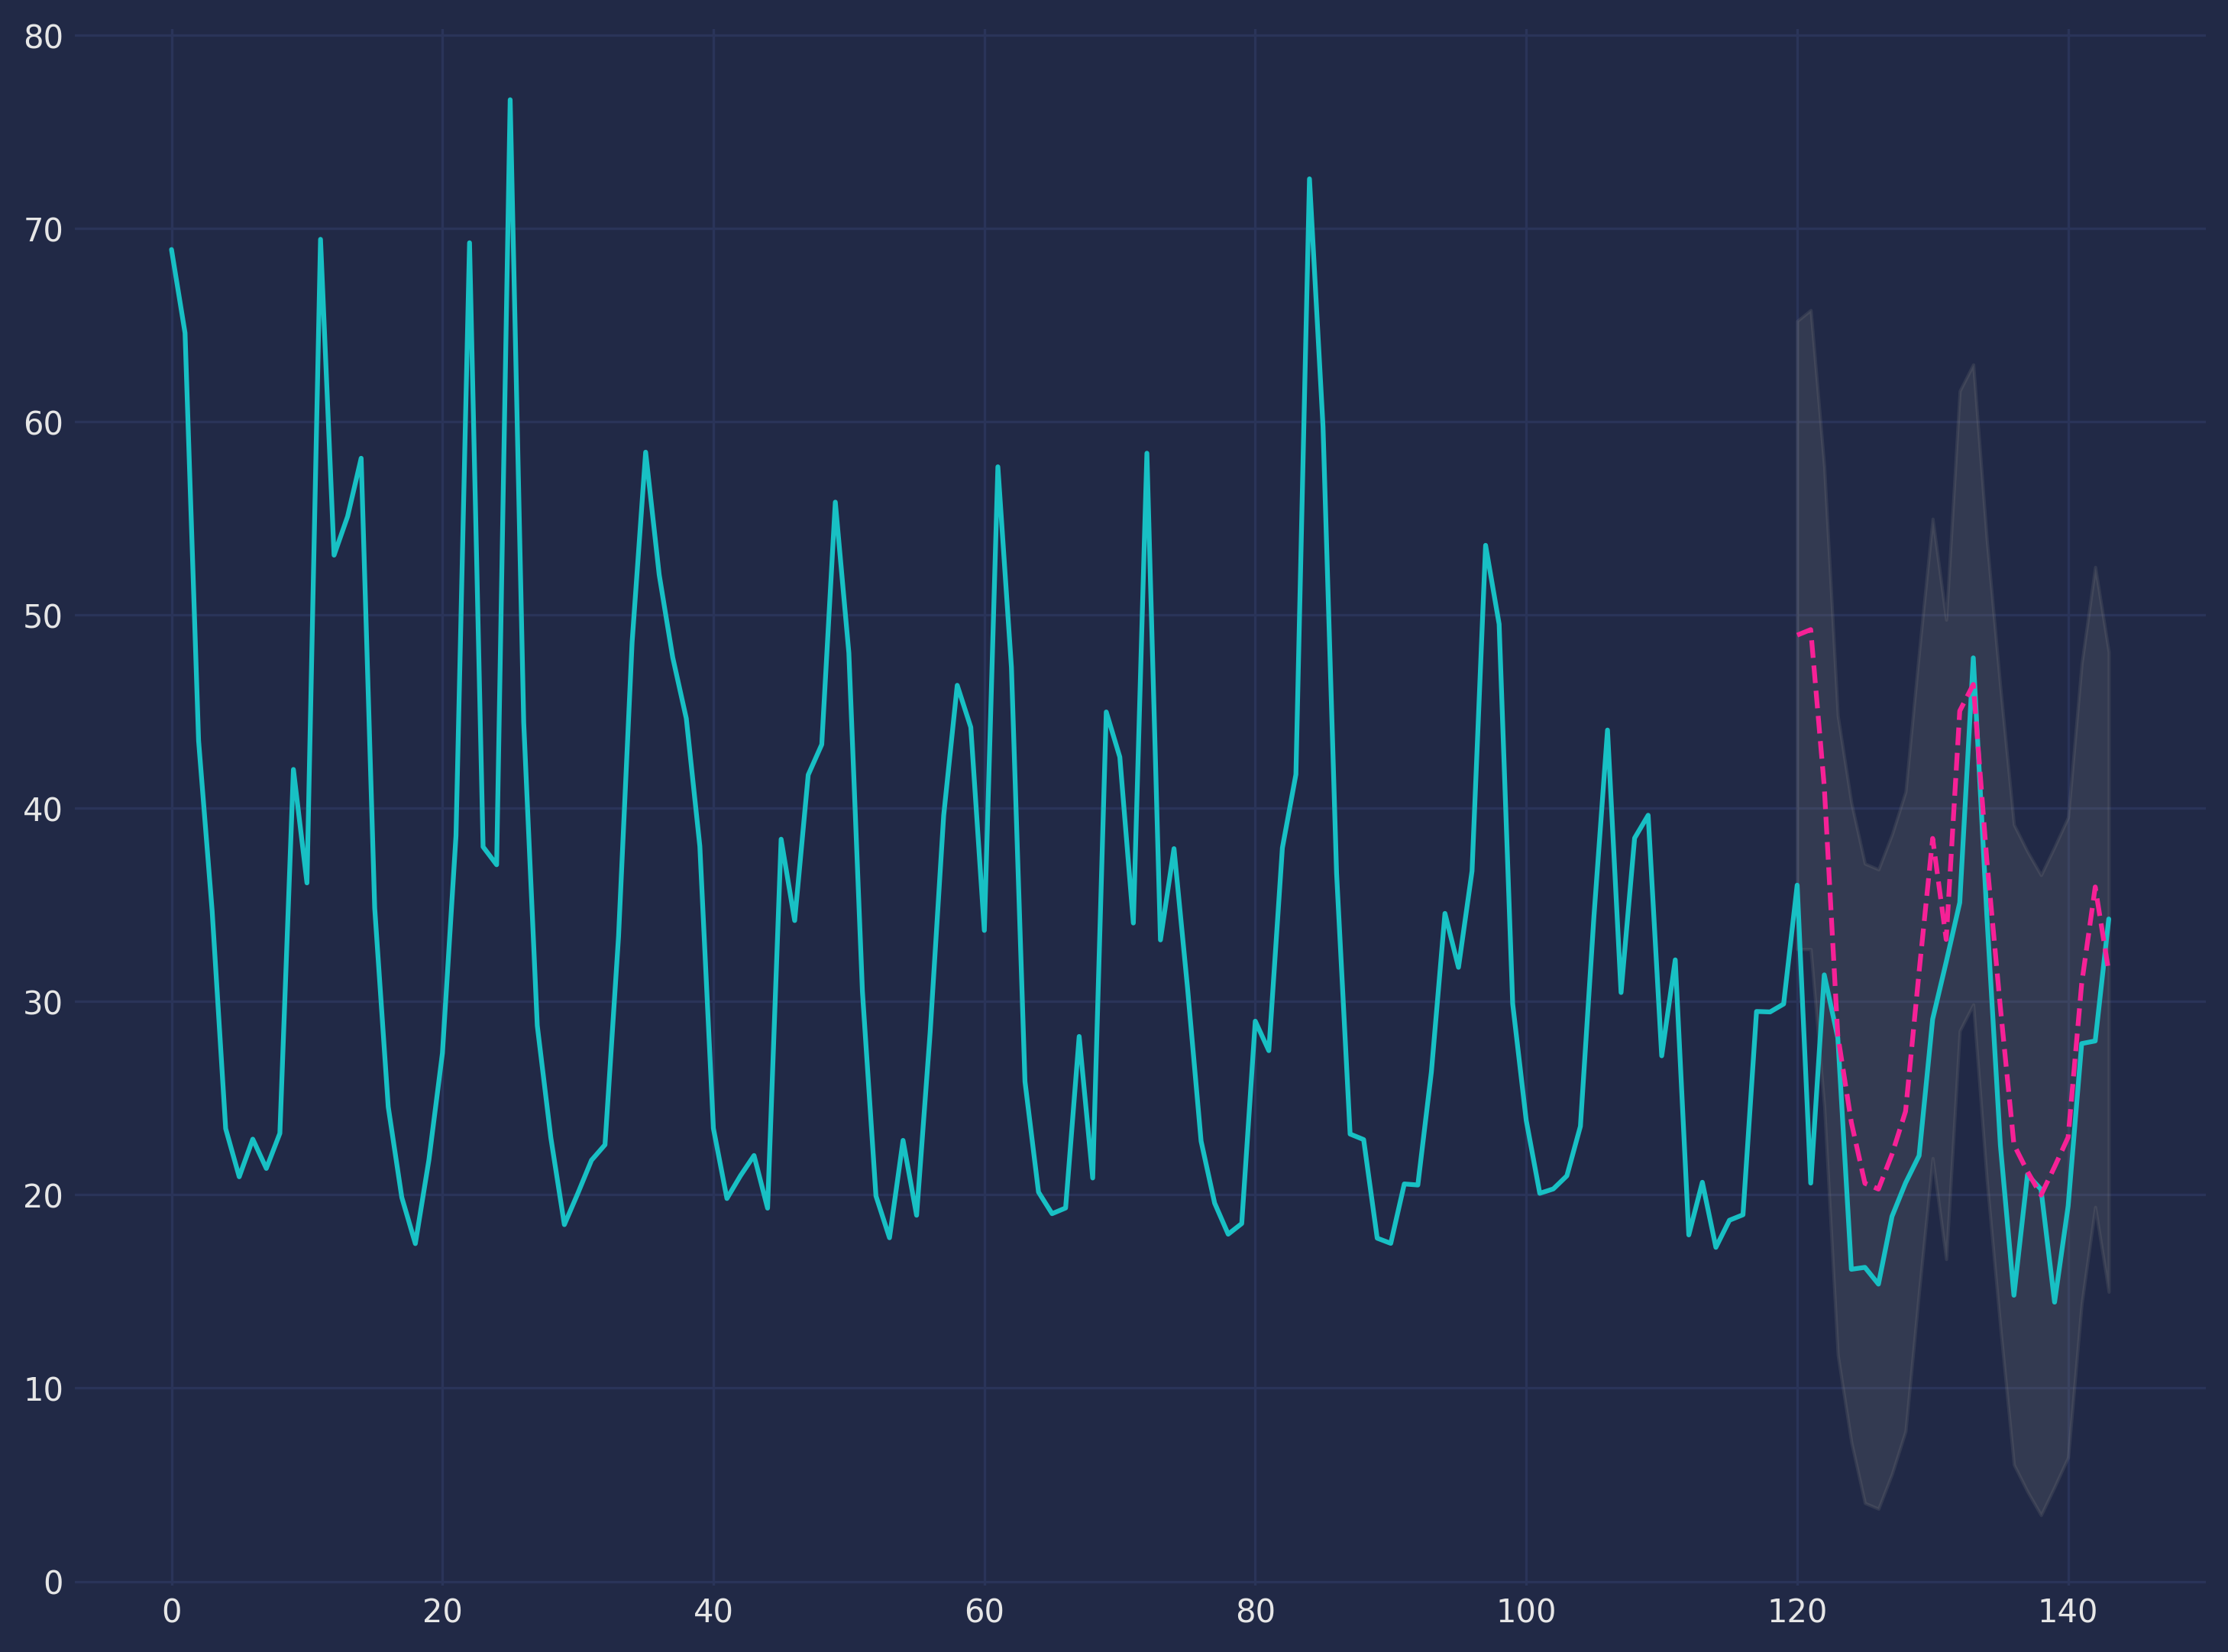

In [58]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)
    
    ax.plot(df_pm10_m.measurement)
    ax.plot(data_test.prediction, linestyle='dashed')
    ax.fill_between(data_test.index, data_test.lower_confidence, data_test.upper_confidence,
                   color='gray', alpha=0.2)

In [63]:
decomposition, mdl, data_train, data_test = model.auto_model(df_pm10, 'monthly', transform=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-444.113, Time=2.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-294.451, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-372.994, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=459.617, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-396.797, Time=0.88 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-363.466, Time=0.88 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-439.852, Time=2.53 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-408.594, Time=2.65 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-382.232, Time=0.26 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-403.805, Time=4.06 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-406.861, Time=9.56 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-435.991, Time=11.68 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=-444.684, Time=4.70 sec
 ARIMA(1,0,2)(0,0,1)[12]

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/arima/arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:, 'prediction'] = pred
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

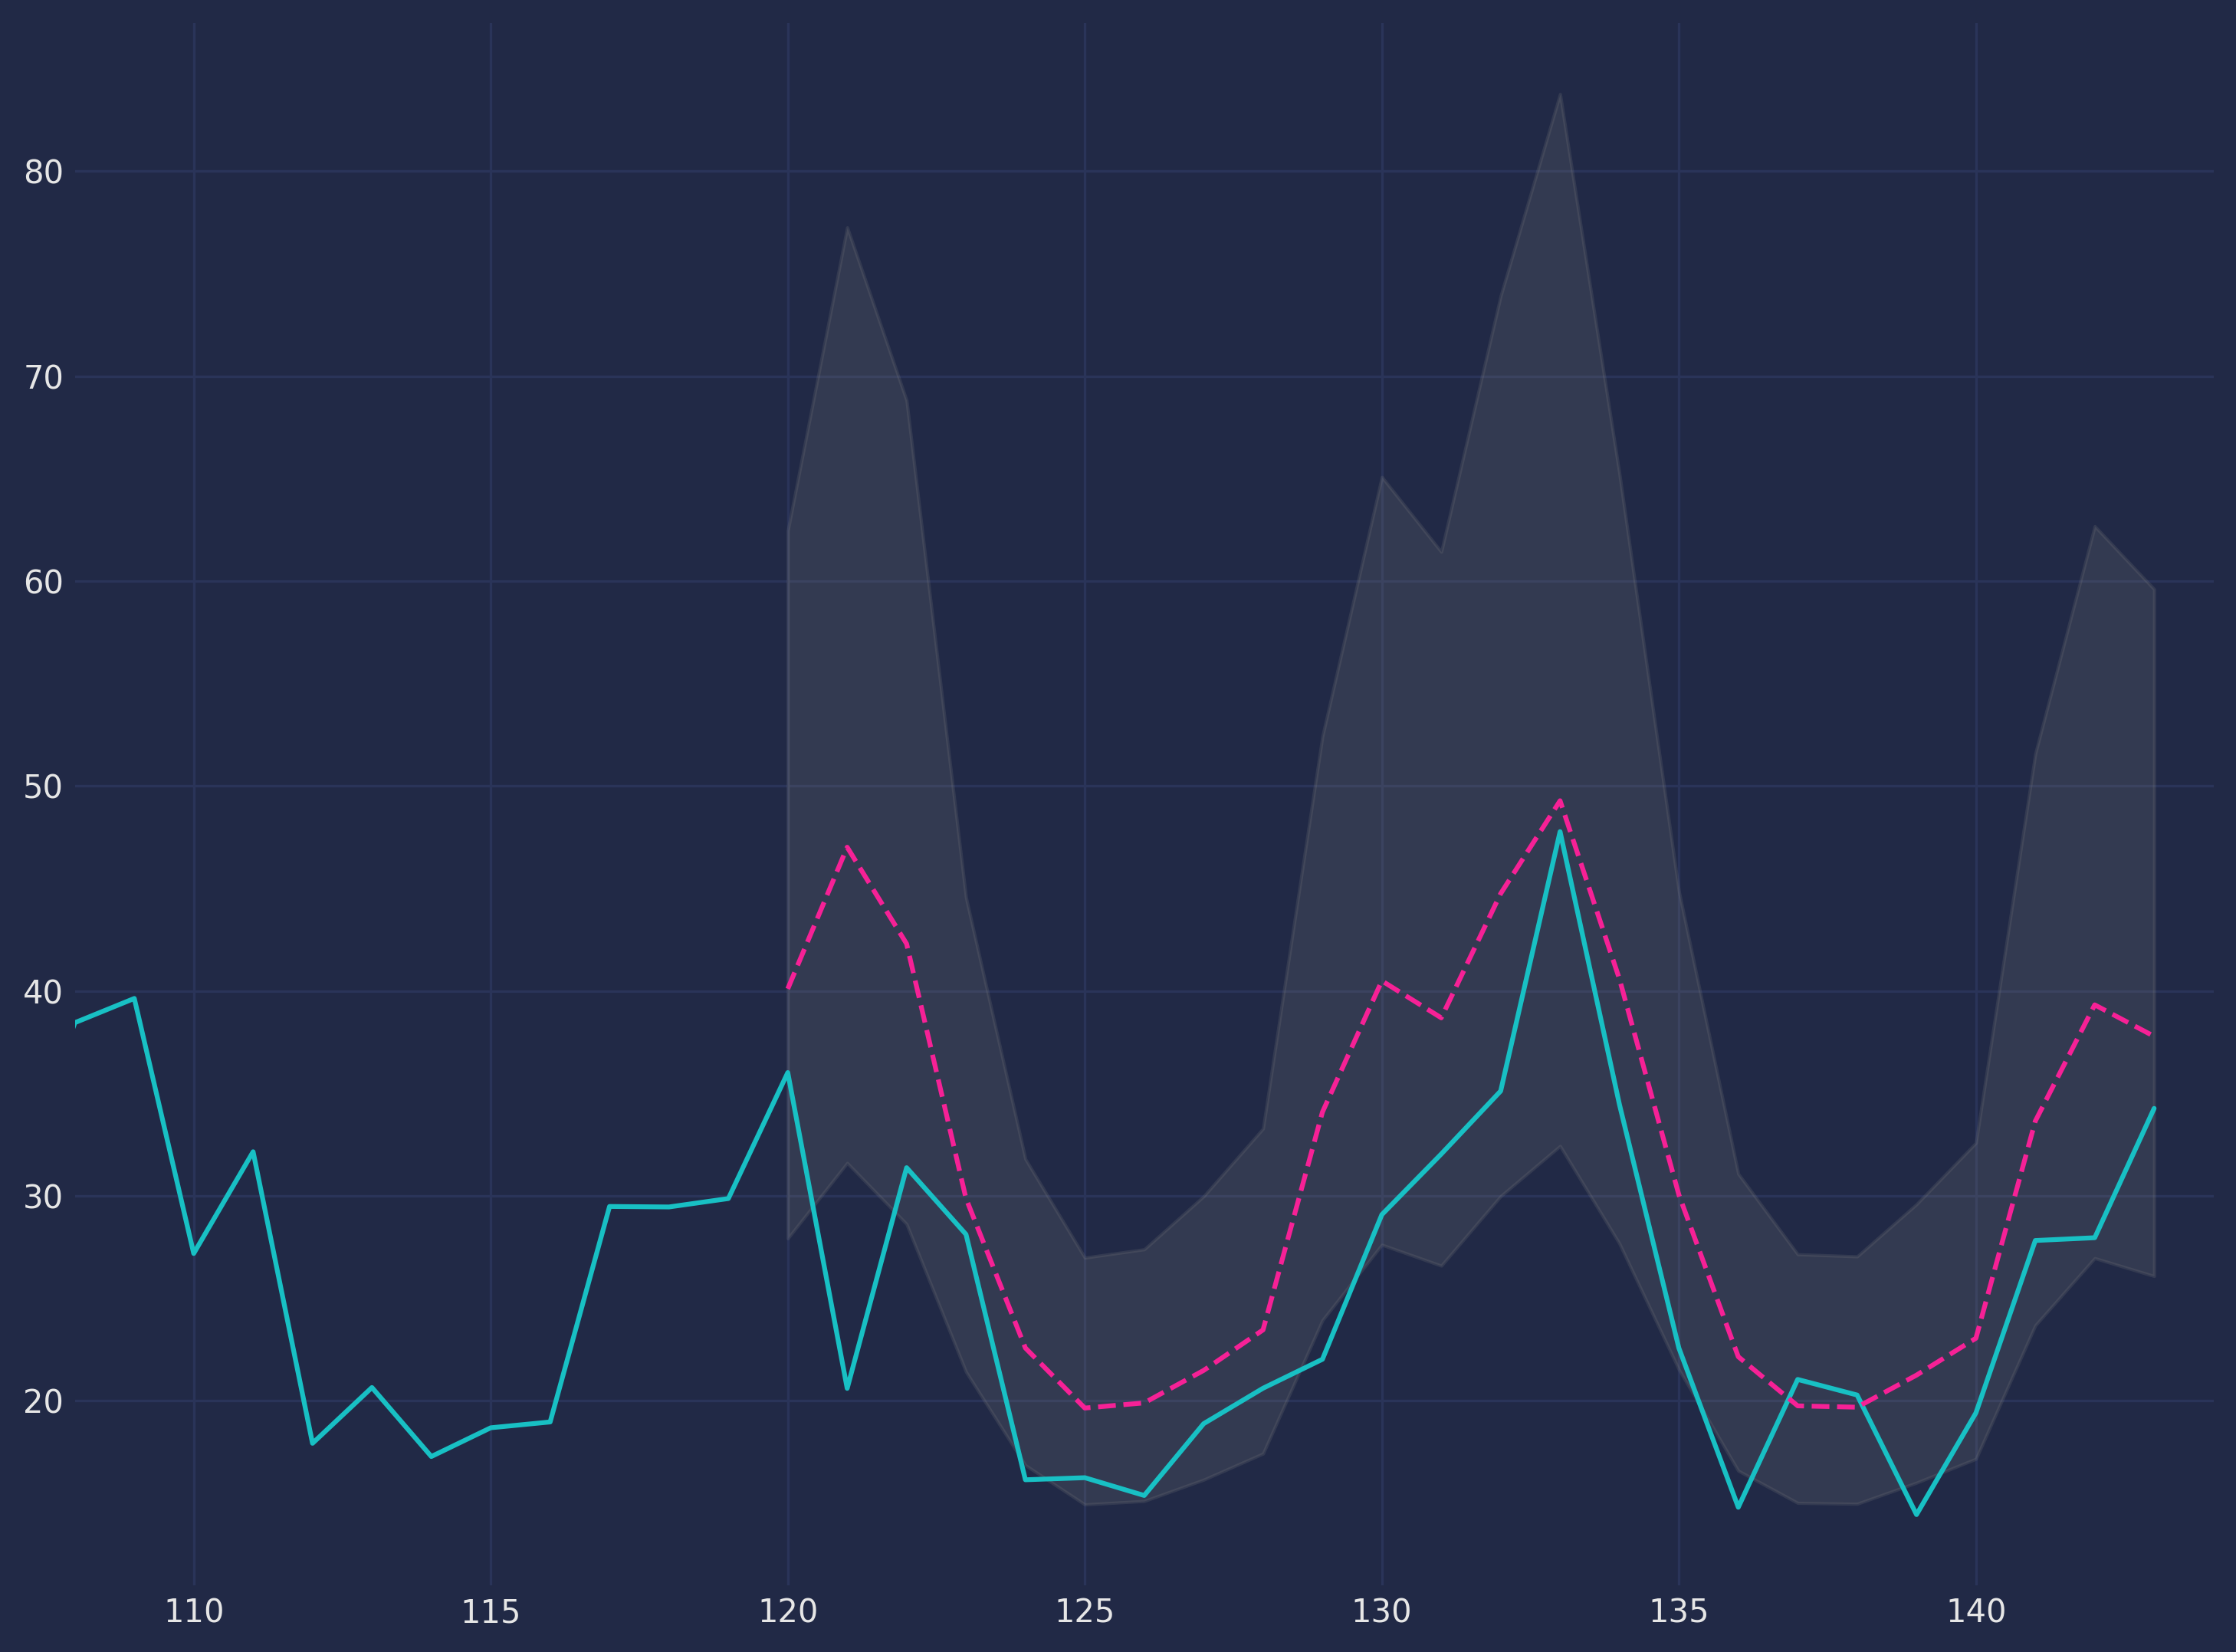

In [66]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)
    
    ax.plot(df_pm10_m.measurement)
    ax.plot(data_test.prediction, linestyle='dashed')
    ax.fill_between(data_test.index, data_test.lower_confidence, data_test.upper_confidence,
                   color='gray', alpha=0.2)
    ax.set_xlim([108, 144])

## Other pollution type splitted between different regions

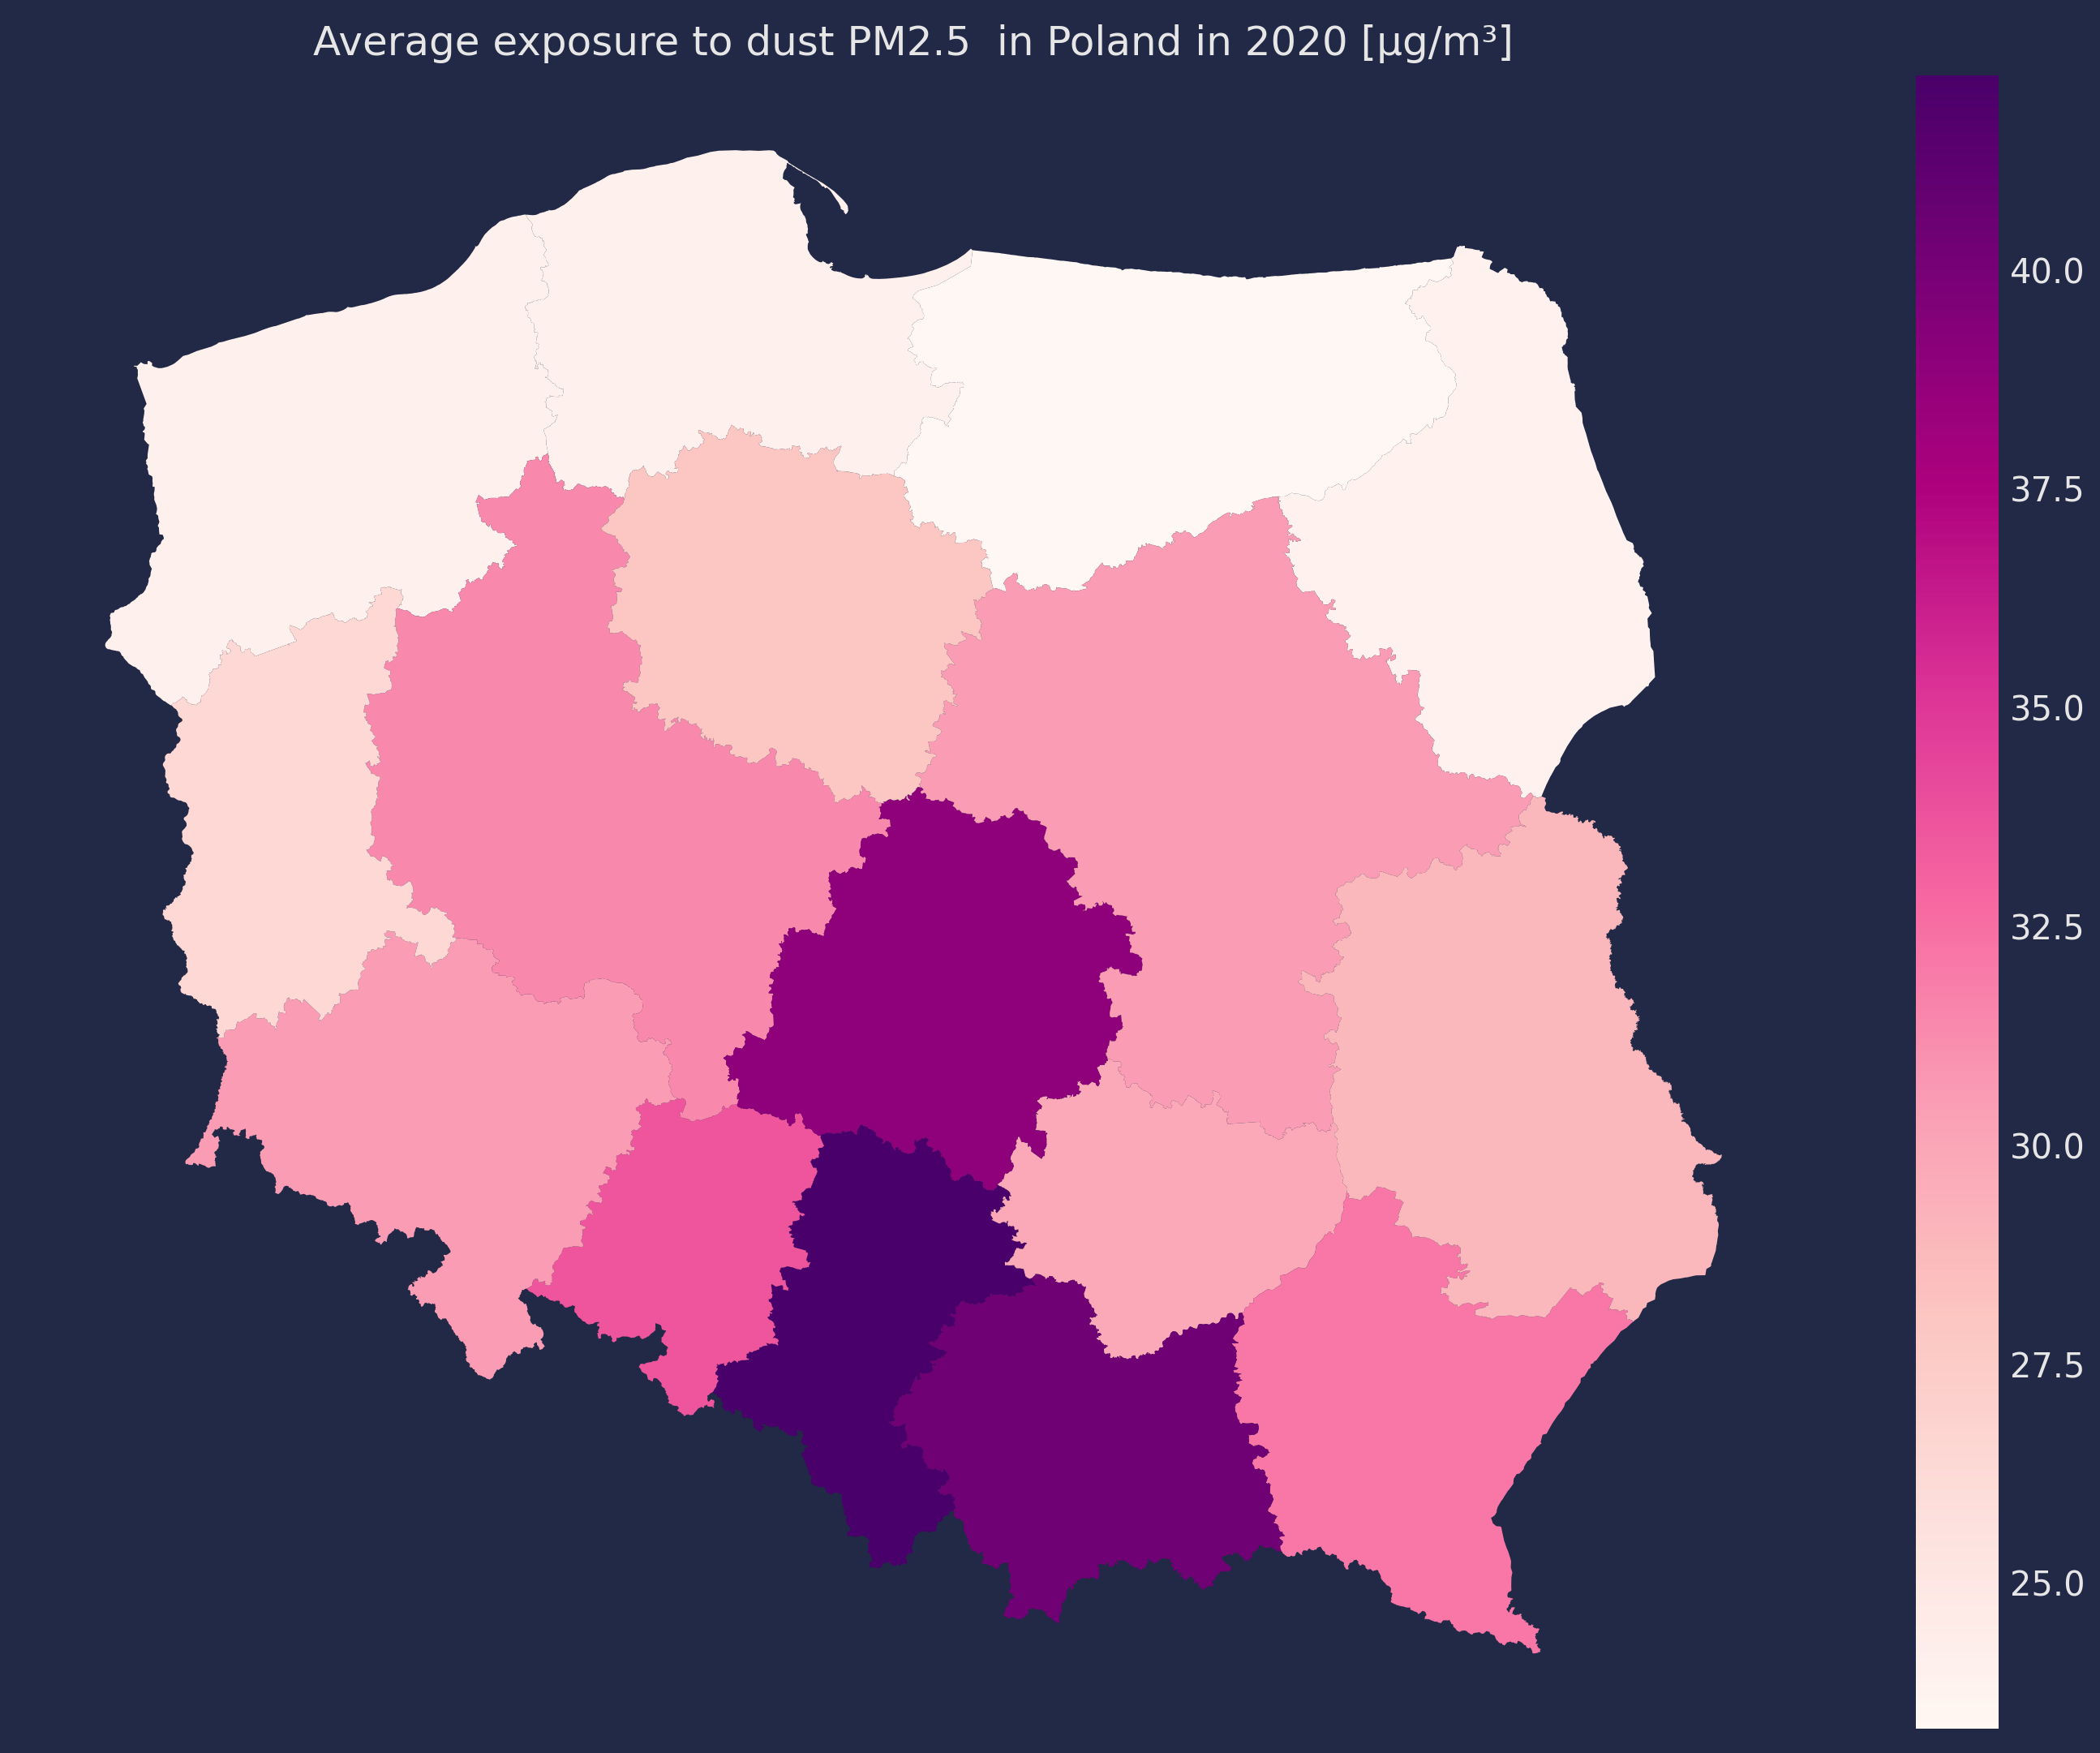

In [71]:
geo_data = gpd.read_file('data/Wojew¢dztwa.shp')
geo_data['region'] = ['SLASKIE', 'OPOLSKIE', 'SWIETOKRZYSKIE', 'POMORSKIE', 'PODLASKIE', 'ZACHODNIOPOMORSKIE', 
                      'DOLNOSLASKIE', 'WIELKOPOLSKIE', 'PODKARPACKIE', 'MALOPOLSKIE', 'WARMINSKO-MAZURSKIE', 
                      'LODZKIE', 'MAZOWIECKIE', 'KUJAWSKO-POMORSKIE', 'LUBELSKIE', 'LUBUSKIE']

avg_pollution = df_pm10 \
.groupby(['timestamp', 'region']) \
.agg(np.nanmean) \
.reset_index() \
.groupby('region') \
.mean()

geo_data = geo_data.join(avg_pollution, on='region')

with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)

    geo_data.plot(column='measurement', legend=True, ax=ax)
    
    ax.set_title('Average exposure to dust PM2.5  in Poland in 2020 [μg/m³]')
    ax.set_xticks([])
    ax.set_yticks([])

In [81]:
selected_regions = ['MAZOWIECKIE', 'SLASKIE', 'KUJAWSKO-POMORSKIE']

selected_regions_labels = {
    'MAZOWIECKIE': 'Mazowieckie (capital area)', 
    'SLASKIE': 'Śląskie (industrial area)', 
    'KUJAWSKO-POMORSKIE': 'Kujawsko-Pomorskie (green area)'  
}

df_pm10_reg = {region: df_pm10[df_pm10.region == region] for region in selected_regions}
df_pm10_reg_m = {region: model.group_and_reindex(df_pm10_reg[region], 'monthly')  for region in selected_regions}

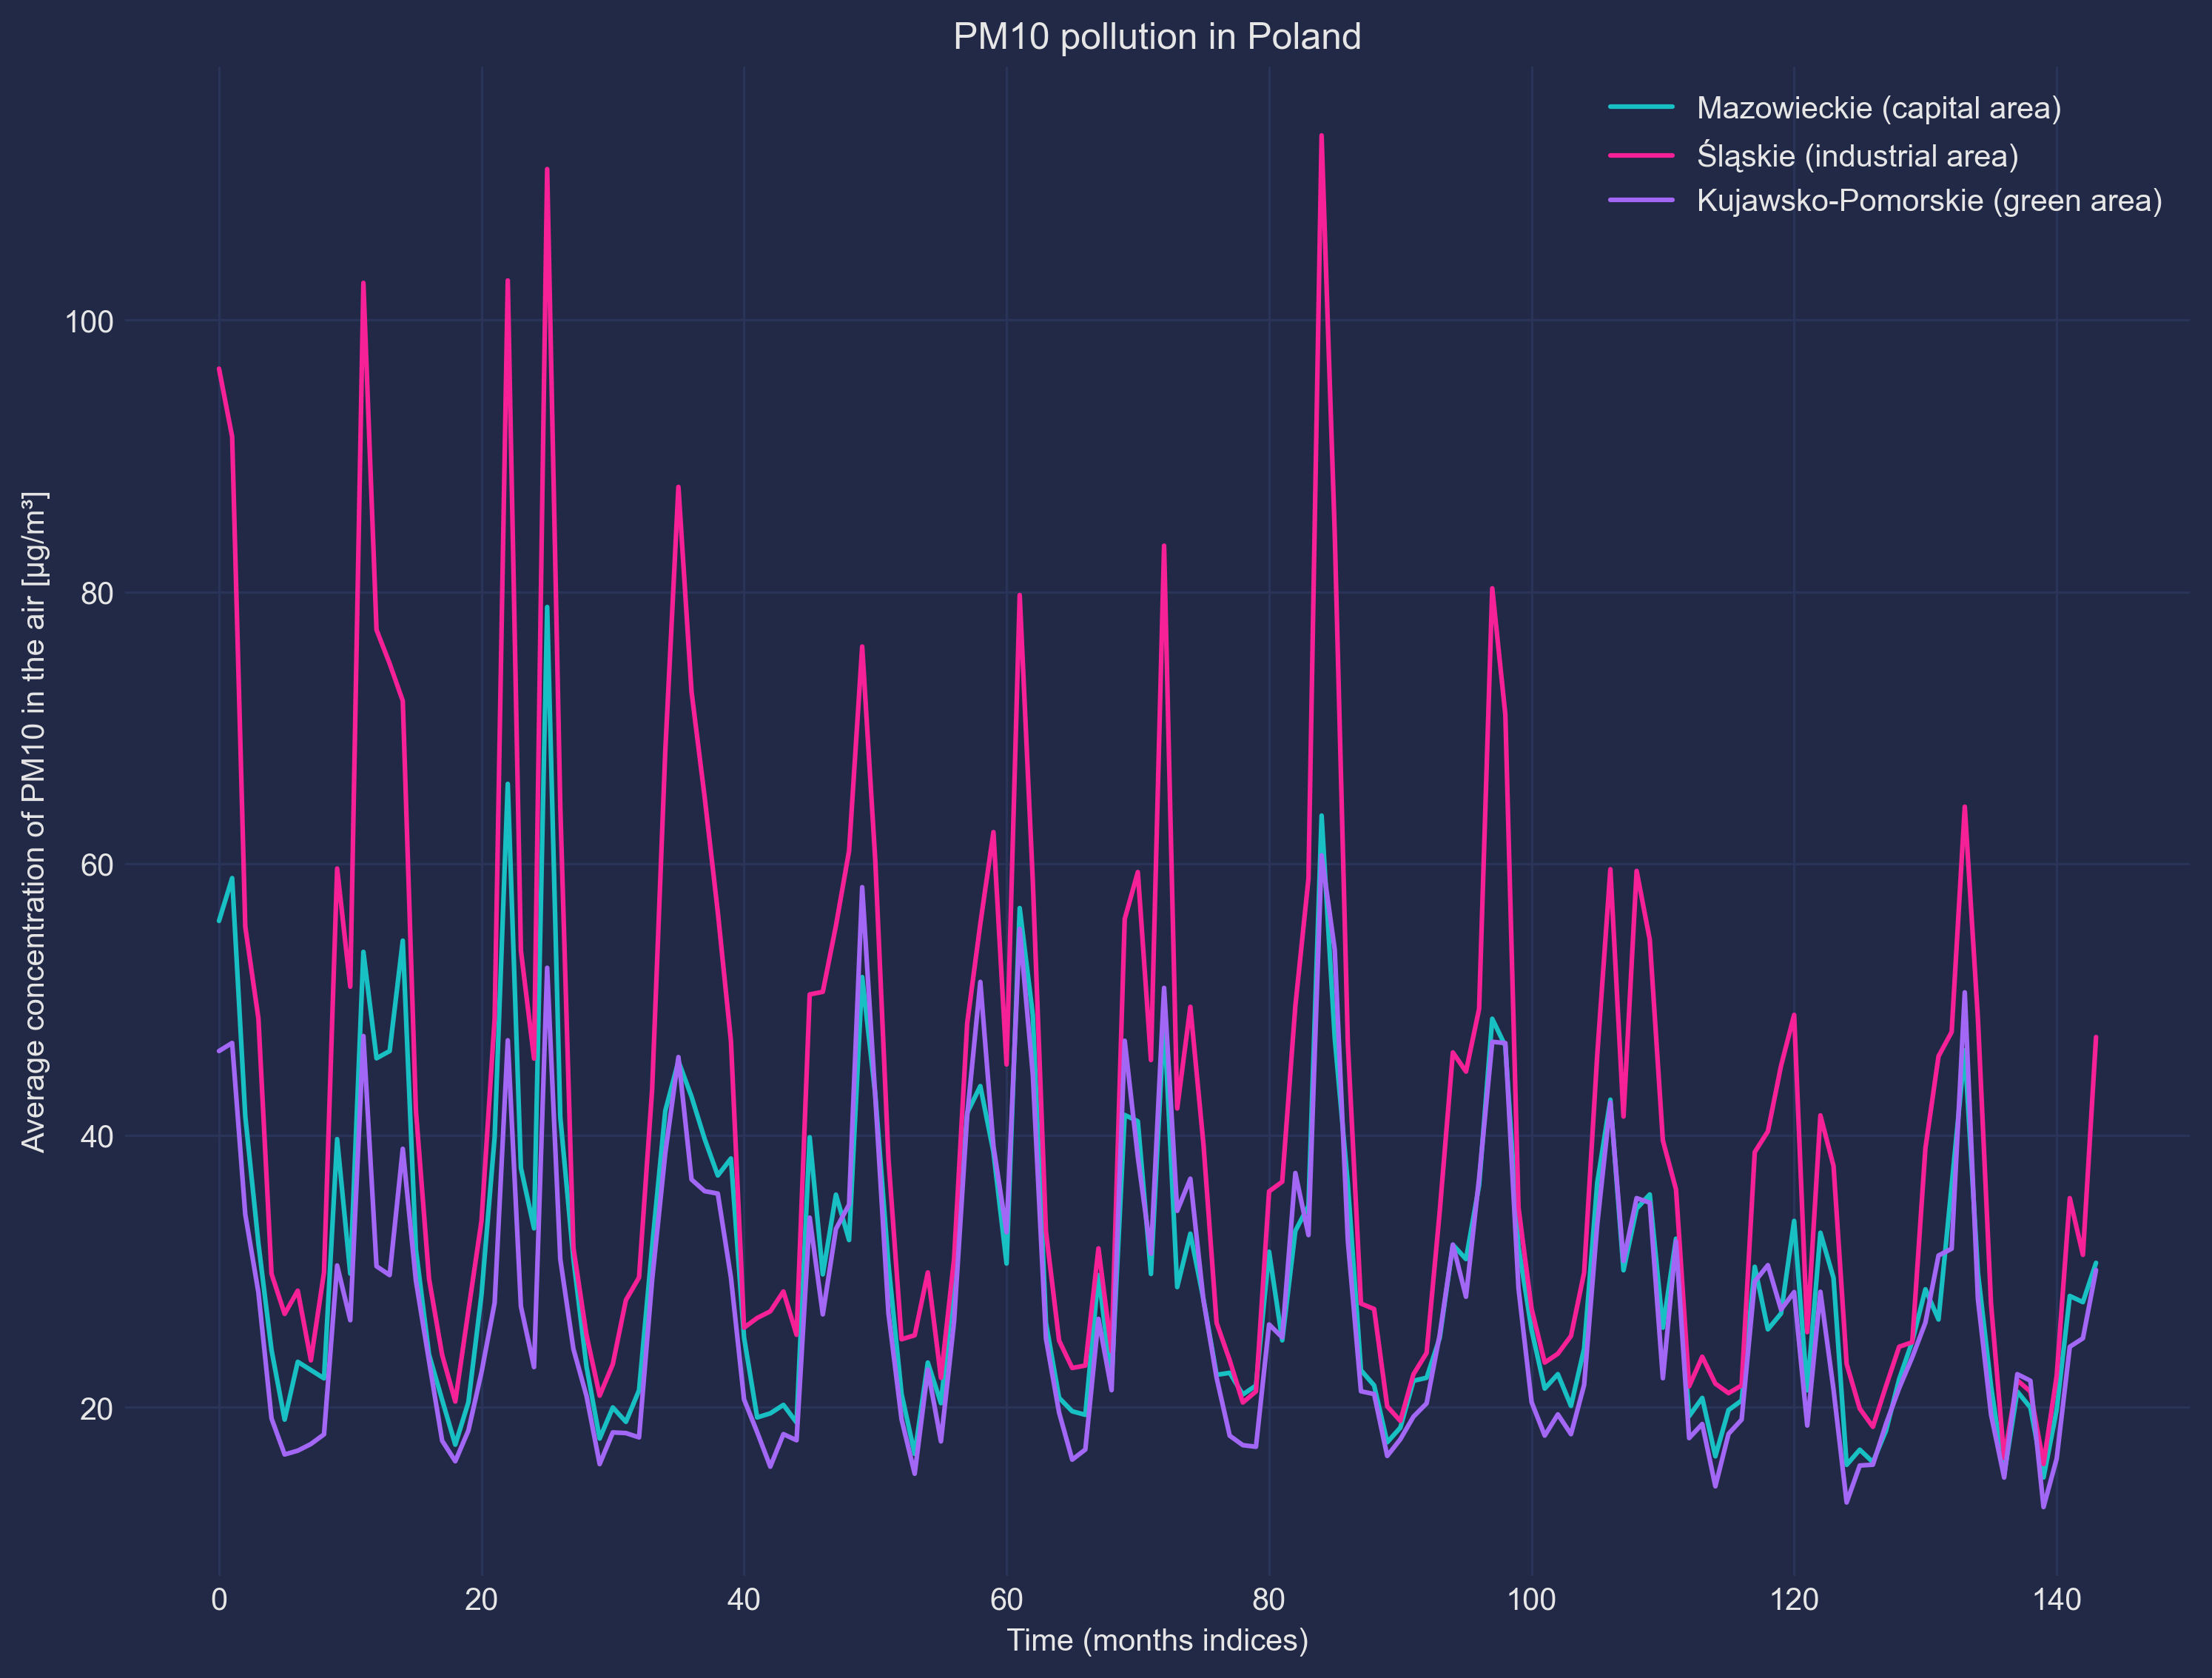

In [83]:
with plt.style.context(style_url):
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)

    for region in selected_regions:
        ax.plot(df_pm10_reg_m[region].measurement)

    ax.set_title('PM10 pollution in Poland')
    ax.set_xlabel('Time (months indices)')
    ax.set_ylabel('Average concentration of PM10 in the air [μg/m³]')
    ax.legend([selected_regions_labels[region] for region in selected_regions])
    
    plt.show()

In [84]:
results = {region: model.auto_model(df_pm10_reg[region], 'monthly', transform=True) for region in selected_regions}

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-357.124, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-418.441, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=445.370, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-401.327, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-468.714, Time=0.85 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-385.245, Time=0.50 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-470.641, Time=2.28 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-428.930, Time=0.79 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=5.02 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-447.917, Time=3.18 sec
 ARIMA(0,0,2)(1,0,2)[12] intercept   : AIC=in

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/arima/arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:, 'prediction'] = pred
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-358.877, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-203.676, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-293.380, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=496.539, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-303.449, Time=1.44 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-287.690, Time=1.85 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-352.207, Time=3.94 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-356.040, Time=4.19 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-293.448, Time=0.39 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-309.636, Time=3.30 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-327.214, Time=3.45 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-363.512, Time=7.53 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=-365.563, Time=7.16 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=-346.738, Time=4.18 sec
 

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/arima/arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:, 'prediction'] = pred
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-219.185, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-282.151, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=484.875, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-264.872, Time=0.10 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-329.792, Time=1.31 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-256.588, Time=1.81 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=-334.433, Time=2.66 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-305.147, Time=2.90 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=-345.719, Time=3.31 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-353.200, Time=3.07 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-299.106, Time=0.92 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=-347.730, Time=2.35 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-347.784, Time=4.32 sec
 ARIMA

/home/rafaczd/Studia/sem10/SNaDV/project/venv/lib/python3.10/site-packages/pmdarima/arima/arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:, 'prediction'] = pred
/home/rafaczd/Studia/sem10/SNaDV/project/model.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

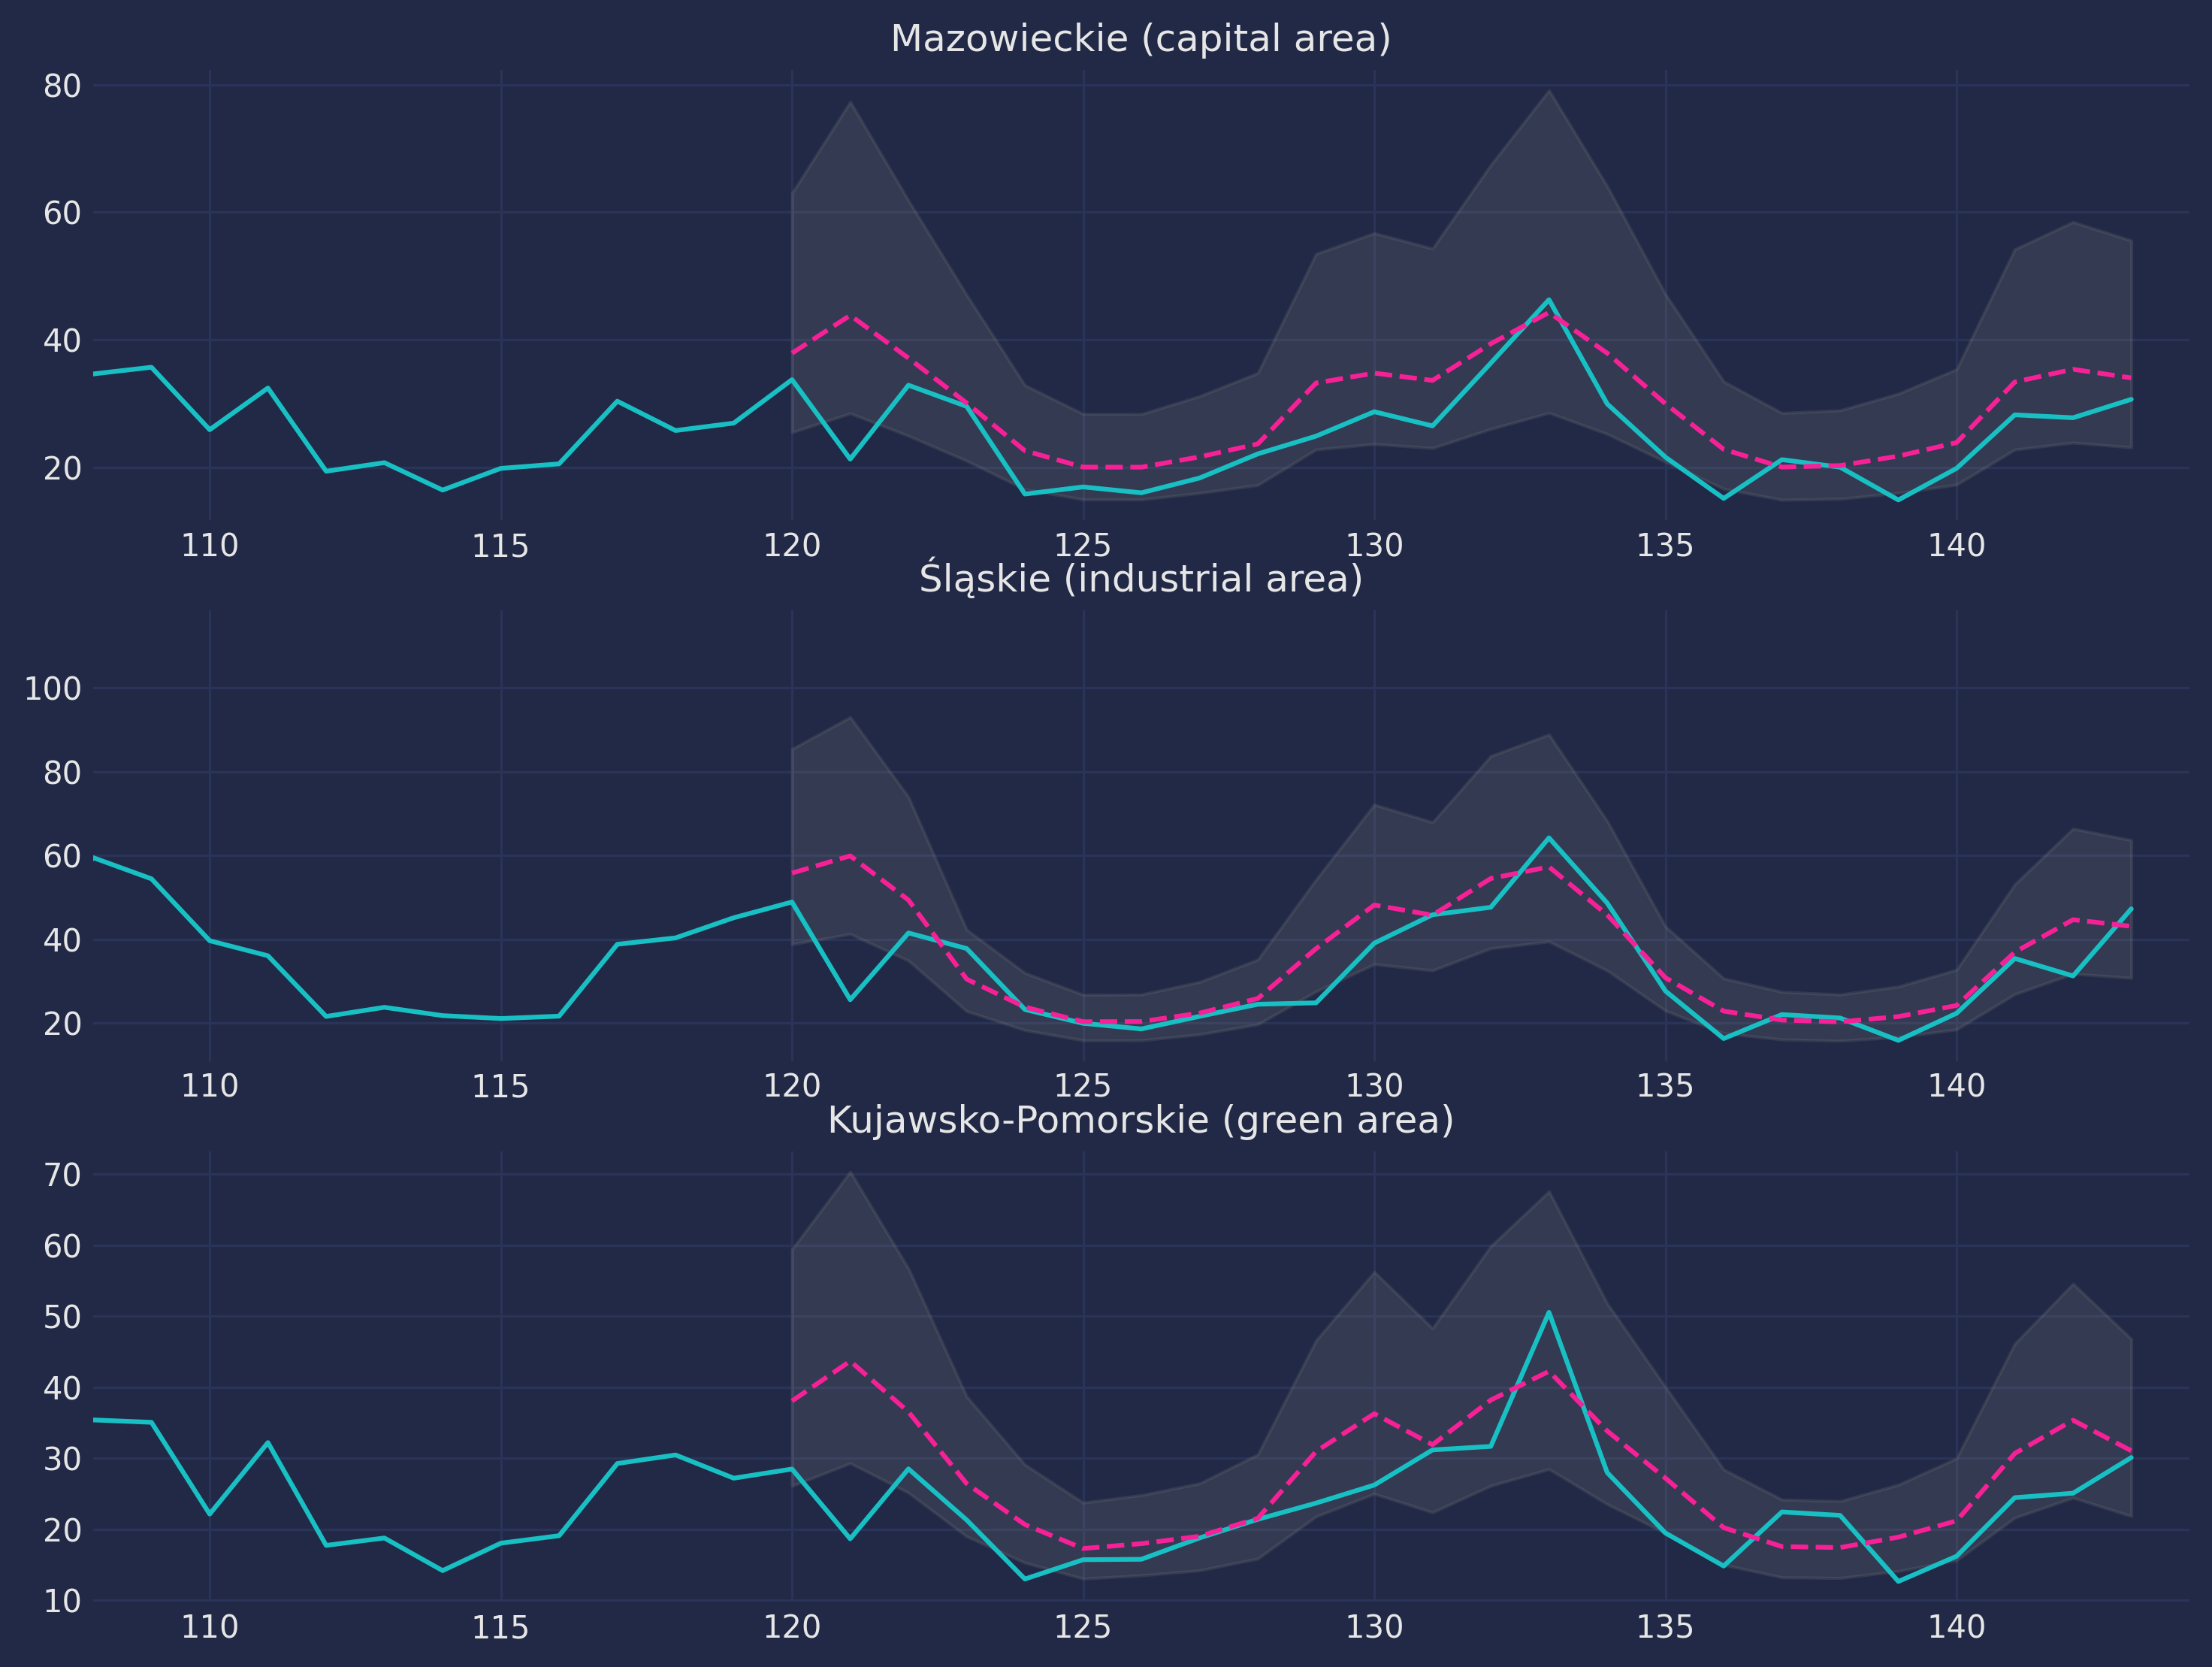

In [90]:
with plt.style.context(style_url):
    fig, axs = plt.subplots(3, 1, figsize=(12, 9), dpi=300)
    
    for ax, region in zip(axs, selected_regions):
        data_test = results[region][3]

        ax.plot(df_pm10_reg_m[region].measurement)
        ax.plot(data_test.prediction, linestyle='dashed')
        ax.fill_between(data_test.index, data_test.lower_confidence, data_test.upper_confidence,
                       color='gray', alpha=0.2)
        ax.set_xlim([108, 144])
        ax.set_title(selected_regions_labels[region])